# Transaction Anomalies Detection

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statistics
df = pd.read_csv("D:\EazyDiner\Eazypay_transactions.csv")
df

eazypay_id  customer_id  restaurant_id         coupon_ids  \
0          1737261      3757736         330185   {"11257778":750}   
1          1737264      4123788         683675  {"16254434":1000}   
2          1737266      4346172         334794   {"16299617":400}   
3          1737268      3838830         683719                NaN   
4          1737270       555480         658420   {"11257778":651}   
...            ...          ...            ...                ...   
547479     3160673      4087932         684312   {"17802139":685}   
547480     3160679      5862523         600127    {"16695808":75}   
547481     3160680      4080631         640389                NaN   
547482     3160684      5862420         110077   {"16626347":367}   
547483     3160691      3288633         335312    {"16695808":75}   

                             name                                 location  \
0       AB's - Absolute Barbecues             Marathahalli, East Bengaluru   
1                     Kitchen 165                        NX Hotel, Kolkata   
2                          Plan B          Brigade Road, Central Bengaluru   
3                  Punjab Grill\t              R City Mall, Ghatkopar West   
4                  Copper Chimney         Phoenix Market City, Viman Nagar   
...                           ...                                      ...   
547479   BBM - Buffet Bar & Music                    Gachibowli, Hyderabad   
547480              Flame & Grill  South City Mall, Prince Anwar Shah Road   
547481            Jungle Jamboree               Rajouri Garden, West Delhi   
547482                    Chili's                   Ambience Mall, Gurgaon   
547483            Barbeque Nation         Ascendas Park Square, Whitefield   

             city  input_amount  total_amount  coupon_amount  \
0       Bengaluru        7718.0        7753.0          750.0   
1         Kolkata        7203.0        7238.0         1000.0   
2       Bengaluru        6157.0        6192.0          400.0   
3          Mumbai        2119.0        2119.0            0.0   
4            Pune        4308.0        4343.0          651.0   
...           ...           ...           ...            ...   
547479  Hyderabad        4523.0        4568.0          685.0   
547480    Kolkata        3050.0        3085.0           75.0   
547481  Delhi NCR        1339.0        1339.0            0.0   
547482  Delhi NCR        2418.0        2453.0          367.0   
547483  Bengaluru        1678.0        1713.0           75.0   

        deal_discount_amount  paid_amount EazyPayTran_Date EazyPayTran_Time  \
0                          0       7003.0       01/01/2023          0:00:43   
1                       1801       4437.0       01/01/2023          0:01:12   
2                          0       5792.0       01/01/2023          0:01:26   
3                          0       2119.0       01/01/2023          0:02:19   
4                          0       3692.0       01/01/2023          0:02:29   
...                      ...          ...              ...              ...   
547479                     0       3883.0       18/07/2023         16:29:10   
547480                     0       3010.0       18/07/2023         16:30:00   
547481                     0       1339.0       18/07/2023         16:30:12   
547482                     0       2086.0       18/07/2023         16:32:43   
547483                     0       1638.0       18/07/2023         16:33:58   

        Prime   z_score  mod_z_score  
0          NO  1.447706     2.776140  
1       Prime  1.277505     2.496681  
2          NO  0.931815     1.929081  
3          NO -0.414261    -0.281087  
4          NO  0.320743     0.925742  
...       ...       ...          ...  
547479     NO       NaN          NaN  
547480     NO       NaN          NaN  
547481  Prime       NaN          NaN  
547482     NO       NaN          NaN  
547483     NO       NaN          NaN  

[547484 rows x 17 columns]

In [31]:
df['convience'] = df['total_amount'] - df['input_amount']

In [68]:
import numpy as np
df['actual_pay'] = df['total_amount'] - df['coupon_amount'] - df['deal_discount_amount']
rev = df[~np.isclose(df['actual_pay'], df['paid_amount'], rtol=1e-9)]


In [73]:
# rev[rev['customer_id']==4256112]
rev['customer_id'].value_counts()


eazypay_id  customer_id  restaurant_id       coupon_ids  \
6531       1753531      4256112         672035  {"9173809":258}   
13105      1772799      4256112         672035  {"9173809":491}   
27032      1807311      4256112         672035  {"9173809":155}   
31057      1817345      4256112         672035  {"9173809":254}   
40000      1839767      4256112         672035  {"9173809":110}   
...            ...          ...            ...              ...   
526929     3099586      4256112         672035   {"9173809":82}   
530604     3111069      4256112         672035   {"9173809":82}   
532325     3116901      4256112         672035   {"9173809":82}   
535299     3125776      4256112         672035   {"9173809":82}   
547097     3159408      4256112         672035   {"9173809":82}   

                              name     location  city  input_amount  \
6531    Momentt - Enrise by Sayaji  Wakad, Pune  Pune        1033.0   
13105   Momentt - Enrise by Sayaji  Wakad, Pune  Pune        1965.0   
27032   Momentt - Enrise by Sayaji  Wakad, Pune  Pune         623.0   
31057   Momentt - Enrise by Sayaji  Wakad, Pune  Pune        1016.0   
40000   Momentt - Enrise by Sayaji  Wakad, Pune  Pune         441.0   
...                            ...          ...   ...           ...   
526929  Momentt - Enrise by Sayaji  Wakad, Pune  Pune         329.0   
530604  Momentt - Enrise by Sayaji  Wakad, Pune  Pune         329.0   
532325  Momentt - Enrise by Sayaji  Wakad, Pune  Pune         329.0   
535299  Momentt - Enrise by Sayaji  Wakad, Pune  Pune         329.0   
547097  Momentt - Enrise by Sayaji  Wakad, Pune  Pune         329.0   

        total_amount  coupon_amount  deal_discount_amount  paid_amount  \
6531          1033.0          258.0                     0        758.0   
13105         1965.0          491.0                     0       1425.0   
27032          623.0          155.0                     0        393.0   
31057         1016.0          254.0                     0        738.0   
40000          441.0          110.0                     0        288.0   
...              ...            ...                   ...          ...   
526929         329.0           82.0                     0        227.0   
530604         329.0           82.0                     0        243.0   
532325         329.0           82.0                     0        242.0   
535299         329.0           82.0                     0        242.0   
547097         329.0           82.0                     0        237.0   

       EazyPayTran_Date EazyPayTran_Time  Prime   z_score  mod_z_score  \
6531         02/01/2023         17:53:17  Prime -0.773171    -0.870393   
13105        06/01/2023         21:19:40  Prime -0.465156    -0.364653   
27032        12/01/2023          9:12:12  Prime -0.908671    -1.092874   
31057        14/01/2023         14:12:11  Prime -0.778789    -0.879617   
40000        17/01/2023         13:50:49  Prime -0.968819    -1.191635   
...                 ...              ...    ...       ...          ...   
526929       11/07/2023          8:39:19  Prime       NaN          NaN   
530604       13/07/2023          8:16:03  Prime       NaN          NaN   
532325       14/07/2023         10:02:54  Prime       NaN          NaN   
535299       15/07/2023          9:21:32  Prime       NaN          NaN   
547097       18/07/2023          9:22:52  Prime       NaN          NaN   

        convience  actual_pay  
6531          0.0       775.0  
13105         0.0      1474.0  
27032         0.0       468.0  
31057         0.0       762.0  
40000         0.0       331.0  
...           ...         ...  
526929        0.0       247.0  
530604        0.0       247.0  
532325        0.0       247.0  
535299        0.0       247.0  
547097        0.0       247.0  

[95 rows x 19 columns]

In [70]:
rev.convience.describe()
rev['convience'].value_counts()


0.0    25683
Name: convience, dtype: int64

In [71]:
rev

eazypay_id  customer_id  restaurant_id       coupon_ids  \
69         1737416      4118293         672940  {"9173809":834}   
158        1737672      1566702         684961  {"9173809":238}   
223        1737900       113420         682783  {"9173809":426}   
261        1738164       473700         682834   {"9173809":32}   
275        1738267       183724         672877  {"9173809":146}   
...            ...          ...            ...              ...   
547420     3160504       722636         110194  {"9173809":127}   
547423     3160517      1161589         682521  {"9173809":242}   
547454     3160591       177997         685174  {"9173809":471}   
547462     3160628      3734568         687707  {"9173809":168}   
547471     3160656      1027368         685940  {"9173809":744}   

                              name                            location  \
69              Cafe Delhi Heights        Commons at DLF Avenue, Saket   
158                     Elevate 58  Basaveshwara Nagar, West Bengaluru   
223                      Panchgaon                    Manesar, Gurgaon   
261     Blue Tokai Coffee Roasters          Khan Market, Central Delhi   
275                    Dilly Dally       Andheri West, Western Suburbs   
...                            ...                                 ...   
547420          Cafe Delhi Heights                  Cyber Hub, Gurgaon   
547423          Ping's Cafe Orient           Lower Parel, South Mumbai   
547454                  Pop Tate's    Dadar Shivaji Park, South Mumbai   
547462           Breads And Banter         Brookefield, East Bengaluru   
547471                       Roxie      Sarjapur Road, South Bengaluru   

             city  input_amount  total_amount  coupon_amount  \
69      Delhi NCR        3337.0        3337.0          834.0   
158     Bengaluru         952.0         952.0          238.0   
223     Delhi NCR        1706.0        1706.0          426.0   
261     Delhi NCR         130.0         130.0           32.0   
275        Mumbai         587.0         587.0          146.0   
...           ...           ...           ...            ...   
547420  Delhi NCR         508.0         508.0          127.0   
547423     Mumbai        1294.0        1294.0          242.0   
547454     Mumbai        1887.0        1887.0          471.0   
547462  Bengaluru         672.0         672.0          168.0   
547471  Bengaluru        2976.0        2976.0          744.0   

        deal_discount_amount  paid_amount EazyPayTran_Date EazyPayTran_Time  \
69                         0       1381.0       01/01/2023          0:19:28   
158                        0        685.0       01/01/2023          0:51:00   
223                        0       1226.0       01/01/2023          8:30:52   
261                        0         74.0       01/01/2023         12:32:41   
275                        0        372.0       01/01/2023         13:09:12   
...                      ...          ...              ...              ...   
547420                     0        378.0       18/07/2023         15:54:22   
547423                   324        710.0       18/07/2023         15:56:09   
547454                     0       1326.0       18/07/2023         16:10:41   
547462                     0        481.0       18/07/2023         16:17:04   
547471                     0       2216.0       18/07/2023         16:21:45   

        Prime   z_score  mod_z_score  convience  actual_pay  
69      Prime -0.011727     0.379847        0.0      2503.0  
158     Prime -0.799940    -0.914346        0.0       714.0  
223     Prime -0.550753    -0.505197        0.0      1280.0  
261     Prime -1.071601    -1.360395        0.0        98.0  
275     Prime -0.920568    -1.112409        0.0       441.0  
...       ...       ...          ...        ...         ...  
547420  Prime       NaN          NaN        0.0       381.0  
547423  Prime       NaN          NaN        0.0       728.0  
547454  Prime       NaN          NaN  

In [23]:
import pandas as pd

# Sample DataFrame
data = {
    'total_amount': [500, 1000, 1500, 800, 600],
    'coupon_amount': [50, 100, 200, 50, 0],
    'deal_discount_amount': [100, 0, 150, 100, 50],
    'paid_amount': [380, 800, 1200, 700, 550]
}

df = pd.DataFrame(data)

# Filtering rows based on the condition
result = df[(df['total_amount'] - df['coupon_amount'] - df['deal_discount_amount'] != df['paid_amount'])]

print(result)


   total_amount  coupon_amount  deal_discount_amount  paid_amount
0           500             50                   100          380
1          1000            100                     0          800
2          1500            200                   150         1200
3           800             50                   100          700


In [5]:
rev = df[df['paid_amount']<=10]

In [15]:
rev
#rev

eazypay_id  customer_id  restaurant_id         coupon_ids  \
4683       1748595      3998948         685496    {"9173809":643}   
7647       1757544      4369984         220712    {"9173809":202}   
7990       1758706      3937986         656573    {"9173809":506}   
8609       1760386        83955         682594    {"9173809":964}   
9134       1761865      1198187         685837    {"9173809":504}   
...            ...          ...            ...                ...   
547292     3160124      4817192         663115                NaN   
547310     3160188      5231062         121015                NaN   
547381     3160389      3850164         689462     {"9173809":87}   
547439     3160562      2391522         613734                NaN   
547468     3160653      3699183         685603  {"16625259":2515}   

                            name                             location  \
4683                     Tim Tim             Bodakdev, West Ahmedabad   
7647     Suzette Creperie & Cafe          Nariman Point, South Mumbai   
7990             Barbeque Nation     Diamond Plaza Mall, Jessore Road   
8609                      Allora                    Viman Nagar, Pune   
9134    Balmy All Day Cafe & Bar           Breach Candy, South Mumbai   
...                          ...                                  ...   
547292              Green Vatika                   Rohini, West Delhi   
547310       Test - Do Not Books                   Cyber Hub, Gurgaon   
547381            AMB Restaurant                  Madhapur, Hyderabad   
547439                   Chili's  DLF Mall of India, Sector 18, Noida   
547468             Global Chaska                       Balewadi, Pune   

             city  input_amount  total_amount  coupon_amount  \
4683    Ahmedabad        2572.0        2572.0          643.0   
7647       Mumbai         809.0         809.0          202.0   
7990      Kolkata        2027.0        2027.0          506.0   
8609         Pune        3856.0        3856.0          964.0   
9134       Mumbai        2016.0        2016.0          504.0   
...           ...           ...           ...            ...   
547292  Delhi NCR           1.0           1.0            0.0   
547310  Delhi NCR           4.0           4.0            0.0   
547381  Hyderabad         350.0         350.0           87.0   
547439  Delhi NCR           1.0           1.0            0.0   
547468       Pune        2481.0        2516.0         2515.0   

        deal_discount_amount  paid_amount EazyPayTran_Date EazyPayTran_Time  \
4683                       0         10.0       01/01/2023         22:11:54   
7647                       0         10.0       03/01/2023         11:15:00   
7990                       0         10.0       03/01/2023         16:44:12   
8609                       0         10.0       03/01/2023         22:13:17   
9134                       0         10.0       04/01/2023         14:02:17   
...                      ...          ...              ...              ...   
547292                     0          1.0       18/07/2023         14:55:40   
547310                     0          4.0       18/07/2023         15:04:16   
547381                     0          1.0       18/07/2023         15:29:19   
547439                     0          1.0       18/07/2023         16:05:38   
547468                     0          1.0       18/07/2023         16:20:36   

        Prime   z_score  mod_z_score  
4683    Prime -0.264550    -0.035272  
7647    Prime -0.847200    -0.991944  
7990    Prime -0.444666    -0.331010  
8609    Prime  0.159796     0.661477  
9134    Prime -0.448301    -0.336979  
...       ...       ...          ...  
547292  Prime       NaN          NaN  
547310     NO       NaN          NaN  
547381  Prime       NaN          NaN  
547439  Prime       NaN          NaN  
547468     NO       NaN          NaN  

[12324 rows x 17 columns]

In [21]:
df['total_amount'].mean()

3387.5305603634088

In [22]:
df['total_amount'].median()

2652.0

In [23]:
df['total_amount'].mode()

0    260.0
Name: total_amount, dtype: float64

In [24]:
is_unique = not df["total_amount"].duplicated().any()
print(is_unique)

False


# Graphs

<AxesSubplot: >

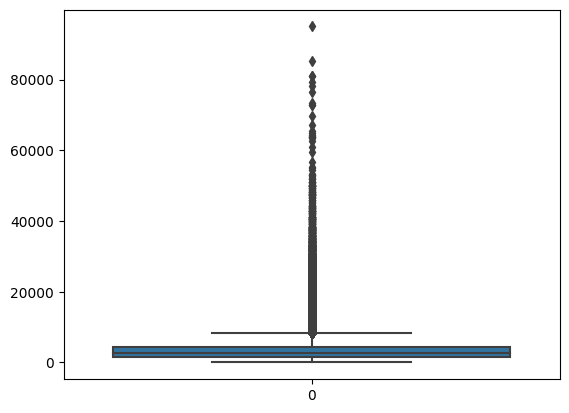

In [28]:
sns.boxplot(df["total_amount"])

<AxesSubplot: xlabel='total_amount', ylabel='Count'>

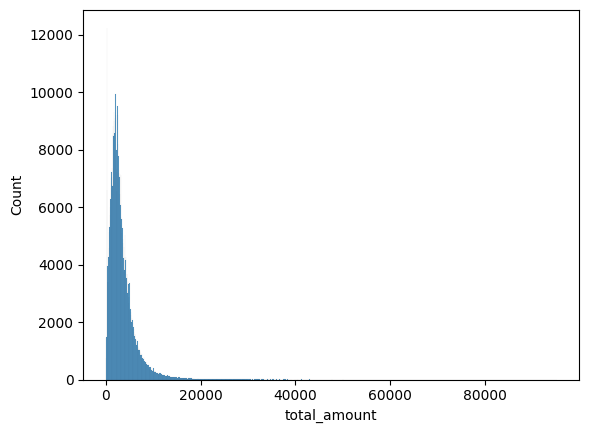

In [29]:
sns.histplot(df['total_amount'])

<AxesSubplot: xlabel='total_amount', ylabel='Count'>

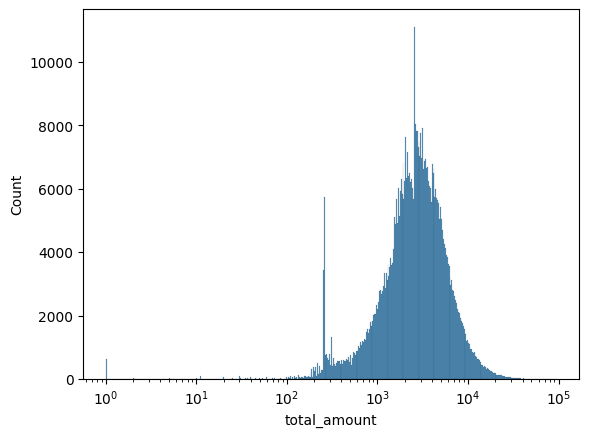

In [30]:
sns.histplot(df['total_amount'], log_scale=True) #log_scale when there is wide range of value very low and high(y axis in scale of logrithmic)

<AxesSubplot: xlabel='city', ylabel='count'>

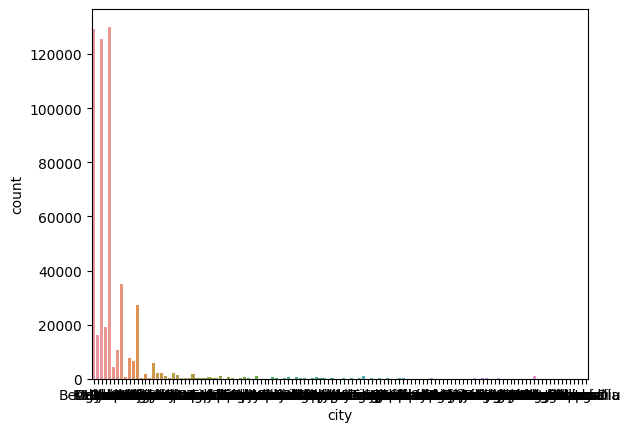

In [31]:
import seaborn as sns
sns.countplot(data=df, x='city')

In [3]:
import pandas as pd
city_counts = df['city'].value_counts()
city_counts_sorted = city_counts.sort_values(ascending=False)
print(city_counts_sorted)

Delhi NCR    32262
Mumbai       26279
Bengaluru    23645
Chennai       8589
Hyderabad     6255
             ...  
Vellore          3
Ajmer            3
Pathankot        3
Belgaum          3
Cuttack          2
Name: city, Length: 89, dtype: int64


# Outliers

# 1) Zscore

In [26]:
import numpy as np
import pandas as pd

def remove_outliers(data):
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    outliers = []
    for i in data:
        zscore = (i - mean) / std
        if np.abs(zscore) > threshold:
            outliers.append(i)
    df_no_outliers = data[~data.isin(outliers)].dropna()
    print(len(df_no_outliers))
    return df_no_outliers

def find_outliers(data):
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    outliers = []
    for i in data:
        zscore = (i - mean) / std
        if np.abs(zscore) > threshold:
            outliers.append(i)

    df_outliers = data[data.isin(outliers)].dropna()
    print(len(df_outliers))
    return df_outliers

df['total_amount_no_outliers'] = remove_outliers(df['total_amount'])
df['total_amount_outlier'] = find_outliers(df['total_amount'])

538039
9445


# 2) IQR

In [17]:
import numpy as np
data = df['total_amount']
data = sorted(data)
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
higher_fence = q3 + 1.5 * iqr

data_no_outliers = [x for x in data if lower_fence <= x <= higher_fence]
data_outliers = [x for x in data if lower_fence >= x or  higher_fence <= x]

import pandas as pd

# Convert data_no_outliers back to a pandas Series
data_no_outliers_series = pd.Series(data_no_outliers)
data_outliers_series = pd.Series(data_outliers)


df['total_amount_no_outliers'] = data_no_outliers_series
df['total_amount_outliers'] = data_outliers_series
df

eazypay_id  customer_id  restaurant_id        coupon_ids  \
0           219369      3043207         674374   {"4406715":300}   
1           219373      2512246         221011   {"4761875":500}   
2           219380       273627         223191   {"6900077":508}   
3           219395      3103776         644427     {"4616008":0}   
4           219401      3231653         644427               NaN   
...            ...          ...            ...               ...   
117627      603308      3821044         662362  {"10188188":448}   
117628      603311      1046047         331132   {"4761875":500}   
117629      603313      1476255         658296   {"6563385":100}   
117630      603315      1636145         652843   {"4622065":500}   
117631      603320      3383352         612514               NaN   

                         name  \
0        Lord of Bar- B - Que   
1                China Bistro   
2             Seasonal Tastes   
3                        IHOP   
4                        IHOP   
...                       ...   
117627        Barbeque Nation   
117628  Arbor Brewing Company   
117629              Nevermind   
117630         The Reservoire   
117631               Sorrento   

                                                 location       city  \
0                                  Majiwada, Thane Region     Mumbai   
1                              Vasant Vihar, Thane Region     Mumbai   
2       Westin Mumbai Garden City, Mumbai, Western Sub...     Mumbai   
3                                      Cyber Hub, Gurgaon  Delhi NCR   
4                                      Cyber Hub, Gurgaon  Delhi NCR   
...                                                   ...        ...   
117627                                           Vadodara   Vadodara   
117628                    Brigade Road, Central Bengaluru  Bengaluru   
117629                        Indiranagar, East Bengaluru  Bengaluru   
117630                       Koramangala, South Bengaluru  Bengaluru   
117631                          Shangri-La Eros New Delhi  Delhi NCR   

        input_amount  total_amount  coupon_amount  deal_discount_amount  \
0                  0       2728.00            300                     0   
1                  0      11537.00            500                     0   
2                  0       2033.74            508                     0   
3                  0       2657.00              0                     0   
4                  0       5262.00              0                     0   
...              ...           ...            ...                   ...   
117627             0       3014.00            448                     0   
117628             0       9433.00            500                     0   
117629             0       2271.00            100                     0   
117630             0       3317.00            500                     0   
117631             0       9526.00              0                     0   

        paid_amount EazyPayTran_Date EazyPayTran_Time  Prime  \
0           2428.00       01/01/2022          0:33:30     NO   
1          11037.00       01/01/2022          1:00:28     NO   
2           1525.74       01/01/2022         10:51:58  Prime   
3           2657.00       01/01/2022         12:40:36     NO   
4           5262.00       01/01/2022         12:54:19     NO   
...             ...              ...              ...    ...   
117627      2566.00       30/06/2022         23:53:21     NO   
117628      8933.00       30/06/2022         23:54:10  Prime   
117629      2171.00       30/06/2022         23:55:00     NO   
117630      2817.00       30/06/2022         23:55:09  Prime   
117631      9526.00       30/06/2022         23:57:14     NO   

        total_amount_no_outliers  total_amount_outliers  
0                            1.0                 7669.0  
1                            1.0                 7669.0  
2                            1.0                 7669.0  
3                          

# Anomaly Detection in Transactions

# Preprocessing

In [34]:
import pandas as pd
data = pd.read_csv("D:\EazyDiner\Eazypay_transactions.csv")

data['EazyPayTran_Date'] = pd.to_datetime(data['EazyPayTran_Date'])
data['EazyPayTran_Time'] = pd.to_datetime(data['EazyPayTran_Time']).dt.time

def categorize_time(time):
    if (time >= pd.to_datetime('04:00 PM').time() or time < pd.to_datetime('01:00 AM').time()):
        return 'dinner'
    elif time >= pd.to_datetime('05:00 AM').time() and time < pd.to_datetime('11:00 AM').time():
        return 'breakfast'
    elif time >= pd.to_datetime('11:00 AM').time() and time < pd.to_datetime('04:00 PM').time():
        return 'lunch'
    else:
        return 'others'

data['time_category'] = data['EazyPayTran_Time'].apply(categorize_time)

def categorize_date(day_of_week):
    if day_of_week in [5, 6]:  
        return 'weekend'
    else:
        return 'weekdays'

data['date_category'] = data['EazyPayTran_Date'].dt.day_of_week.apply(categorize_date)
data


C:\Users\Eazydiner\AppData\Local\Temp\ipykernel_14420\2693032658.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['EazyPayTran_Date'] = pd.to_datetime(data['EazyPayTran_Date'])


eazypay_id  customer_id  restaurant_id         coupon_ids  \
0          1737261      3757736         330185   {"11257778":750}   
1          1737264      4123788         683675  {"16254434":1000}   
2          1737266      4346172         334794   {"16299617":400}   
3          1737268      3838830         683719                NaN   
4          1737270       555480         658420   {"11257778":651}   
...            ...          ...            ...                ...   
547479     3160673      4087932         684312   {"17802139":685}   
547480     3160679      5862523         600127    {"16695808":75}   
547481     3160680      4080631         640389                NaN   
547482     3160684      5862420         110077   {"16626347":367}   
547483     3160691      3288633         335312    {"16695808":75}   

                             name                                 location  \
0       AB's - Absolute Barbecues             Marathahalli, East Bengaluru   
1                     Kitchen 165                        NX Hotel, Kolkata   
2                          Plan B          Brigade Road, Central Bengaluru   
3                  Punjab Grill\t              R City Mall, Ghatkopar West   
4                  Copper Chimney         Phoenix Market City, Viman Nagar   
...                           ...                                      ...   
547479   BBM - Buffet Bar & Music                    Gachibowli, Hyderabad   
547480              Flame & Grill  South City Mall, Prince Anwar Shah Road   
547481            Jungle Jamboree               Rajouri Garden, West Delhi   
547482                    Chili's                   Ambience Mall, Gurgaon   
547483            Barbeque Nation         Ascendas Park Square, Whitefield   

             city  input_amount  total_amount  coupon_amount  \
0       Bengaluru        7718.0        7753.0          750.0   
1         Kolkata        7203.0        7238.0         1000.0   
2       Bengaluru        6157.0        6192.0          400.0   
3          Mumbai        2119.0        2119.0            0.0   
4            Pune        4308.0        4343.0          651.0   
...           ...           ...           ...            ...   
547479  Hyderabad        4523.0        4568.0          685.0   
547480    Kolkata        3050.0        3085.0           75.0   
547481  Delhi NCR        1339.0        1339.0            0.0   
547482  Delhi NCR        2418.0        2453.0          367.0   
547483  Bengaluru        1678.0        1713.0           75.0   

        deal_discount_amount  paid_amount EazyPayTran_Date EazyPayTran_Time  \
0                          0       7003.0       2023-01-01         00:00:43   
1                       1801       4437.0       2023-01-01         00:01:12   
2                          0       5792.0       2023-01-01         00:01:26   
3                          0       2119.0       2023-01-01         00:02:19   
4                          0       3692.0       2023-01-01         00:02:29   
...                      ...          ...              ...              ...   
547479                     0       3883.0       2023-07-18         16:29:10   
547480                     0       3010.0       2023-07-18         16:30:00   
547481                     0       1339.0       2023-07-18         16:30:12   
547482                     0       2086.0       2023-07-18         16:32:43   
547483                     0       1638.0       2023-07-18         16:33:58   

        Prime   z_score  mod_z_score time_category date_category  
0          NO  1.447706     2.776140        dinner       weekend  
1       Prime  1.277505     2.496681        dinner       weekend  
2          NO  0.931815     1.929081        dinner       weekend  
3          NO -0.414261    -0.281087        dinner       weekend  
4          NO  0.320743     0.925742        dinner       weekend  
...       ...       ...          ...           ...           ...  
547479     NO       NaN          NaN        dinner     

In [35]:
from sklearn.ensemble import IsolationForest

features = ['city', 'input_amount', 'total_amount', 'coupon_amount', 'deal_discount_amount', 'paid_amount','Prime','time_category','date_category']
df = data[features]
df = pd.get_dummies(df, columns=['Prime', 'city', 'time_category', 'date_category'])

isolation_forest = IsolationForest(contamination=0.01) 
isolation_forest.fit(df)
isolation_forest.fit(df)
data['anomaly_prediction'] = isolation_forest.predict(df)

c:\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [36]:
anomalies = data[data['anomaly_prediction'] == -1]
anomalies.describe()

eazypay_id   customer_id  restaurant_id  input_amount  total_amount  \
count  5.475000e+03  5.475000e+03    5475.000000   5475.000000   5475.000000   
mean   2.484061e+06  3.169576e+06  592488.543379  14171.731585  14204.215604   
std    3.965805e+05  1.868115e+06  175134.581155  11055.272146  11060.976889   
min    1.737328e+06  2.580000e+02  110004.000000      1.000000      1.000000   
25%    2.140965e+06  1.334728e+06  640233.000000   5184.500000   5221.000000   
50%    2.510131e+06  3.743865e+06  670672.000000  13332.000000  13375.000000   
75%    2.811104e+06  4.869421e+06  683858.000000  19996.500000  20002.000000   
max    3.160496e+06  5.856384e+06  689489.000000  95000.000000  95035.000000   

       coupon_amount  deal_discount_amount   paid_amount      z_score  \
count    5475.000000           5475.000000   5475.000000  4858.000000   
mean      863.214977            521.152329  12802.593503     3.491101   
std      1067.188186           1406.156539  10848.639104     3.675116   
min         0.000000              0.000000      1.000000    -1.114234   
25%       250.000000              0.000000   3142.000000     0.379735   
50%       800.000000              0.000000  11846.000000     3.243741   
75%      1000.000000             43.000000  18829.000000     5.423968   
max     10000.000000          24994.000000  82845.000000    30.293325   

       mod_z_score  anomaly_prediction  
count  4858.000000              5475.0  
mean      6.131260                -1.0  
std       6.034298                 0.0  
min      -1.430396                -1.0  
25%       1.022603                -1.0  
50%       5.725110                -1.0  
75%       9.304898                -1.0  
max      50.138738                -1.0

In [37]:
nomalies = data[data['anomaly_prediction'] != -1]
nomalies.describe()

eazypay_id   customer_id  restaurant_id   input_amount  \
count  5.420090e+05  5.420090e+05  542009.000000  542009.000000   
mean   2.440546e+06  3.228288e+06  591658.559513    3247.516635   
std    4.063786e+05  1.780103e+06  176440.859067    2625.152128   
min    1.737261e+06  2.580000e+02  110002.000000       1.000000   
25%    2.089089e+06  1.561356e+06  644024.000000    1570.000000   
50%    2.442871e+06  3.740439e+06  670357.000000    2608.000000   
75%    2.788782e+06  4.766520e+06  683862.000000    4191.000000   
max    3.160691e+06  5.862523e+06  689548.000000   63804.000000   

        total_amount  coupon_amount  deal_discount_amount    paid_amount  \
count  542009.000000  542009.000000         542009.000000  542009.000000   
mean     3278.267890     472.311622             24.772790    2773.284829   
std      2630.286273     394.548585            157.090067    2435.187510   
min         1.000000       0.000000              0.000000       0.000000   
25%      1599.000000      89.000000              0.000000    1355.000000   
50%      2639.000000     426.000000              0.000000    2117.000000   
75%      4227.000000     750.000000              0.000000    3497.000000   
max     63839.000000    5000.000000           6417.000000   63089.000000   

             z_score    mod_z_score  anomaly_prediction  
count  489361.000000  489361.000000            542009.0  
mean       -0.034657       0.342198                 1.0  
std         0.868148       1.425441                 0.0  
min        -1.114234      -1.430396                 1.0  
25%        -0.587106      -0.564887                 1.0  
50%        -0.247034      -0.006512                 1.0  
75%         0.277449       0.854656                 1.0  
max        19.983434      33.210578                 1.0

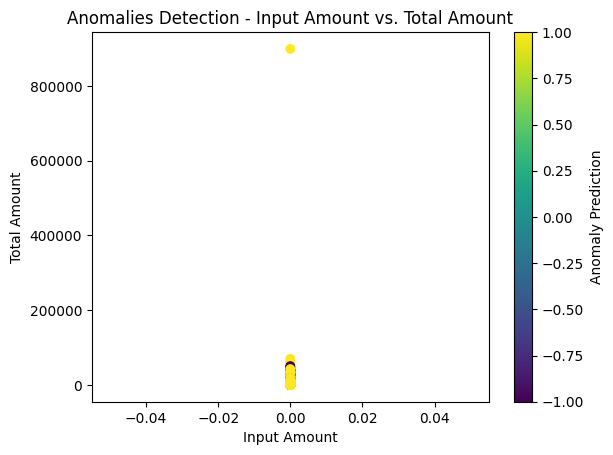

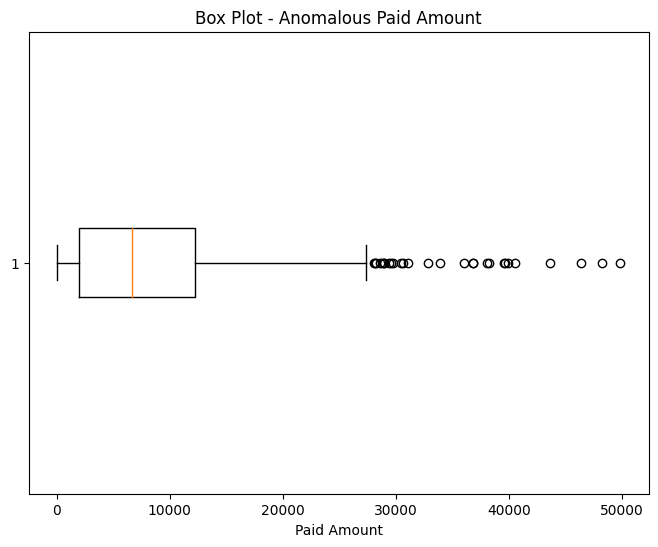

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Visualizing Anomalies

plt.scatter(data['input_amount'], data['total_amount'], c=data['anomaly_prediction'], cmap='viridis')
plt.xlabel('Input Amount')
plt.ylabel('Total Amount')
plt.title('Anomalies Detection - Input Amount vs. Total Amount')
plt.colorbar(label='Anomaly Prediction')
plt.show()

# Box plot for 'paid_amount' to visualize the distribution of anomalies
plt.figure(figsize=(8, 6))
plt.boxplot(data.loc[data['anomaly_prediction'] == -1, 'paid_amount'], vert=False)
plt.xlabel('Paid Amount')
plt.title('Box Plot - Anomalous Paid Amount')
plt.show()


# Anomaly detection in customer data

In [36]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Aggregate data at the customer level to generate customer features
customer_features = data.groupby('customer_id').agg(
    total_spending=('total_amount', 'sum'),
    average_transaction=('total_amount', 'mean'),
    number_of_transactions=('eazypay_id', 'count'),
    total_coupons_used=('coupon_ids', lambda x: x.notnull().sum()),
    total_deal_discounts=('deal_discount_amount', 'sum'),
    total_paid_amount=('paid_amount', 'sum'),
    most_common_time_category=('time_category', lambda x: x.value_counts().idxmax()),
    most_common_date_category=('date_category', lambda x: x.value_counts().idxmax())
).reset_index()

# Select relevant columns for customer_features
customer_features = customer_features[['customer_id', 'total_spending', 'average_transaction', 'number_of_transactions',
                                       'total_coupons_used', 'total_deal_discounts', 'total_paid_amount',
                                       'most_common_time_category', 'most_common_date_category']]

# Apply Label Encoding for the categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
customer_features['most_common_time_category'] = label_encoder.fit_transform(customer_features['most_common_time_category'])
customer_features['most_common_date_category'] = label_encoder.fit_transform(customer_features['most_common_date_category'])

# Perform Isolation Forest for anomaly detection on customer features
features_for_anomaly_detection = ['total_spending', 'average_transaction', 'number_of_transactions',
                                  'total_coupons_used', 'total_deal_discounts', 'total_paid_amount',
                                  'most_common_time_category', 'most_common_date_category']

isolation_forest = IsolationForest(contamination=0.01)  
isolation_forest.fit(customer_features[features_for_anomaly_detection])
customer_features['anomaly_prediction'] = isolation_forest.predict(customer_features[features_for_anomaly_detection])

anomalous_customers = customer_features[customer_features['anomaly_prediction'] == -1]

anomalous_customers


c:\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


customer_id  total_spending  average_transaction  \
30            2774         71982.0         35991.000000   
66            8372         64393.0          4953.307692   
68            8567         60261.0         20087.000000   
118          13009         29556.0          7389.000000   
132          13982         24513.0          1634.200000   
...            ...             ...                  ...   
74441      3776162         40710.0         40710.000000   
74775      3780922         24065.0         24065.000000   
75061      3786604         13494.0         13494.000000   
75430      3793930         30066.0         30066.000000   
76578      3815592         22760.3         22760.300000   

       number_of_transactions  total_coupons_used  total_deal_discounts  \
30                          2                   1                     0   
66                         13                  13                     0   
68                          3                   3                     0   
118                         4                   4                     0   
132                        15                  15                     0   
...                       ...                 ...                   ...   
74441                       1                   1                     0   
74775                       1                   1                     0   
75061                       1                   0                  2024   
75430                       1                   1                     0   
76578                       1                   1                     0   

       total_paid_amount  most_common_time_category  \
30               70982.0                          1   
66               58087.0                          1   
68               58961.0                          1   
118              27658.0                          2   
132              19354.0                          1   
...                  ...                        ...   
74441            39960.0                          3   
74775            23565.0                          1   
75061            11470.0                          1   
75430            29566.0                          2   
76578            22010.3                          2   

       most_common_date_category  anomaly_prediction  
30                             0                  -1  
66                             0                  -1  
68                             0                  -1  
118                            0                  -1  
132                            0                  -1  
...                          ...                 ...  
74441                          1                  -1  
74775                          0                  -1  
75061                          0                  -1  
75430                          0                  -1  
76578                          0                  -1  

[770 rows x 10 columns]

# Anomaly detection in restaurant data

In [40]:
import pandas as pd
from sklearn.ensemble import IsolationForest


def get_most_common_coupon(coupon_ids):
    if coupon_ids.dropna().empty:
        return 'No Coupon'
    else:
        return coupon_ids.mode().iloc[0]

# Aggregate data at the restaurant level to generate restaurant features
restaurant_features = data.groupby('restaurant_id').agg(
    total_revenue=('paid_amount', 'sum'),
    average_transaction=('paid_amount', 'mean'),
    number_of_transactions=('eazypay_id', 'count'),
    total_coupon_amount=('coupon_amount', 'sum'),
    total_deal_discounts=('deal_discount_amount', 'sum'),
    most_common_city=('city', lambda x: x.value_counts().idxmax()),
    most_common_time_category=('time_category', lambda x: x.value_counts().idxmax()),
    most_common_date_category=('date_category', lambda x: x.value_counts().idxmax()),
    most_common_coupon_used=('coupon_ids', get_most_common_coupon)  # Calculate the most common coupon using custom function
).reset_index()

# Select relevant columns for restaurant_features
restaurant_features = restaurant_features[['restaurant_id', 'total_revenue', 'average_transaction', 'number_of_transactions',
                                           'total_coupon_amount', 'total_deal_discounts', 'most_common_city',
                                           'most_common_time_category', 'most_common_date_category',
                                           'most_common_coupon_used']]

# Apply Label Encoding for the categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
restaurant_features['most_common_city'] = label_encoder.fit_transform(restaurant_features['most_common_city'])
restaurant_features['most_common_time_category'] = label_encoder.fit_transform(restaurant_features['most_common_time_category'])
restaurant_features['most_common_date_category'] = label_encoder.fit_transform(restaurant_features['most_common_date_category'])

# Perform Isolation Forest for anomaly detection on restaurant features
features_for_anomaly_detection = ['total_revenue', 'average_transaction', 'number_of_transactions',
                                  'total_coupon_amount', 'total_deal_discounts', 'most_common_city',
                                  'most_common_time_category', 'most_common_date_category']

isolation_forest = IsolationForest(contamination=0.01)  
isolation_forest.fit(restaurant_features[features_for_anomaly_detection])
restaurant_features['anomaly_prediction'] = isolation_forest.predict(restaurant_features[features_for_anomaly_detection])

anomalous_restaurants = restaurant_features[restaurant_features['anomaly_prediction'] == -1]

anomalous_restaurants

c:\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


restaurant_id  total_revenue  average_transaction  \
64           110574     1538480.83          3680.576148   
96           111098     1187913.70          5033.532627   
187          121269     1243671.00          9949.368000   
223          220462     1504978.00          4732.635220   
252          221597     1747121.50          4963.413352   
302          223180     1644333.60          9504.818497   
319          223475      943758.00          3948.778243   
329          224781      290367.00          1781.392638   
405          330210     2435021.00          3121.821795   
429          331132     1541760.00          4247.272727   
458          335192      914912.00          3401.159851   
626          612986      750036.00          2322.092879   
641          613582       83518.00          1325.682540   
747          640208     1953245.06          3145.322158   
1021         648639      660002.00          3975.915663   
1073         649886     1053947.00          2773.544737   
1164         653491     1037902.00          4135.067729   
1222         655986      805550.00          2194.959128   
1253         656351     2618804.00          3310.750948   
1255         656366     1112158.00          3564.608974   
1449         661781       80676.00          3361.500000   
1562         662447     2915730.17          3414.203946   
1593         662827      874764.60          2803.732692   
1651         664725      234862.32          3980.717288   
1697         666055     2197224.86          6224.433031   
1715         666334     1267952.00          3877.529052   
1784         668981     1501338.00          2506.407346   
1854         669770     1587330.00          3137.015810   
1887         670090     1911174.75          3981.614062   
2366         673494     1355159.00          3257.593750   
2456         673896      894990.00          2288.976982   
2613         674366     1487338.00          3883.389034   
2667         681935      286285.00          2016.091549   
2801         682242      977453.00          2455.912060   
2908         682461      702427.00          2265.893548   
3000         682603     1130666.00          3023.171123   
3201         682911       57168.00          8166.857143   

      number_of_transactions  total_coupon_amount  total_deal_discounts  \
64                       418               204153                     0   
96                       236               106918                     0   
187                      125                71603                     0   
223                      318               153539                     0   
252                      352               185780                     0   
302                      173                91347                     0   
319                      239                98421                     0   
329                      163                40125                 81061   
405                      780               358295                     0   
429                      363               174107                     0   
458                      269               128735                     0   
626                      323               131366                     0   
641                       63                14254                 38227   
747                      621               277201                     0   
1021                     166                59477                121841   
1073                     380               170072                     0   
1164                     251               127083                     0   
1222                     367               155430                     0   
1253                     791               357195                     0   
1255                     312               138634                     0   
1449                      24                 8529                  8811   
1562                     854               369952                     0   
1593                     312          

In [42]:
nomalous_restaurants = restaurant_features[restaurant_features['anomaly_prediction'] != -1]

nomalous_restaurants

restaurant_id  total_revenue  average_transaction  \
0            110002      232757.00          3325.100000   
1            110004      359364.00          3823.021277   
2            110005      191784.00          2950.523077   
3            110009      210212.00          3966.264151   
4            110011       27646.07          3455.758750   
...             ...            ...                  ...   
3675         683893        5852.00          1950.666667   
3676         683896       28554.00          3172.666667   
3677         683897       14621.00          4873.666667   
3678         683900       20024.00          2002.400000   
3679         683908        6345.00          1586.250000   

      number_of_transactions  total_coupon_amount  total_deal_discounts  \
0                         70                34055                     0   
1                         94                44333                     0   
2                         65                29605                     0   
3                         53                20817                     0   
4                          8                 2574                     0   
...                      ...                  ...                   ...   
3675                       3                  973                     0   
3676                       9                 3093                     0   
3677                       3                 1839                     0   
3678                      10                 2418                     0   
3679                       4                 1422                     0   

      most_common_city  most_common_time_category  most_common_date_category  \
0                   20                          1                          0   
1                   20                          1                          0   
2                   20                          1                          1   
3                   20                          1                          1   
4                   20                          1                          1   
...                ...                        ...                        ...   
3675                31                          1                          0   
3676                54                          1                          1   
3677                54                          1                          1   
3678                10                          1                          0   
3679                54                          1                          0   

     most_common_coupon_used  anomaly_prediction  
0            {"4401240":500}                   1  
1            {"8982942":800}                   1  
2            {"6900077":750}                   1  
3            {"4401240":500}                   1  
4            {"6900077":750}                   1  
...                      ...                 ...  
3675         {"4401240":500}                   1  
3676        {"10185024":300}                   1  
3677        {"10188188":589}                   1  
3678         {"4622065":500}                   1  
3679        {"10185670":500}                   1  

[3643 rows x 11 columns]

In [45]:
normal_restaurants = restaurant_features[restaurant_features['anomaly_prediction'] == 1]

feature_columns = ['total_revenue', 'average_transaction', 'number_of_transactions',
                   'total_coupon_amount', 'total_deal_discounts', 'most_common_city',
                   'most_common_time_category', 'most_common_date_category']

normal_data_mean = normal_restaurants[feature_columns].mean()
normal_data_std = normal_restaurants[feature_columns].std()

deviation_data = anomalous_restaurants.copy()
for feature in feature_columns:
    deviation_data[f'{feature}_deviation'] = (anomalous_restaurants[feature] - normal_data_mean[feature]) / normal_data_std[feature]

deviation_data

restaurant_id  total_revenue  average_transaction  \
0            110002      232757.00          3325.100000   
1            110004      359364.00          3823.021277   
2            110005      191784.00          2950.523077   
3            110009      210212.00          3966.264151   
4            110011       27646.07          3455.758750   
...             ...            ...                  ...   
3675         683893        5852.00          1950.666667   
3676         683896       28554.00          3172.666667   
3677         683897       14621.00          4873.666667   
3678         683900       20024.00          2002.400000   
3679         683908        6345.00          1586.250000   

      number_of_transactions  total_coupon_amount  total_deal_discounts  \
0                         70                34055                     0   
1                         94                44333                     0   
2                         65                29605                     0   
3                         53                20817                     0   
4                          8                 2574                     0   
...                      ...                  ...                   ...   
3675                       3                  973                     0   
3676                       9                 3093                     0   
3677                       3                 1839                     0   
3678                      10                 2418                     0   
3679                       4                 1422                     0   

      most_common_city  most_common_time_category  most_common_date_category  \
0                   20                          1                          0   
1                   20                          1                          0   
2                   20                          1                          1   
3                   20                          1                          1   
4                   20                          1                          1   
...                ...                        ...                        ...   
3675                31                          1                          0   
3676                54                          1                          1   
3677                54                          1                          1   
3678                10                          1                          0   
3679                54                          1                          0   

     most_common_coupon_used  anomaly_prediction  total_revenue_deviation  \
0            {"4401240":500}                   1                 1.078029   
1            {"8982942":800}                   1                 1.988594   
2            {"6900077":750}                   1                 0.783348   
3            {"4401240":500}                   1                 0.915884   
4            {"6900077":750}                   1                -0.397141   
...                      ...                 ...                      ...   
3675         {"4401240":500}                   1                -0.553886   
3676        {"10185024":300}                   1                -0.390611   
3677        {"10188188":589}                   1                -0.490818   
3678         {"4622065":500}                   1                -0.451960   
3679        {"10185670":500}                   1                -0.550340   

      average_transaction_deviation  number_of_transactions_deviation  \
0                          0.639992                          0.994759   
1                          0.967552                          1.574495   
2                          0.393575                          0.873980   
3                          1.061785                          0.584112   
4                          0.725947                         -0.502893   
...                             ...                               ...   

# Coupons

In [28]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Eazydiner\Downloads\coupon_list.csv",encoding="latin1")
df.iloc[:,35:]

sort_order  tnc                                       logo  status  \
0            8  NaN                 settings/payment/au-3x.png       1   
1            5  NaN            settings/payment/upi-logo-2.jpg       1   
2           10  NaN                  settings/payment/card.png       1   
3            7  NaN              settings/payment/dbs-bank.png       1   
4           10  NaN  settings/payment/IDFC-FIRST-Bank-Logo.png       1   
5            7  NaN             settings/payment/IDBI-logo.png       1   
6            6  NaN          settings/payment/SIB-logo-new.png       1   
7            3  NaN              settings/payment/icici-3x.png       1   
8            1  NaN        settings/payment/Axis-Bank-logo.png       1   
9            6  NaN        settings/payment/Axis-Bank-logo.png       1   
10           9  NaN        settings/payment/Axis-Bank-logo.png       1   
11           6  NaN     settings/payment/Federal-Bank-logo.png       1   
12           6  NaN     settings/payment/Federal-Bank-logo.png       1   
13          14  NaN                 settings/payment/au-3x.png       1   
14           4  NaN   settings/payment/standard-charted-3x.png       1   
15           8  NaN               settings/payment/hsbc-3x.png       1   
16          16  NaN               settings/payment/hsbc-3x.png       1   
17           8  NaN               settings/payment/hsbc-3x.png       1   
18           8  NaN               settings/payment/hsbc-3x.png       1   
19          14  NaN                 settings/payment/au-3x.png       1   
20           2  NaN               settings/payment/citi-3x.png       1   
21          60  NaN                settings/payment/RBL-3x.png       1   
22          60  NaN                settings/payment/RBL-3x.png       1   
23         110  NaN        settings/payment/amex_2020_logo.png       1   
24         110  NaN        settings/payment/amex_2020_logo.png       1   
25           6  NaN      settings/payment/kotak-bank-loggo.png       1   
26          94  NaN      settings/payment/kotak-bank-loggo.png       1   
27         140  NaN                 settings/payment/HDFC.jpeg       1   
28         140  NaN                 settings/payment/HDFC.jpeg       1   
29          95  NaN          settings/payment/indus-ind-3x.png       1   
30           0  NaN          settings/payment/indus-ind-3x.png       1   
31           6  NaN          settings/payment/indus-ind-3x.png       1   
32           6  NaN          settings/payment/indus-ind-3x.png       1   
33           5  NaN                 settings/payment/au-3x.png       1   
34         150  NaN               settings/payment/mobi-3x.png       1   
35          10  NaN         settings/payment/Emirates-logo.png       1   
36          10  NaN          settings/payment/indus-ind-3x.png       1   
37           5  NaN              settings/payment/dbs-bank.png       1   

    is_bank_sponsored                                    offer_condition  \
0                   0  {"credit_card":1,"type":"cards","max_transacti...   
1                   1                             {"UPI":1,"type":"UPI"}   
2                   0                                                NaN   
3                   0  {"credit_card":1,"debit_card":1,"type":"cards"...   
4                   0  {"credit_card":1,"type":"cards","max_transacti...   
5                   0  {"credit_card":1,"debit_card":1,"type":"cards"...   
6                   0  {"debit_card":1,"type":"cards","max_transactio...   
7                   0  {"netbanking":1,"type":"net_banking","bank":"I...   
8                   0  {"credit_card":1,"debit_card":1,"type":"cards"...   
9                   0  {"credit_card":1,"debit_card":1,"type":"cards"...   
10                  0  {"credit_card":1,"debit_card":1,"type":"cards"...   
11                  0  {"debit_card":1,"type":"cards","max_transactio...   
12                  0  {"credit_card":1,"type":"cards","max_transacti...   
13                  0  {"credit_card":1,"debit_card":

In [35]:
columns = ['id','code','bank','price', 'discount_percentage','minimum_transaction','one_time','coupon_id','country_id','valid_from', 'valid_to','bank']

In [40]:
df[columns]

id          code                bank  price  discount_percentage  \
0   13205916       AUPRIME             AU Bank      0                    0   
1   16695808         UPI75                 UPI     75                   10   
2   16595957    DUBAIPYEZY                 NaN     10                   10   
3   17668265        DBS500            DBS Bank    500                   20   
4   16087925       IDFC750     IDFC First Bank    750                   15   
5   16626335      IDBI1000           IDBI Bank   1000                   15   
6   17751738        SIB750   South Indian Bank    750                   15   
7   17802139    ICICINB750               ICICI    750                   15   
8   17802140   EDAXISPAY40                AXIS   1000                   40   
9   17802141   EDAXISPAY25                AXIS    800                   25   
10  17802145   EDAXISPAY15                AXIS    500                   15   
11  16626334       FBDC500        Federal Bank    500                   15   
12  16626333       FBCC750        Federal Bank    750                   15   
13  17802164       AUCC500                  AU    500                   15   
14  16626347         SC750  Standard Chartered    750                   15   
15  17802190     ONDEBITPR                HSBC   1000                    0   
16   8399064       HSBC600                HSBC    600                   30   
17  17051189     HSBCPC500                HSBC    500                   20   
18   8399065       HSBC500                HSBC    500                   15   
19  17518643        AU1000                  AU   1000                   20   
20  17740618  CITIBANK1000                CITI   1000                   20   
21  17802340        RBL500                 RBL    500                   30   
22  17808016      RBLDC500                 RBL    500                   30   
23  17686136      AMEX1000                AmEx   1000                    0   
24  17686143      AMEX2500                AmEx   2500                    0   
25  17659666      KOTAK750               Kotak    750                   20   
26  11395680     KOTAK1000               Kotak   1000                   30   
27  11125806      HDFC1500                HDFC   1500                   10   
28  11125807  HDFCPLTM1500                HDFC   1500                   15   
29  16625259     EMKGHJRTD            INDUSIND   3000                    0   
30   9173809  INDUSIND1000            IndusInd   1000                   25   
31  16304187      IBLDC500            INDUSIND    500                   20   
32  15989645      IBLCC500            INDUSIND    500                   15   
33  17802352       AUDC750                  AU    750                   15   
34   7198123      MOBIKWIK                 NaN      0                    0   
35  17803675   EMIRATESNBD                 NaN     20                   20   
36  17806549    INDUSIND40                 NaN     40                   25   
37  17825494      DBSV1000            DBS Bank   1000                    0   

    minimum_transaction  one_time  coupon_id  country_id        valid_from  \
0                   0.0         1   13205916           1   31/07/2022 0:00   
1                   NaN         0   16695808           1  31/12/2022 13:16   
2                   NaN         0   16595957           2   25/01/2023 0:00   
3                2500.0         0   17668265           1   20/05/2023 0:00   
4                2500.0         0   16087925           1   01/06/2023 0:00   
5                2000.0         0   16626335           1   10/06/2023 0:00   
6                2000.0         0   17751738           1   10/06/2023 0:00   
7                3500.0         1   17802139           1   01/07/2023 0:00   
8                2500.0         0   17802140           1   01/07/2023 0:00   
9                2500.0         0   17802141           1   01/07/2023 0:00   
10               2500.0         0   17802145           1   01/07/2023 0:00   
11               3000.0        

In [38]:
df1[df1['price']!=0]

id          code                bank  price  discount_percentage  \
1   16695808         UPI75                 UPI     75                   10   
2   16595957    DUBAIPYEZY                 NaN     10                   10   
3   17668265        DBS500            DBS Bank    500                   20   
4   16087925       IDFC750     IDFC First Bank    750                   15   
5   16626335      IDBI1000           IDBI Bank   1000                   15   
6   17751738        SIB750   South Indian Bank    750                   15   
7   17802139    ICICINB750               ICICI    750                   15   
8   17802140   EDAXISPAY40                AXIS   1000                   40   
9   17802141   EDAXISPAY25                AXIS    800                   25   
10  17802145   EDAXISPAY15                AXIS    500                   15   
11  16626334       FBDC500        Federal Bank    500                   15   
12  16626333       FBCC750        Federal Bank    750                   15   
13  17802164       AUCC500                  AU    500                   15   
14  16626347         SC750  Standard Chartered    750                   15   
15  17802190     ONDEBITPR                HSBC   1000                    0   
16   8399064       HSBC600                HSBC    600                   30   
17  17051189     HSBCPC500                HSBC    500                   20   
18   8399065       HSBC500                HSBC    500                   15   
19  17518643        AU1000                  AU   1000                   20   
20  17740618  CITIBANK1000                CITI   1000                   20   
21  17802340        RBL500                 RBL    500                   30   
22  17808016      RBLDC500                 RBL    500                   30   
23  17686136      AMEX1000                AmEx   1000                    0   
24  17686143      AMEX2500                AmEx   2500                    0   
25  17659666      KOTAK750               Kotak    750                   20   
26  11395680     KOTAK1000               Kotak   1000                   30   
27  11125806      HDFC1500                HDFC   1500                   10   
28  11125807  HDFCPLTM1500                HDFC   1500                   15   
29  16625259     EMKGHJRTD            INDUSIND   3000                    0   
30   9173809  INDUSIND1000            IndusInd   1000                   25   
31  16304187      IBLDC500            INDUSIND    500                   20   
32  15989645      IBLCC500            INDUSIND    500                   15   
33  17802352       AUDC750                  AU    750                   15   
35  17803675   EMIRATESNBD                 NaN     20                   20   
36  17806549    INDUSIND40                 NaN     40                   25   
37  17825494      DBSV1000            DBS Bank   1000                    0   

    minimum_transaction  one_time  coupon_id  country_id        valid_from  \
1                   NaN         0   16695808           1  31/12/2022 13:16   
2                   NaN         0   16595957           2   25/01/2023 0:00   
3                2500.0         0   17668265           1   20/05/2023 0:00   
4                2500.0         0   16087925           1   01/06/2023 0:00   
5                2000.0         0   16626335           1   10/06/2023 0:00   
6                2000.0         0   17751738           1   10/06/2023 0:00   
7                3500.0         1   17802139           1   01/07/2023 0:00   
8                2500.0         0   17802140           1   01/07/2023 0:00   
9                2500.0         0   17802141           1   01/07/2023 0:00   
10               2500.0         0   17802145           1   01/07/2023 0:00   
11               3000.0         0   16626334           1   01/07/2023 0:00   
12               3000.0         0   16626333           1   01/07/2023 0:00   
13               2500.0         0   17802164           1   01/07/2023 0:00   
14               2000.0        

In [41]:
df1.to_csv("coupons.csv")

# Custering

# Creating Features

In [2]:
import pandas as pd
df = pd.read_csv("D:\EazyDiner\Eazypay_transactions.csv")
df=df.iloc[:,:15]
df['date'] = pd.to_datetime(df['EazyPayTran_Date'])
df['day_of_week'] = df['date'].dt.dayofweek
df
  
# Creating Features

# Day
def map_to_category(num):
    if num in [5, 6]:
        return "weekend"
    else:
        return "weekdays"
df['day_category'] = df['day_of_week'].apply(map_to_category)
df['day_category'] = pd.Categorical(df['day_category'], categories=["weekdays", "weekend"], ordered=True)
df



#Time
df['EazyPayTran_Date'] = pd.to_datetime(df['EazyPayTran_Date'])
df['EazyPayTran_Time'] = pd.to_datetime(df['EazyPayTran_Time']).dt.time

def categorize_time(time):
    if (time >= pd.to_datetime('04:00 PM').time() or time < pd.to_datetime('01:00 AM').time()):
        return 'dinner'
    elif time >= pd.to_datetime('05:00 AM').time() and time < pd.to_datetime('11:00 AM').time():
        return 'breakfast'
    elif time >= pd.to_datetime('11:00 AM').time() and time < pd.to_datetime('04:00 PM').time():
        return 'lunch'
    else:
        return 'others'

df['time_category'] = df['EazyPayTran_Time'].apply(categorize_time)




#Cities
metropolitan_cities = ['Bengaluru', 'Kolkata', 'Mumbai', 'Pune', 'Delhi NCR', 'Hyderabad', 'Chennai']
    
def categorize_city(city):
    if city in metropolitan_cities:
        return 'Metropolitan'
    else:
        return 'Non-Metropolitan'

df['city_type'] = df['city'].apply(categorize_city)
df




C:\Users\Eazydiner\AppData\Local\Temp\ipykernel_15848\3675795274.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['EazyPayTran_Date'])
C:\Users\Eazydiner\AppData\Local\Temp\ipykernel_15848\3675795274.py:23: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['EazyPayTran_Date'] = pd.to_datetime(df['EazyPayTran_Date'])


eazypay_id  customer_id  restaurant_id         coupon_ids  \
0          1737261      3757736         330185   {"11257778":750}   
1          1737264      4123788         683675  {"16254434":1000}   
2          1737266      4346172         334794   {"16299617":400}   
3          1737268      3838830         683719                NaN   
4          1737270       555480         658420   {"11257778":651}   
...            ...          ...            ...                ...   
547479     3160673      4087932         684312   {"17802139":685}   
547480     3160679      5862523         600127    {"16695808":75}   
547481     3160680      4080631         640389                NaN   
547482     3160684      5862420         110077   {"16626347":367}   
547483     3160691      3288633         335312    {"16695808":75}   

                             name                                 location  \
0       AB's - Absolute Barbecues             Marathahalli, East Bengaluru   
1                     Kitchen 165                        NX Hotel, Kolkata   
2                          Plan B          Brigade Road, Central Bengaluru   
3                  Punjab Grill\t              R City Mall, Ghatkopar West   
4                  Copper Chimney         Phoenix Market City, Viman Nagar   
...                           ...                                      ...   
547479   BBM - Buffet Bar & Music                    Gachibowli, Hyderabad   
547480              Flame & Grill  South City Mall, Prince Anwar Shah Road   
547481            Jungle Jamboree               Rajouri Garden, West Delhi   
547482                    Chili's                   Ambience Mall, Gurgaon   
547483            Barbeque Nation         Ascendas Park Square, Whitefield   

             city  input_amount  total_amount  coupon_amount  \
0       Bengaluru        7718.0        7753.0          750.0   
1         Kolkata        7203.0        7238.0         1000.0   
2       Bengaluru        6157.0        6192.0          400.0   
3          Mumbai        2119.0        2119.0            0.0   
4            Pune        4308.0        4343.0          651.0   
...           ...           ...           ...            ...   
547479  Hyderabad        4523.0        4568.0          685.0   
547480    Kolkata        3050.0        3085.0           75.0   
547481  Delhi NCR        1339.0        1339.0            0.0   
547482  Delhi NCR        2418.0        2453.0          367.0   
547483  Bengaluru        1678.0        1713.0           75.0   

        deal_discount_amount  paid_amount EazyPayTran_Date EazyPayTran_Time  \
0                          0       7003.0       2023-01-01         00:00:43   
1                       1801       4437.0       2023-01-01         00:01:12   
2                          0       5792.0       2023-01-01         00:01:26   
3                          0       2119.0       2023-01-01         00:02:19   
4                          0       3692.0       2023-01-01         00:02:29   
...                      ...          ...              ...              ...   
547479                     0       3883.0       2023-07-18         16:29:10   
547480                     0       3010.0       2023-07-18         16:30:00   
547481                     0       1339.0       2023-07-18         16:30:12   
547482                     0       2086.0       2023-07-18         16:32:43   
547483                     0       1638.0       2023-07-18         16:33:58   

        Prime       date  day_of_week day_category time_category     city_type  
0          NO 2023-01-01            6      weekend        dinner  Metropolitan  
1       Prime 2023-01-01            6      weekend        dinner  Metropolitan  
2          NO 2023-01-01            6      weekend        dinner  Metropolitan  
3          NO 2023-01-01            6      weekend        dinner  Metropolitan  
4          NO 2023-01-01            6      weekend        dinner  Metropolitan  
...       ...        ...          ... 

# Preprocessing

In [4]:
features= ['city_type', 'input_amount', 'total_amount', 'coupon_amount',
       'deal_discount_amount', 'paid_amount','Prime','day_category','time_category']
data = df[features]
data
from sklearn.preprocessing import StandardScaler
categorical_columns = ['day_category', 'Prime','city_type','time_category']
numerical_columns = ['input_amount', 'total_amount', 'coupon_amount','deal_discount_amount', 'paid_amount']
df1 = pd.get_dummies(data, columns=categorical_columns)
data1 = df1[['input_amount', 'total_amount', 'coupon_amount', 'deal_discount_amount',
       'paid_amount', 'day_category_weekdays', 'day_category_weekend',
       'Prime_NO', 'Prime_Prime', 'city_type_Metropolitan',
       'city_type_Non-Metropolitan', 'time_category_breakfast',
       'time_category_dinner', 'time_category_lunch', 'time_category_others']]
scaler = StandardScaler()
data1[numerical_columns] = scaler.fit_transform(data1[numerical_columns])

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

n_clusters = 20

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data1)
data1["cluster"] = cluster_labels
df1["cluster"] = kmeans.labels_

# Group data points by cluster labels and calculate the mean for each cluster
cluster_means = data1.groupby('cluster').mean().reset_index()
cluster_means2 = df1.groupby('cluster').mean().reset_index()

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
df1[df1['cluster']==14]

NameError: name 'df1' is not defined

In [6]:
scaler = StandardScaler()
columns = ['cluster', 'input_amount', 'total_amount', 'coupon_amount',
       'deal_discount_amount', 'paid_amount', 'day_category_weekdays',
       'day_category_weekend', 'Prime_NO', 'Prime_Prime',
       'city_type_Metropolitan', 'city_type_Non-Metropolitan',
       'time_category_breakfast', 'time_category_dinner',
       'time_category_lunch', 'time_category_others']
cluster_means_scaled = cluster_means2[columns]
cluster_means_scaled[columns] = scaler.fit_transform(cluster_means_scaled[columns])

In [5]:
cluster_means2

cluster  input_amount  total_amount  coupon_amount  deal_discount_amount  \
0         0   1759.166681   1788.998818     166.705525             15.370591   
1         1   7521.167981   7560.776118     817.019712              0.000000   
2         2   3872.022612   3903.217264     901.632132              4.190466   
3         3   3785.636508   3816.546059     896.964397              4.308298   
4         4  19025.212286  19063.742332     851.594446              0.000000   
5         5   4075.654145   4106.174650     368.473817            874.026246   
6         6   1694.295801   1720.615988     212.464650             15.361289   
7         7   1806.886305   1837.334028     179.181837             14.016055   
8         8   1464.371372   1488.442581     194.966825             14.843233   
9         9  24149.792208  24187.064935     637.766234           8671.571429   
10       10   1667.944183   1689.757964     264.687495             12.915007   
11       11   4010.854360   4048.485198     702.913246              3.216820   
12       12   1644.680307   1665.642684     258.448682             14.084658   
13       13   1465.228419   1490.508818     206.657384             12.046695   
14       14  35351.594697  35388.397727    1358.386364             13.153030   
15       15   4157.108247   4194.874623     705.656151              2.850766   
16       16   6691.690660   6734.710525    2828.311669             10.276834   
17       17   4343.640817   4381.669593     718.911077              3.263263   
18       18   8604.326925   8638.684018     460.482180           2616.844165   
19       19  11672.589751  11711.326827     791.689187              0.000000   

     paid_amount  day_category_weekdays  day_category_weekend  Prime_NO  \
0    1606.906345               1.000000              0.000000  1.000000   
1    6736.139910               0.664348              0.335652  0.658418   
2    2973.200671               0.000000              1.000000  0.000397   
3    2890.811931               1.000000              0.000000  0.000520   
4   18197.670271               0.659085              0.340915  0.583912   
5    2855.276454               0.649968              0.350032  0.652997   
6    1485.867098               0.000000              1.000000  0.713354   
7    1644.127872               0.000000              1.000000  1.000000   
8    1272.099602               1.000000              0.000000  0.703156   
9   14875.818182               0.662338              0.337662  0.454545   
10   1391.007749               0.000000              1.000000  0.000000   
11   3342.329262               1.000000              0.000000  0.999944   
12   1370.285000               1.000000              0.000000  0.000000   
13   1267.127509               0.728024              0.271976  0.803795   
14  34014.118939               0.715152              0.284848  0.557576   
15   3486.347841               0.000000              1.000000  0.998995   
16   3896.122022               0.654918              0.345082  0.133931   
17   3659.492700               0.583687              0.416313  0.993596   
18   5553.663753               0.650594              0.349406  0.599581   
19  10911.009840               0.622774              0.377226  0.633903   

    Prime_Prime  city_type_Metropolitan  city_type_Non-Metropolitan  \
0      0.000000                1.000000                    0.000000   
1      0.341582                0.940153                    0.059847   
2      0.999603                0.927069                    0.072931   
3      0.999480                0.916241                    0.083759   
4      0.416088                0.964568                    0.035432   
5      0.347003                0.924921                    0.075079   
6      0.286646                0.846638                    0.153362   
7      0.000000                1.000000                    0.000000   
8      0.296844                0.819257                    0.180743   
9      0.545455                0.9870

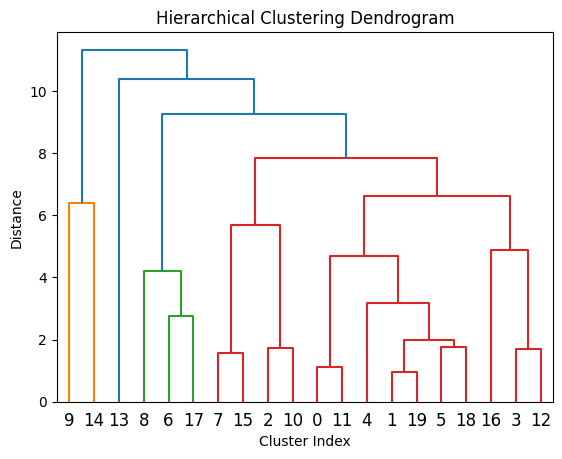

Merging Clusters: [12] and 3


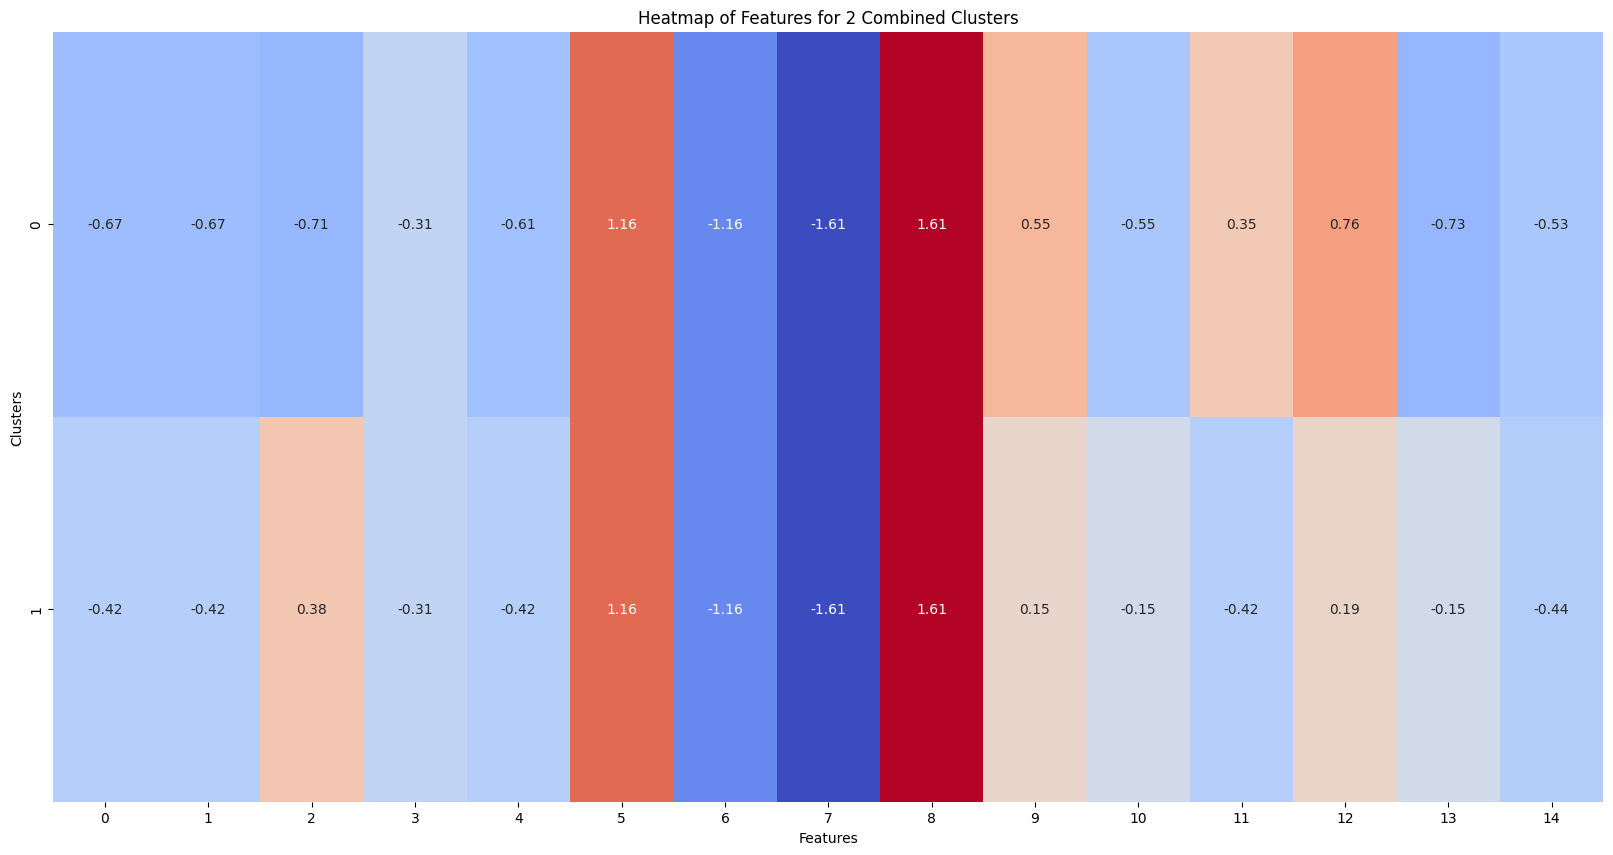

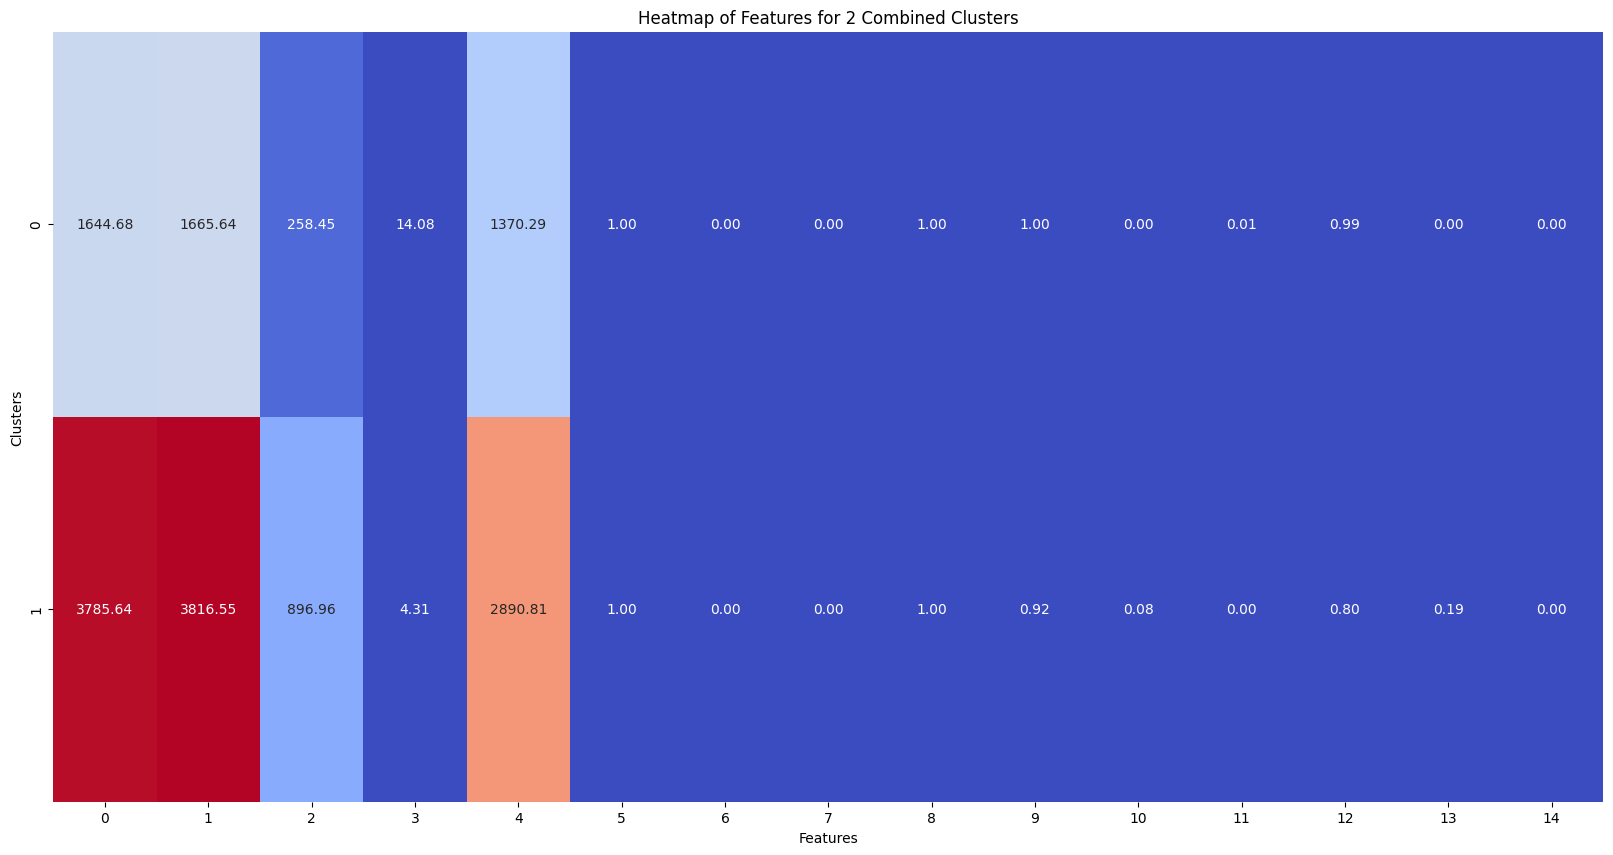

Merging Clusters: [12, 3] and 16


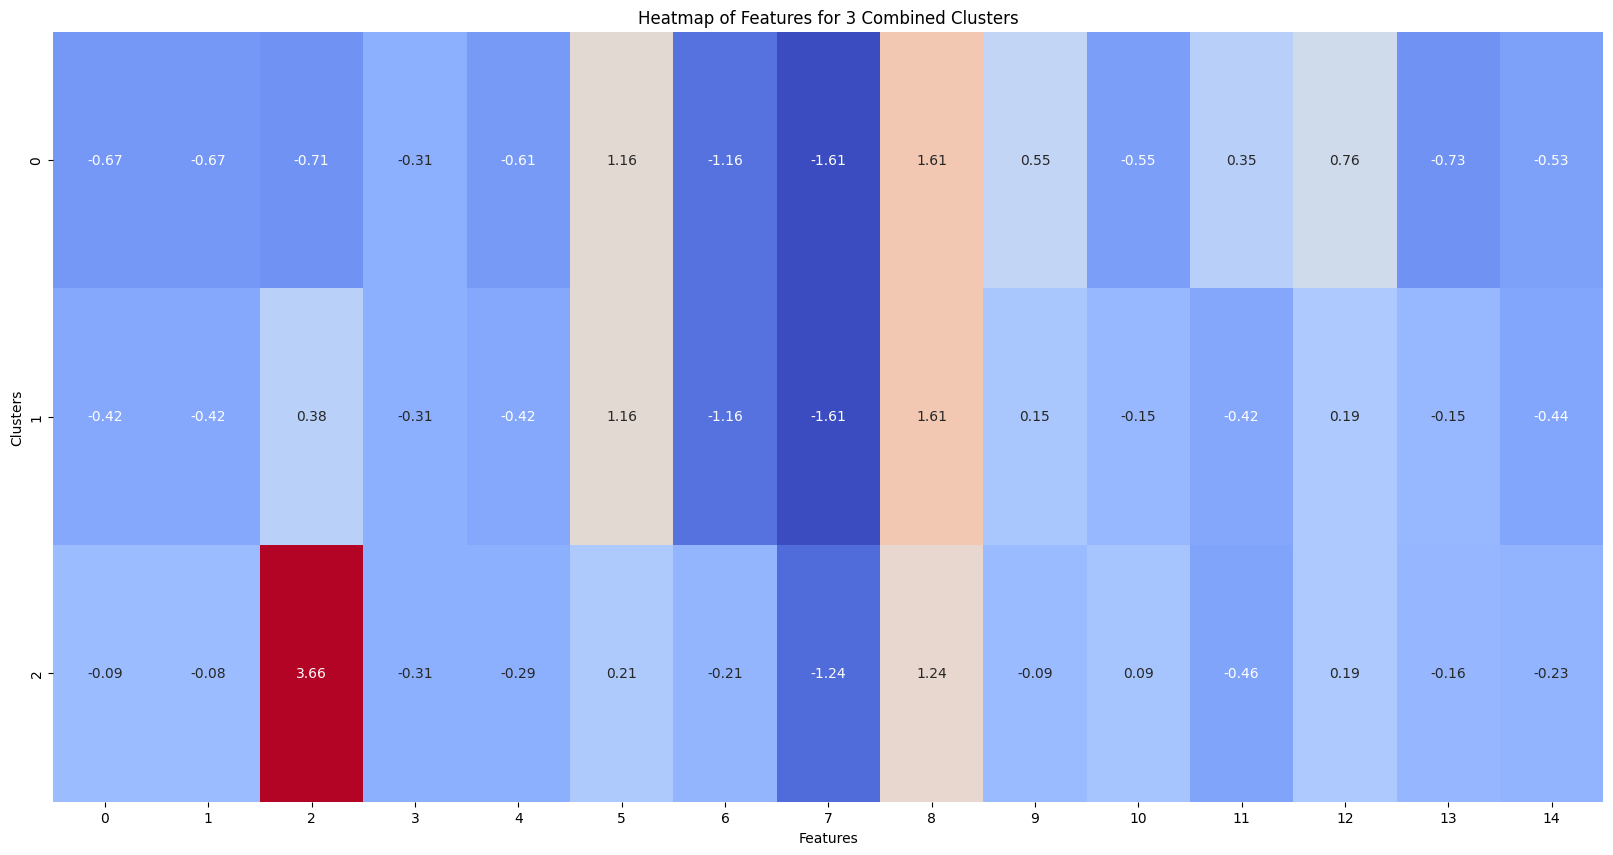

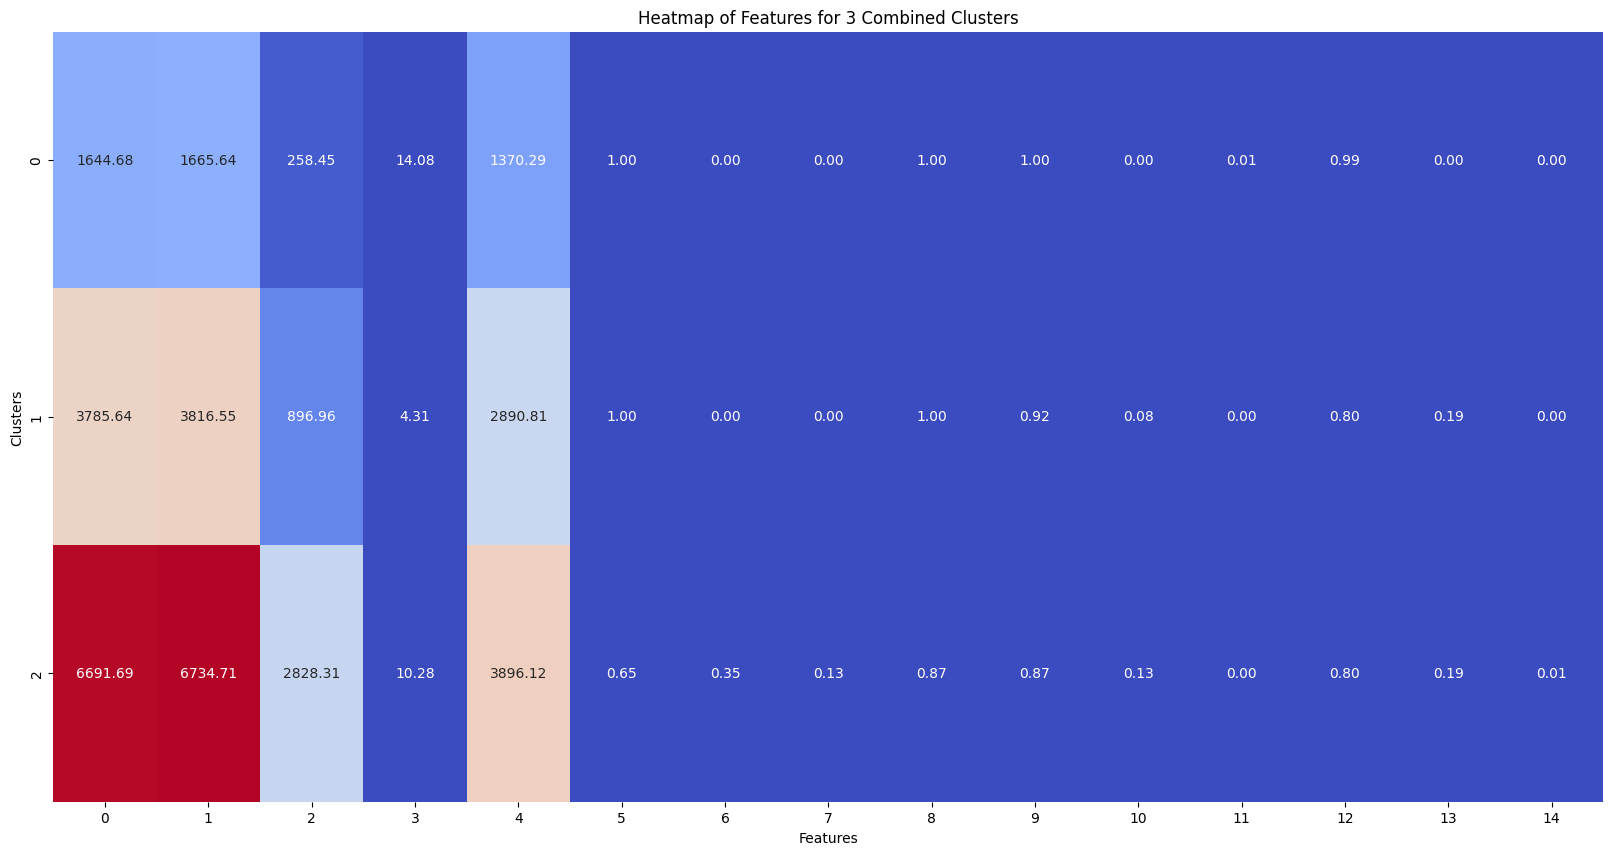

Merging Clusters: [12, 3, 16] and 18


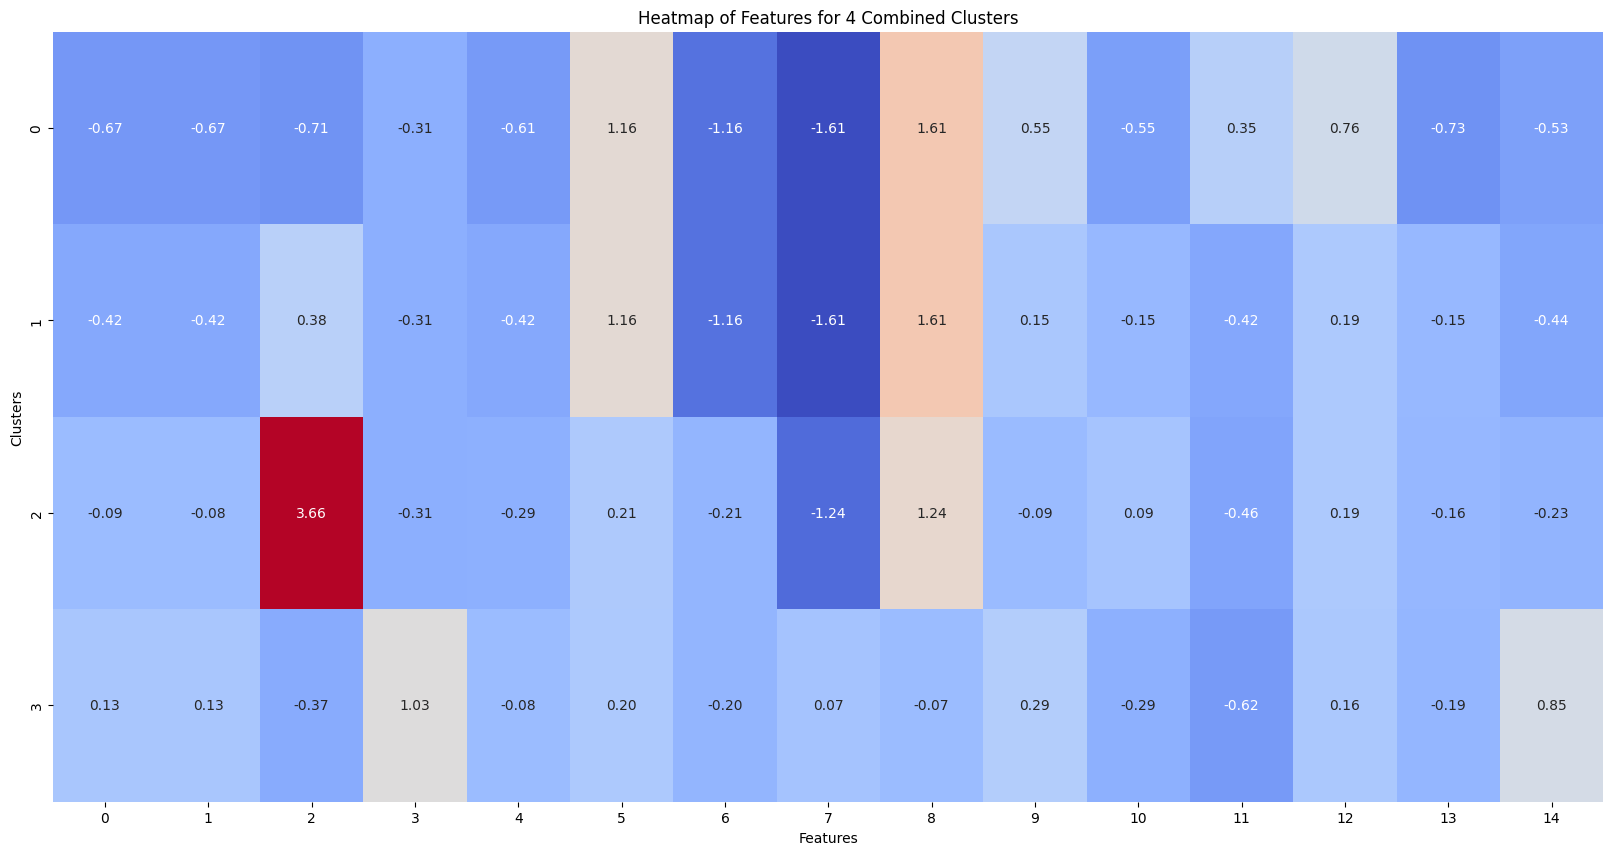

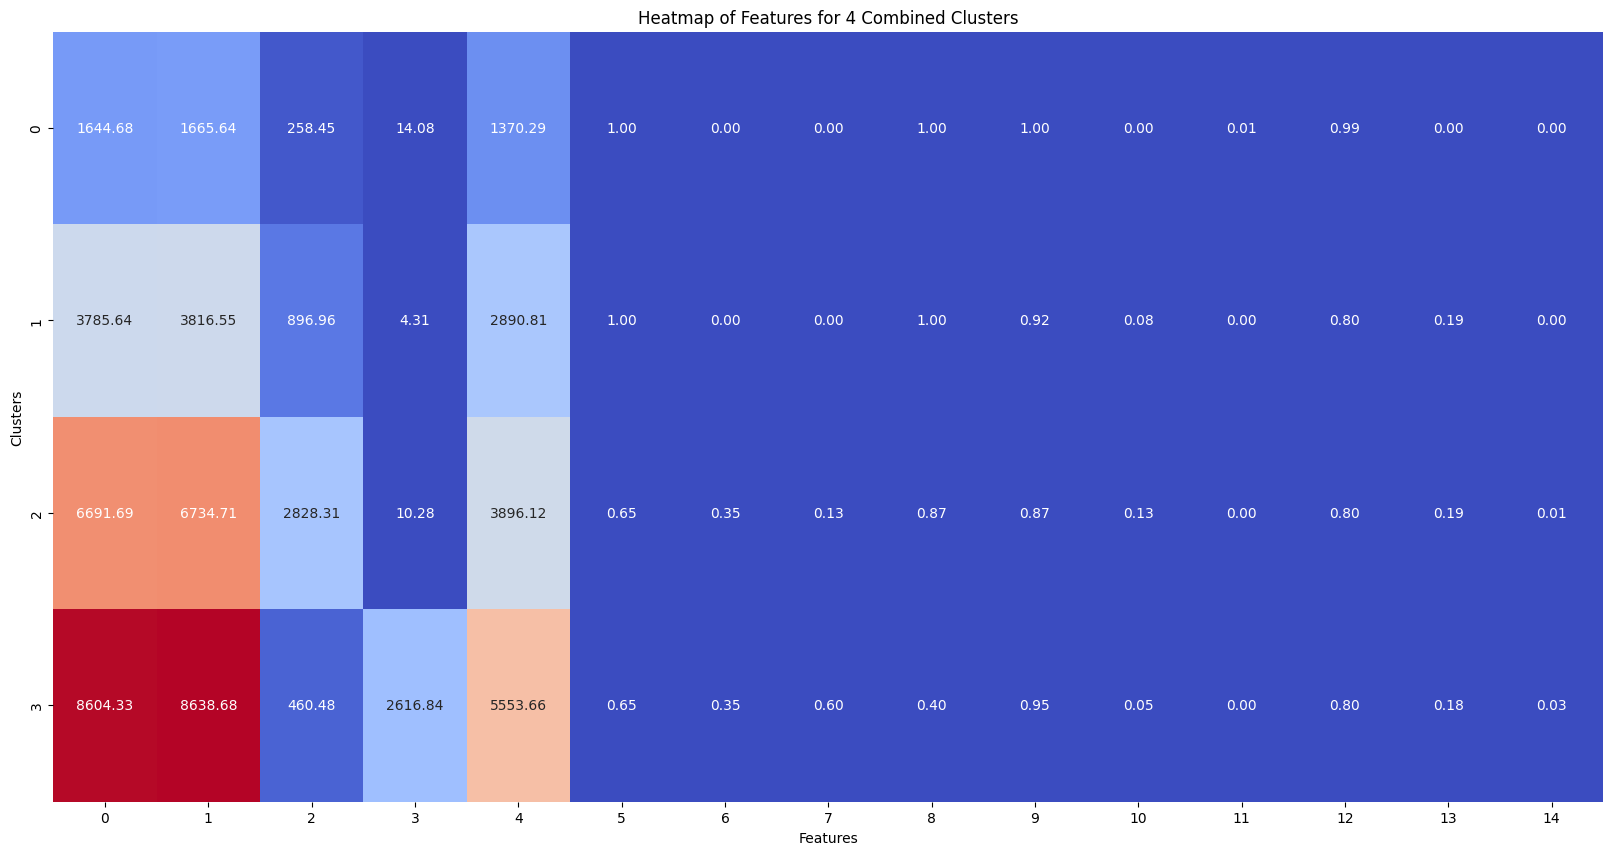

Merging Clusters: [12, 3, 16, 18] and 5


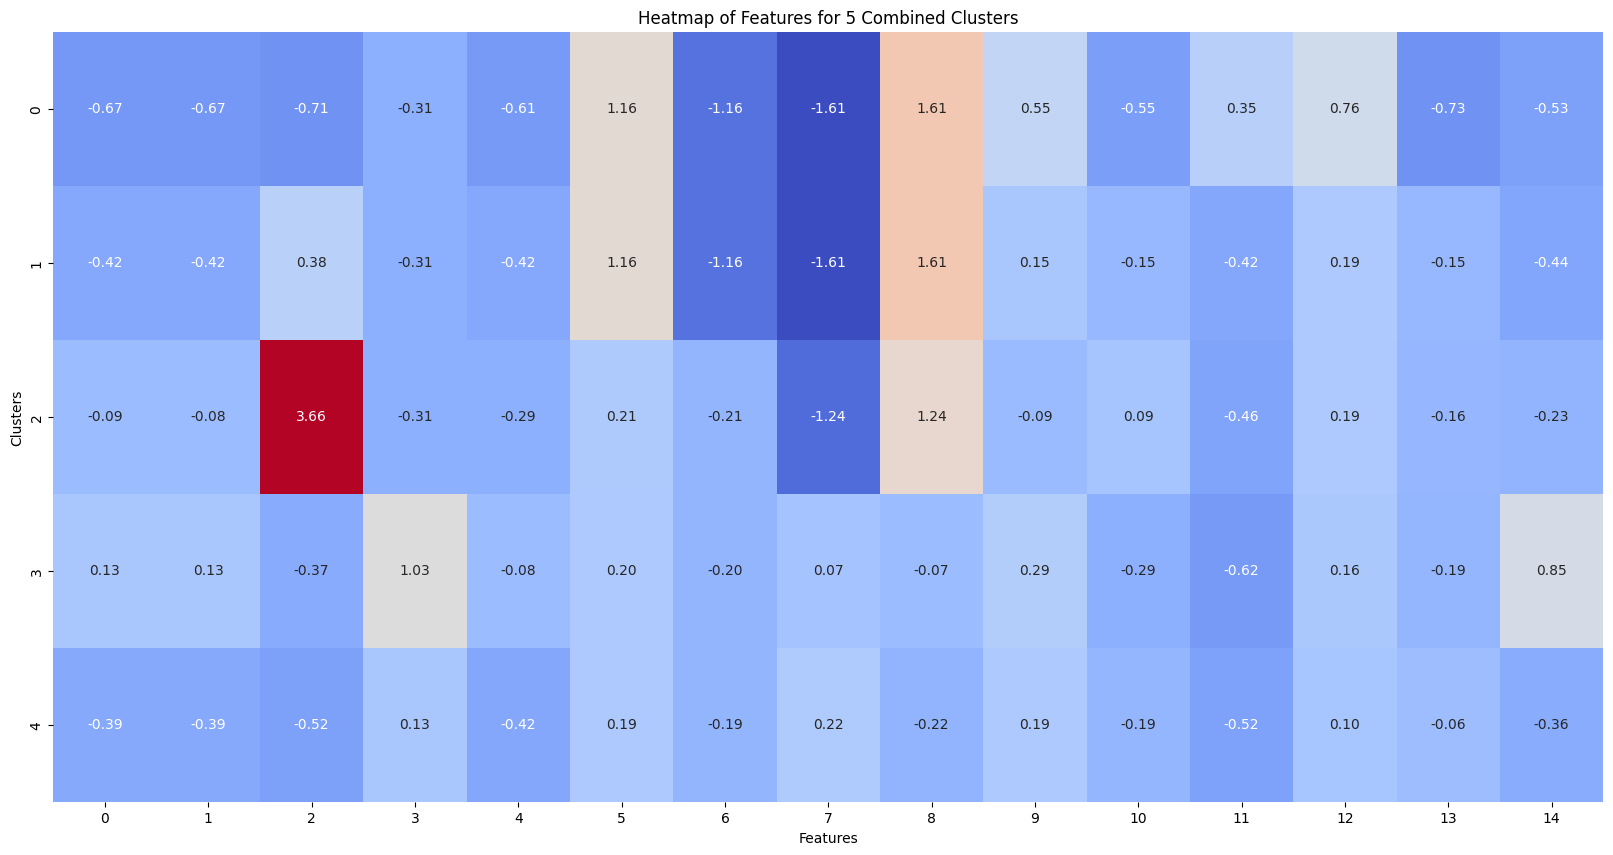

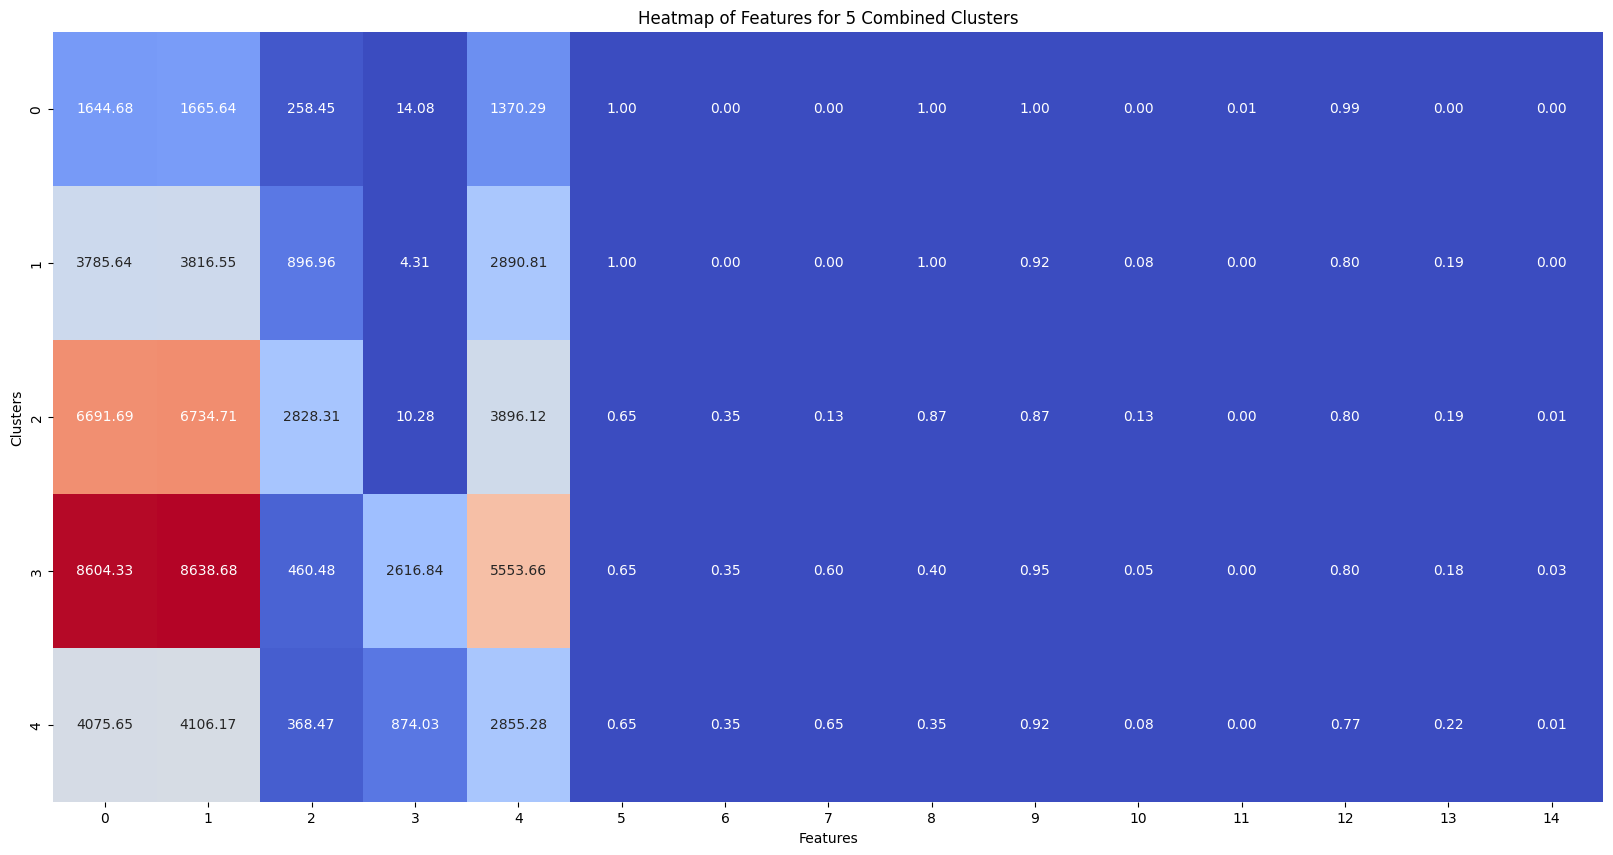

Merging Clusters: [12, 3, 16, 18, 5] and 19


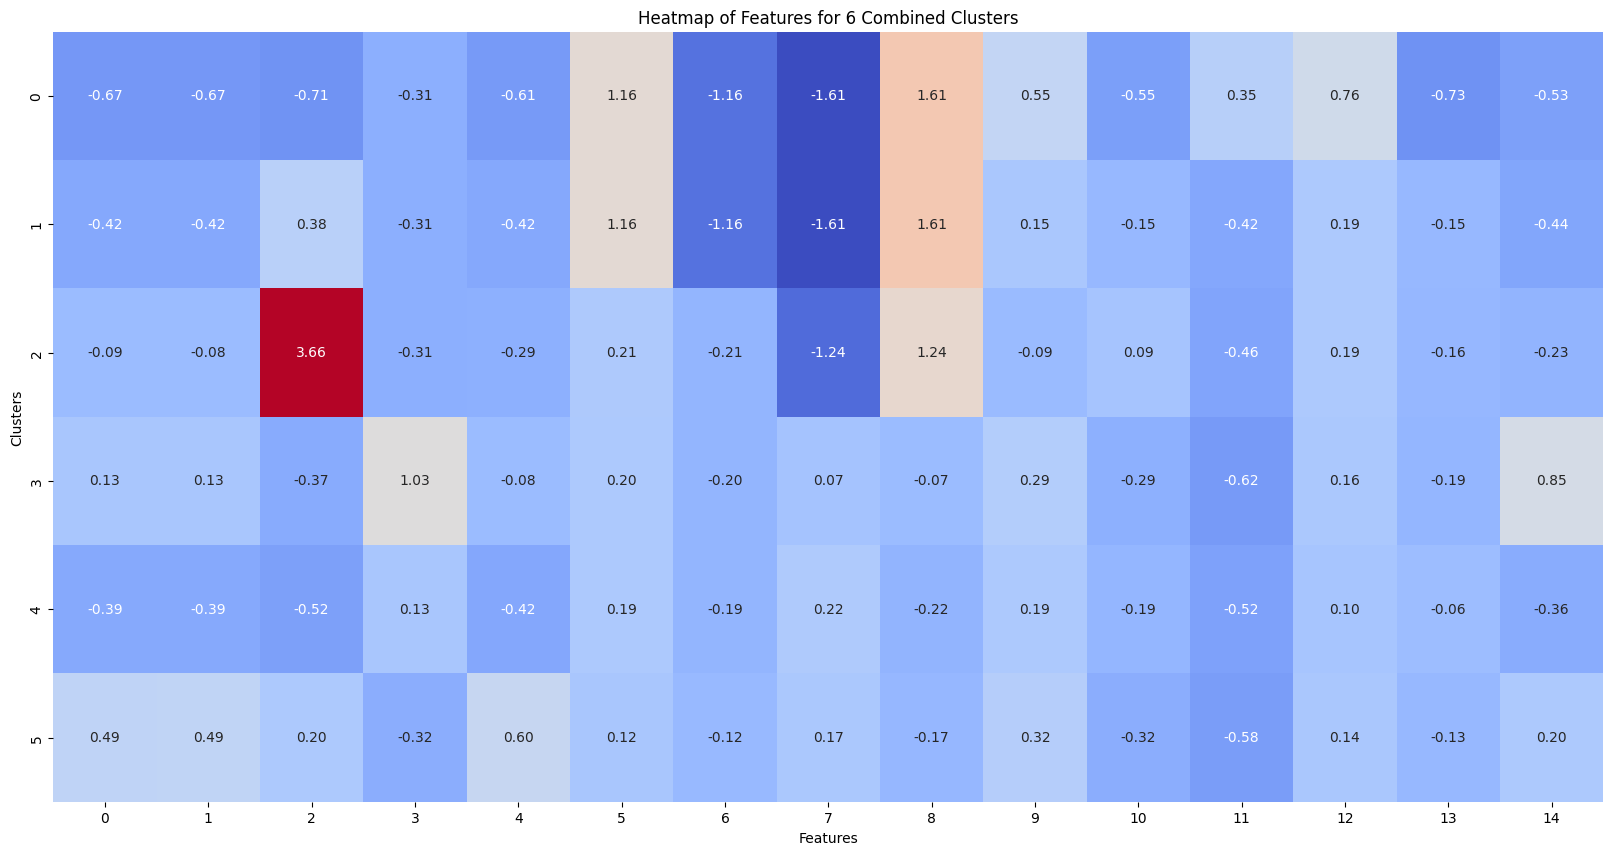

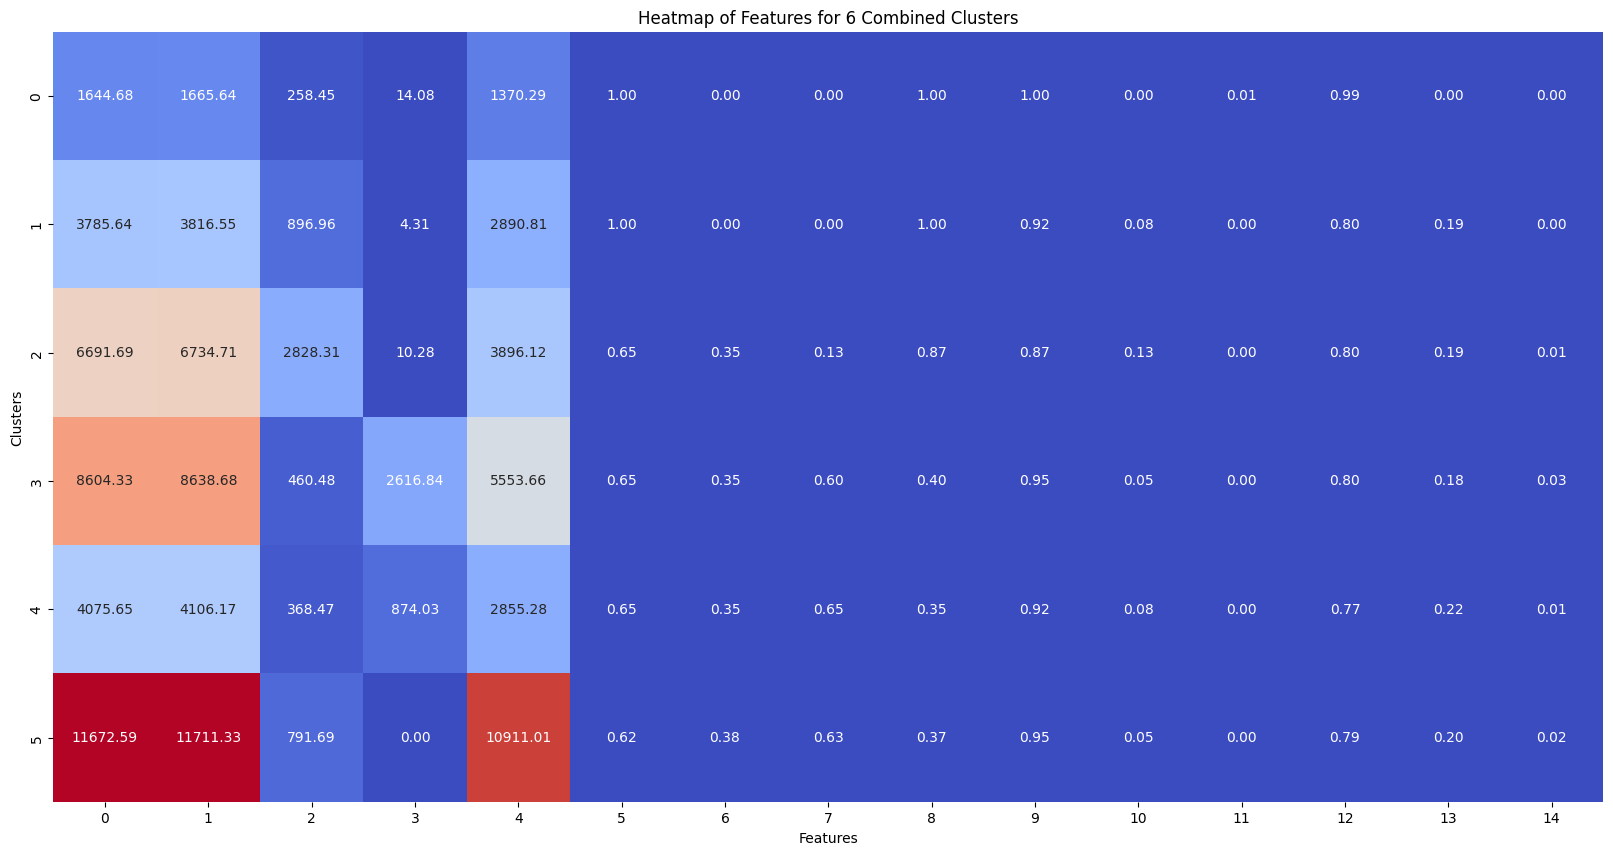

Merging Clusters: [12, 3, 16, 18, 5, 19] and 1


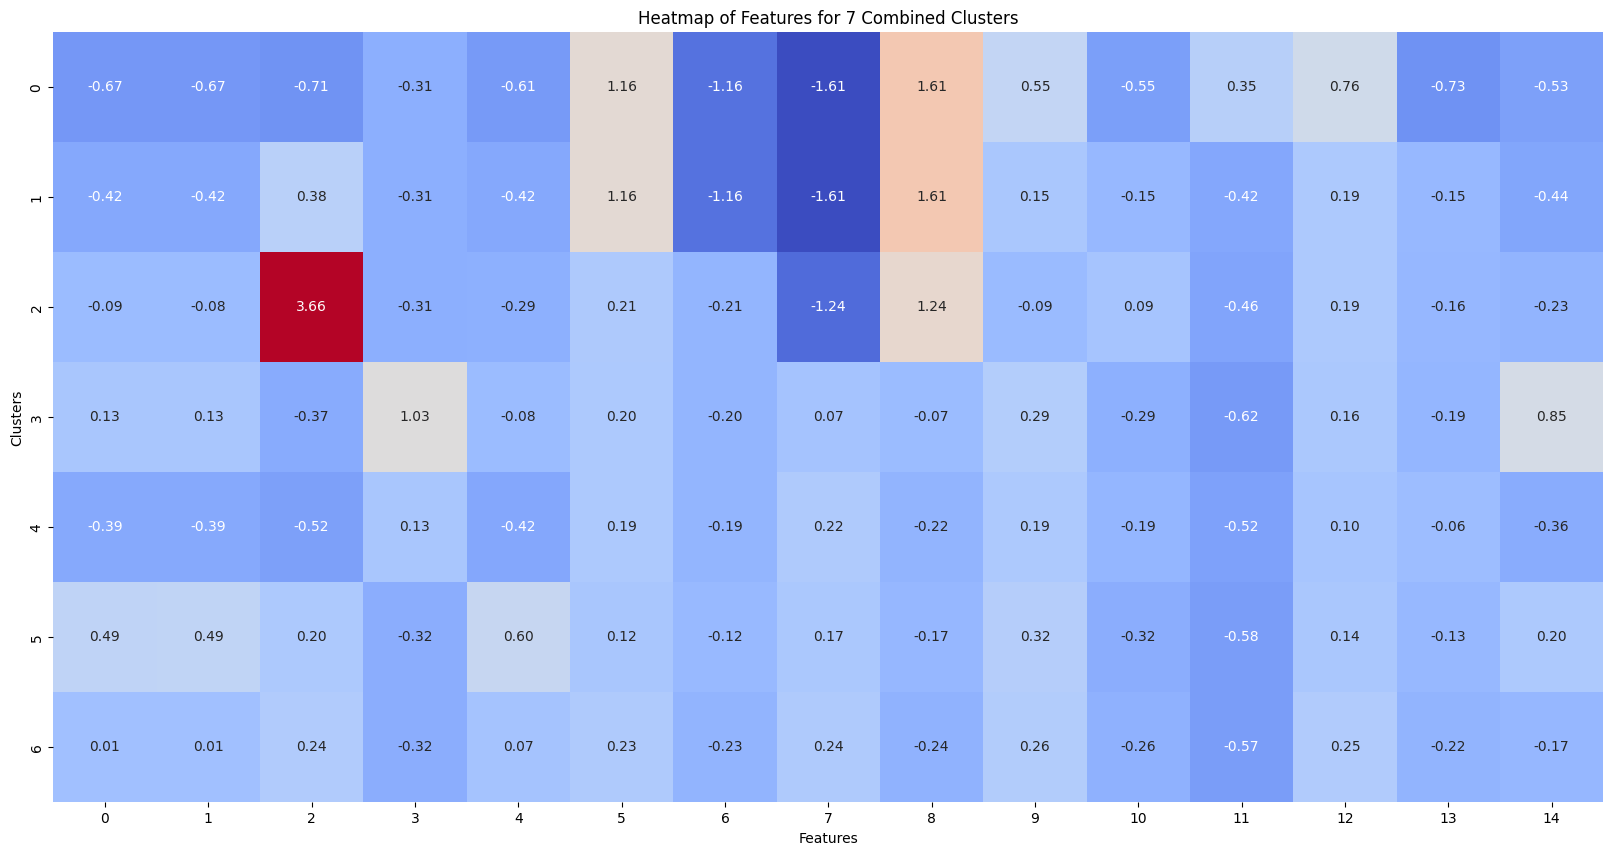

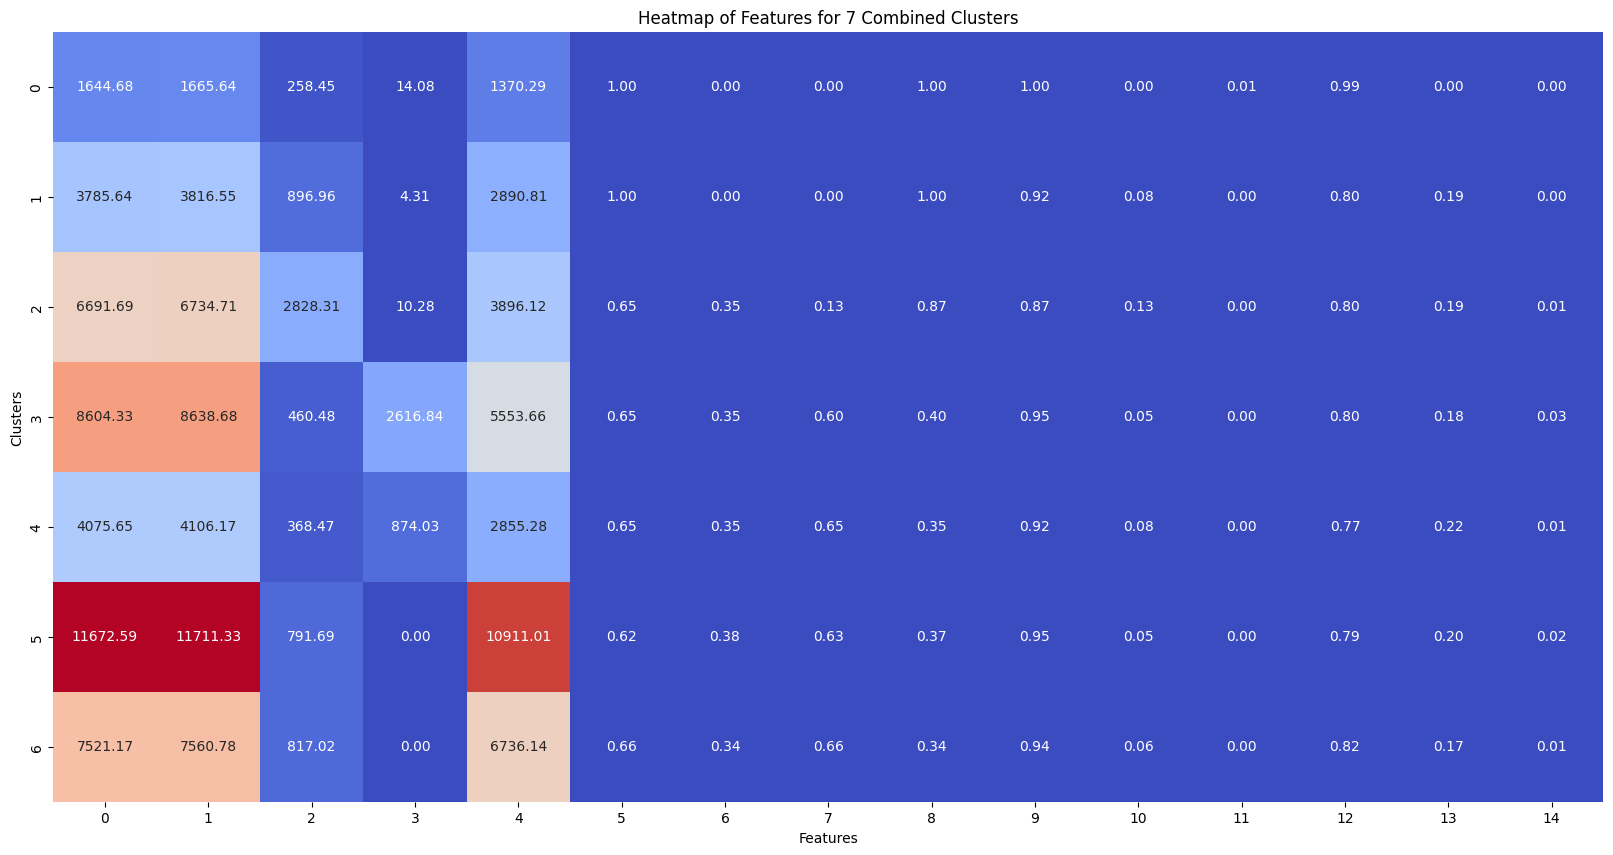

Merging Clusters: [12, 3, 16, 18, 5, 19, 1] and 4


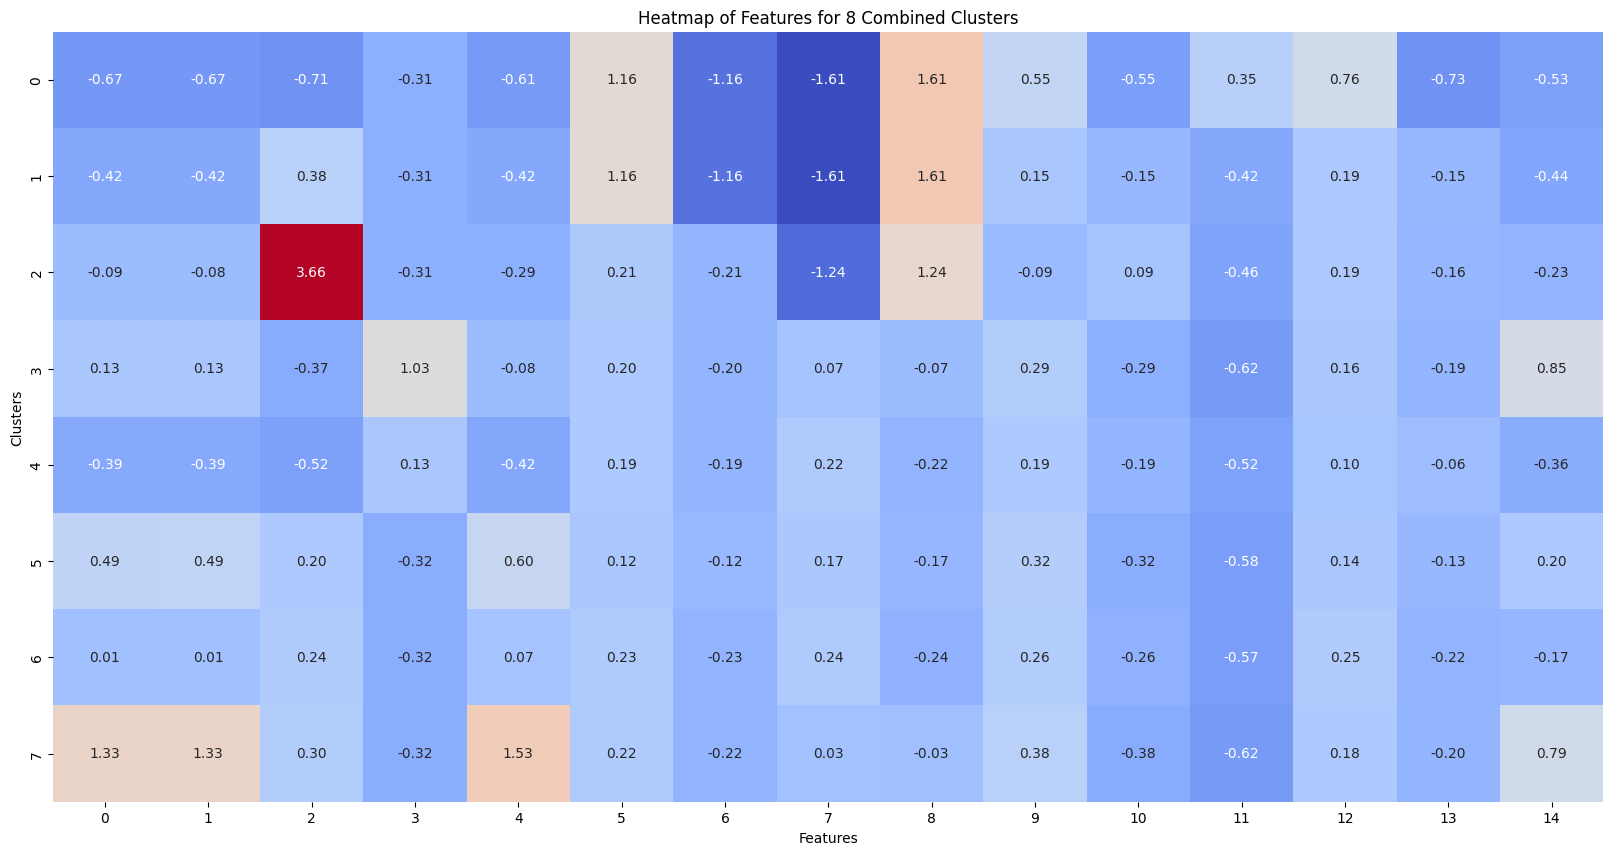

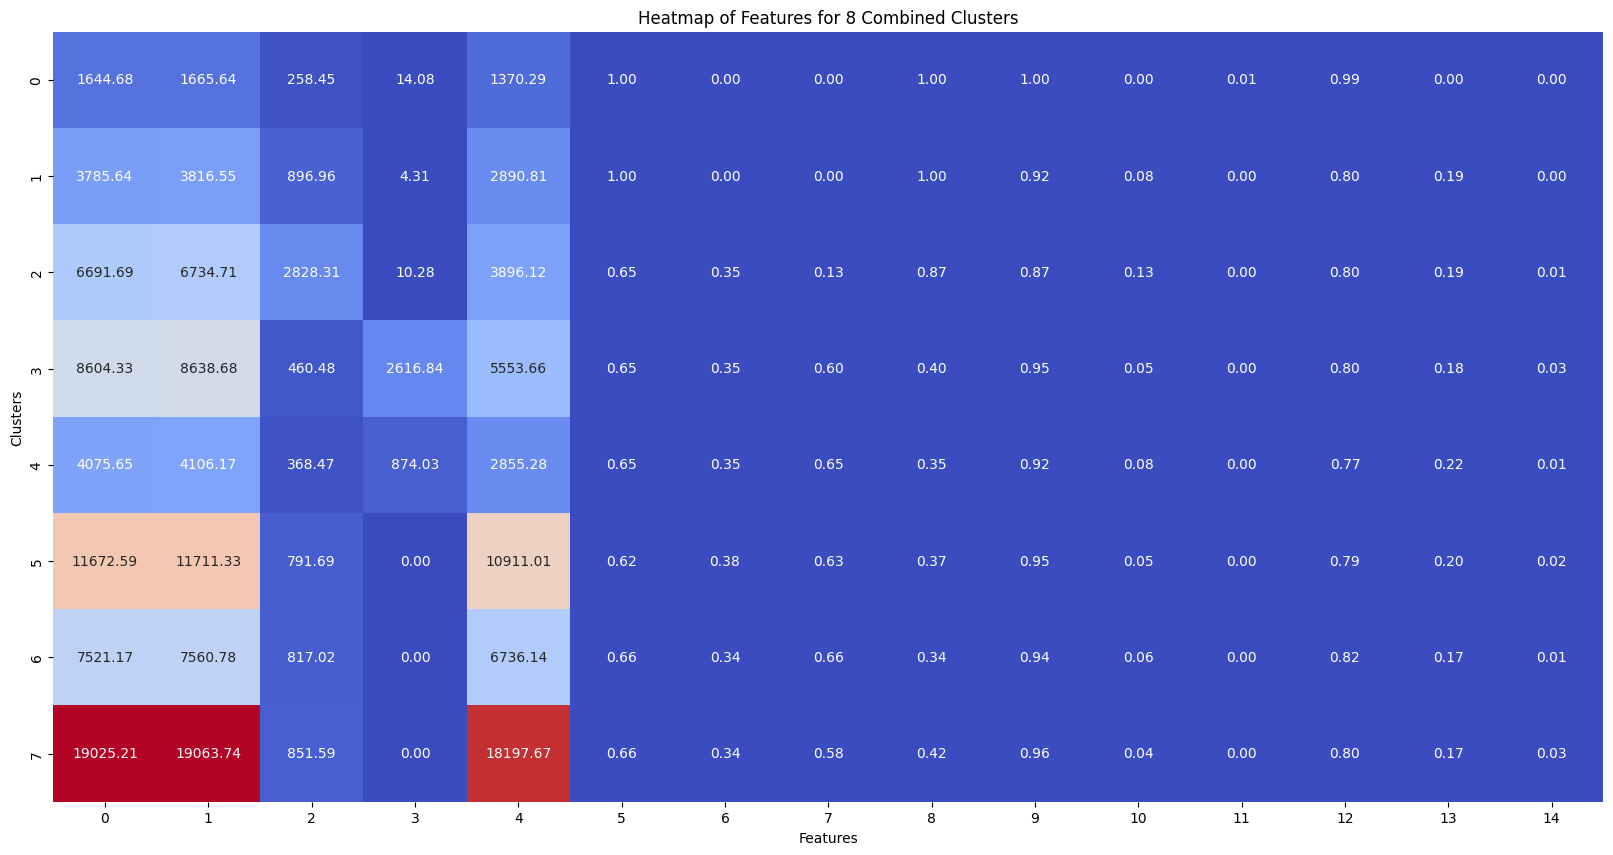

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4] and 11


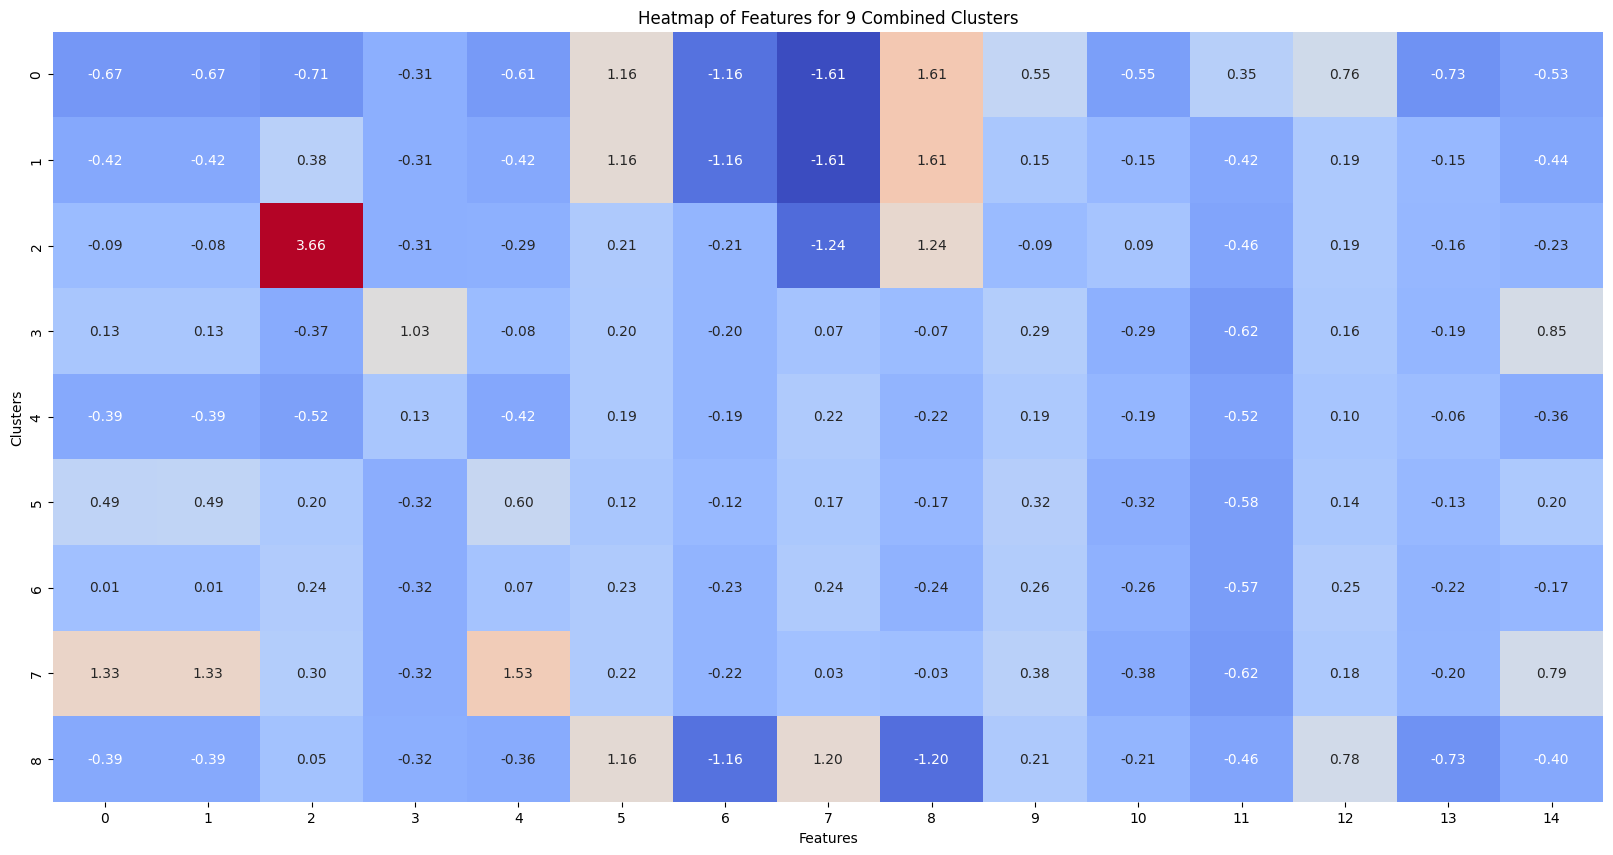

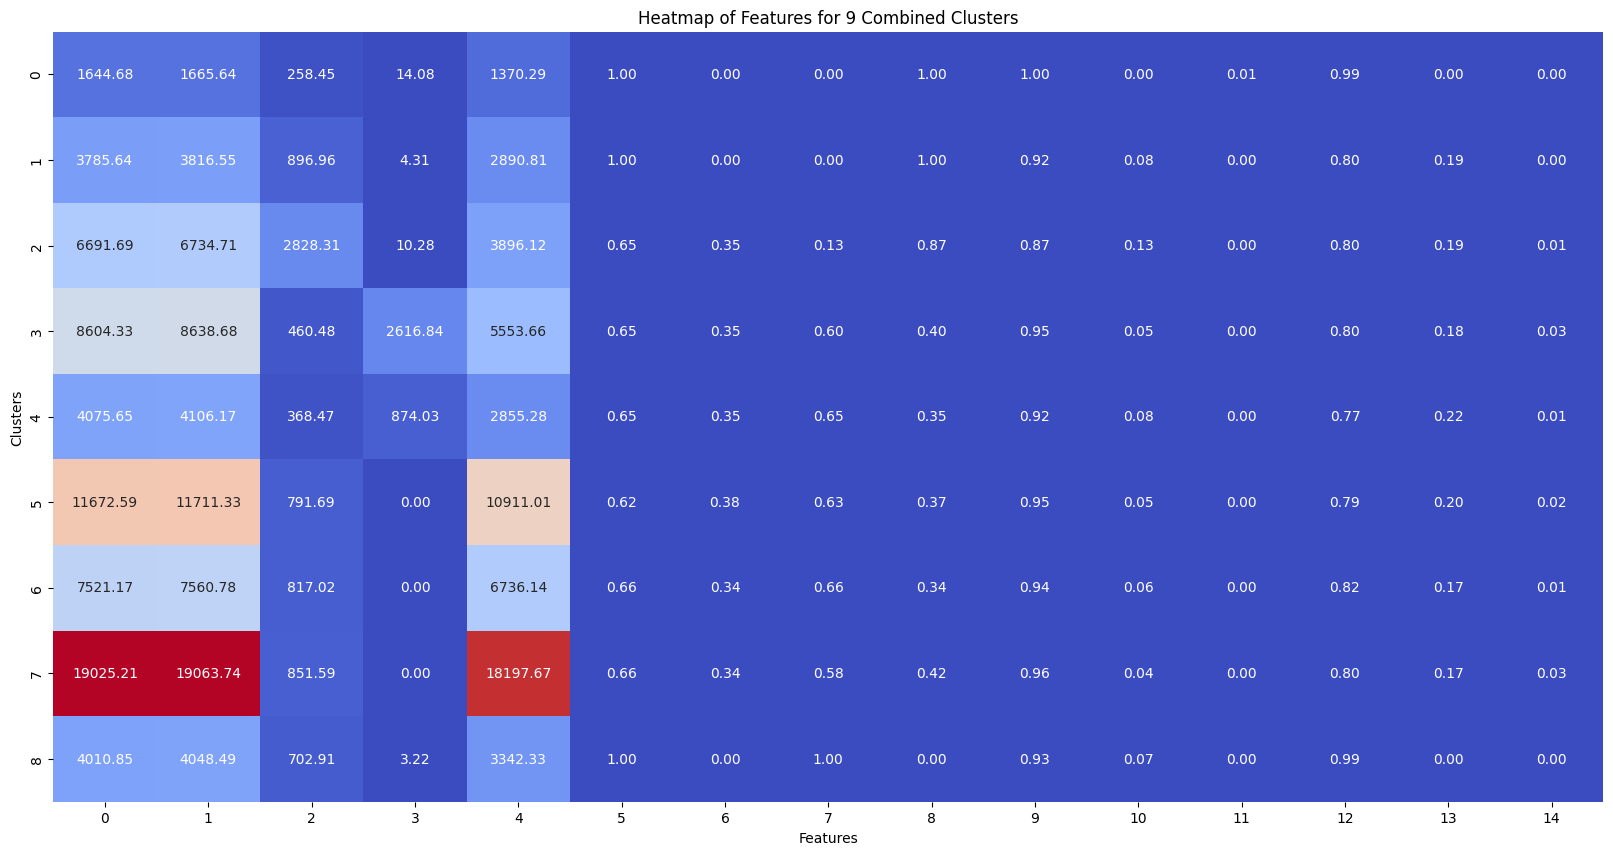

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11] and 0


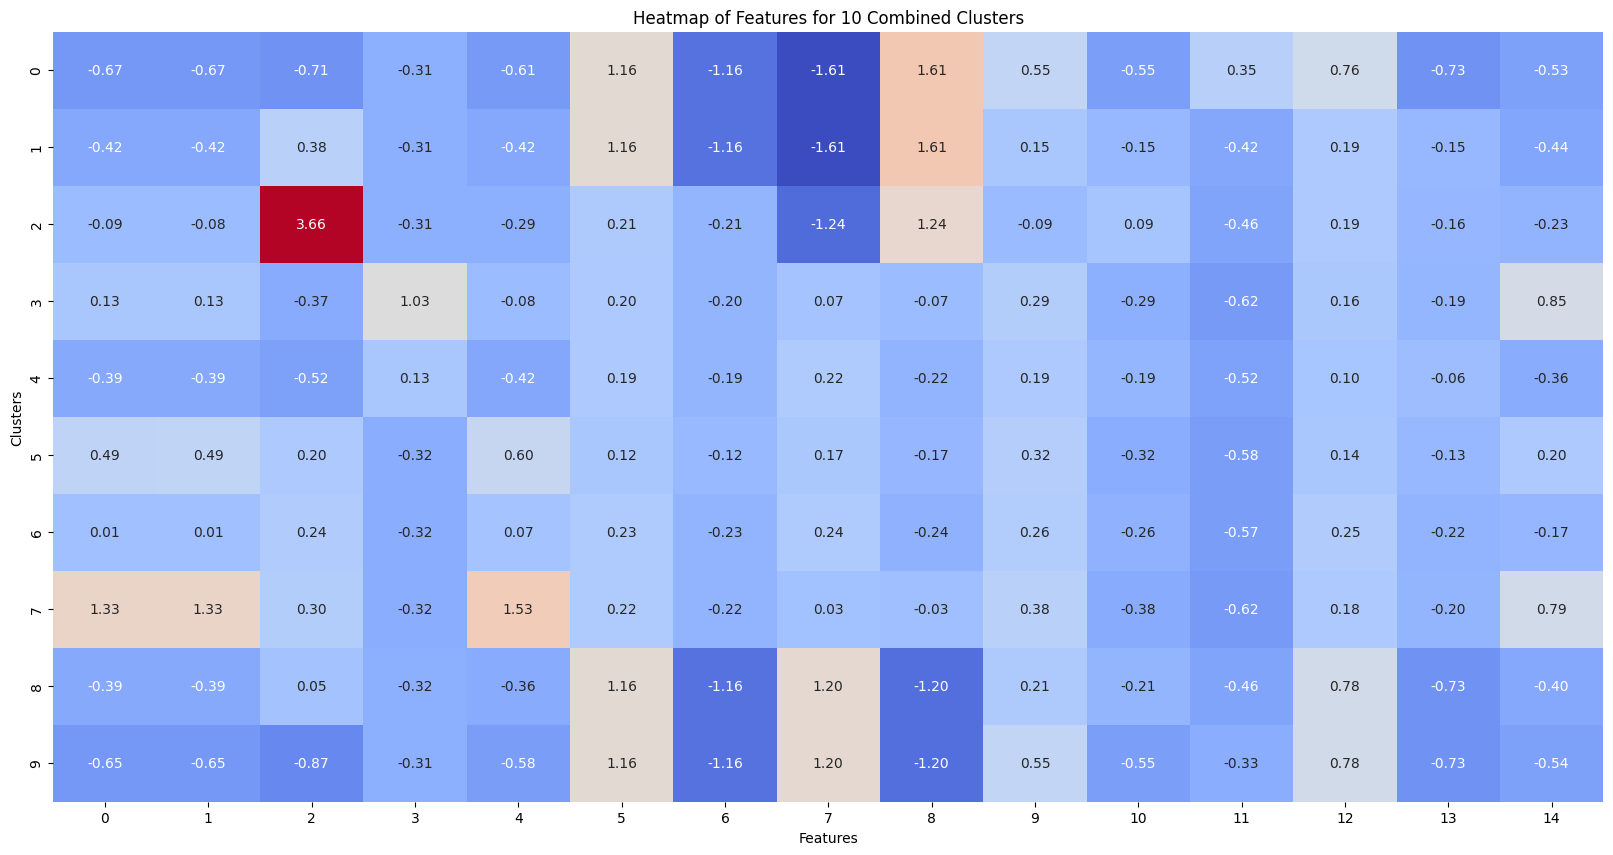

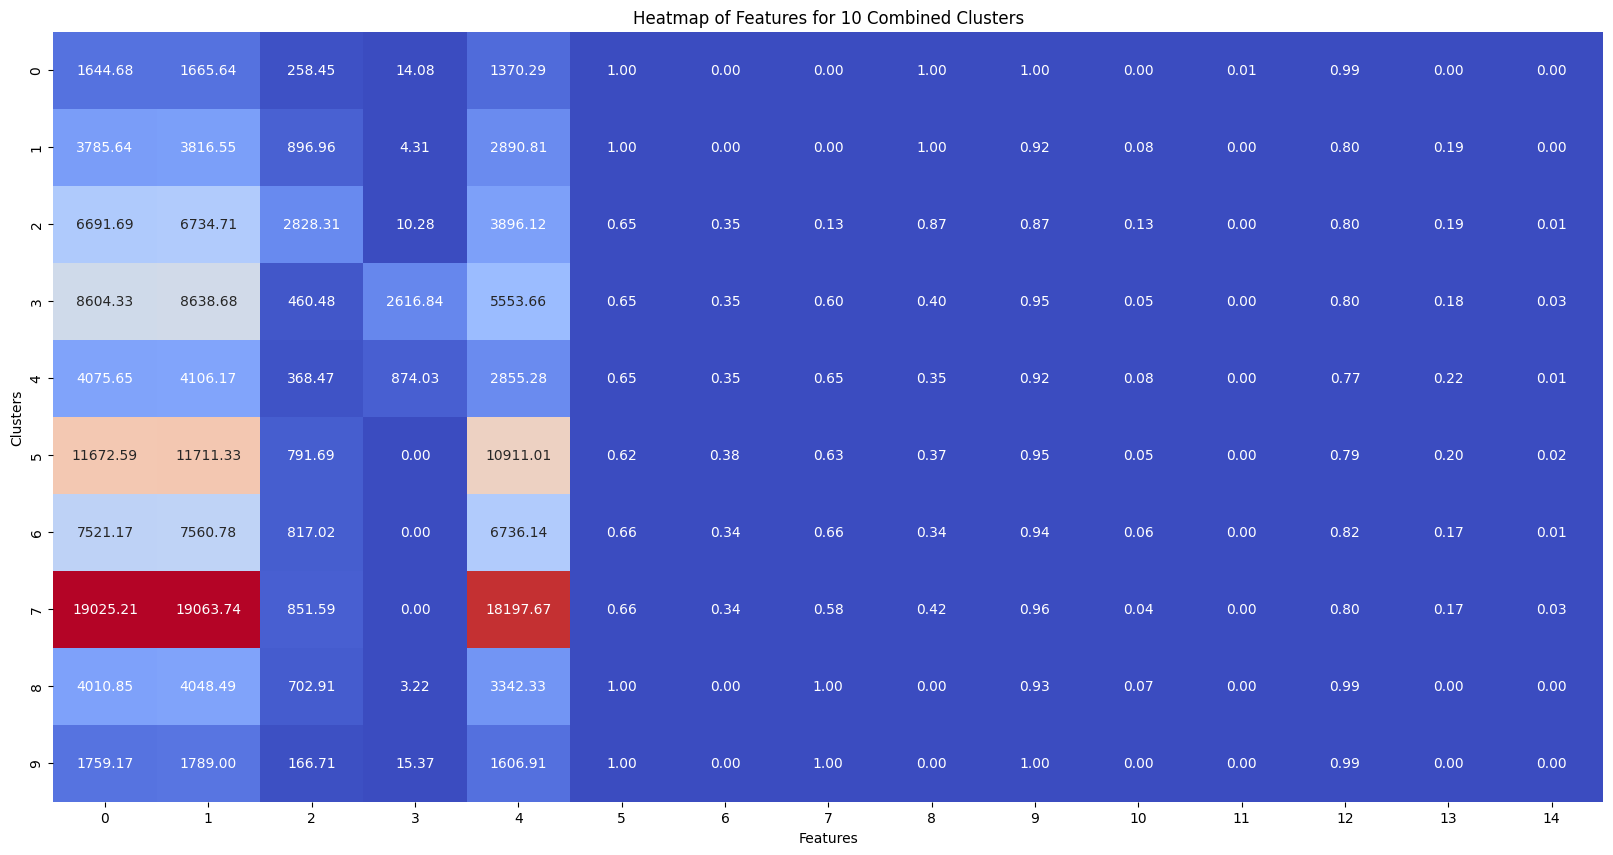

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0] and 10


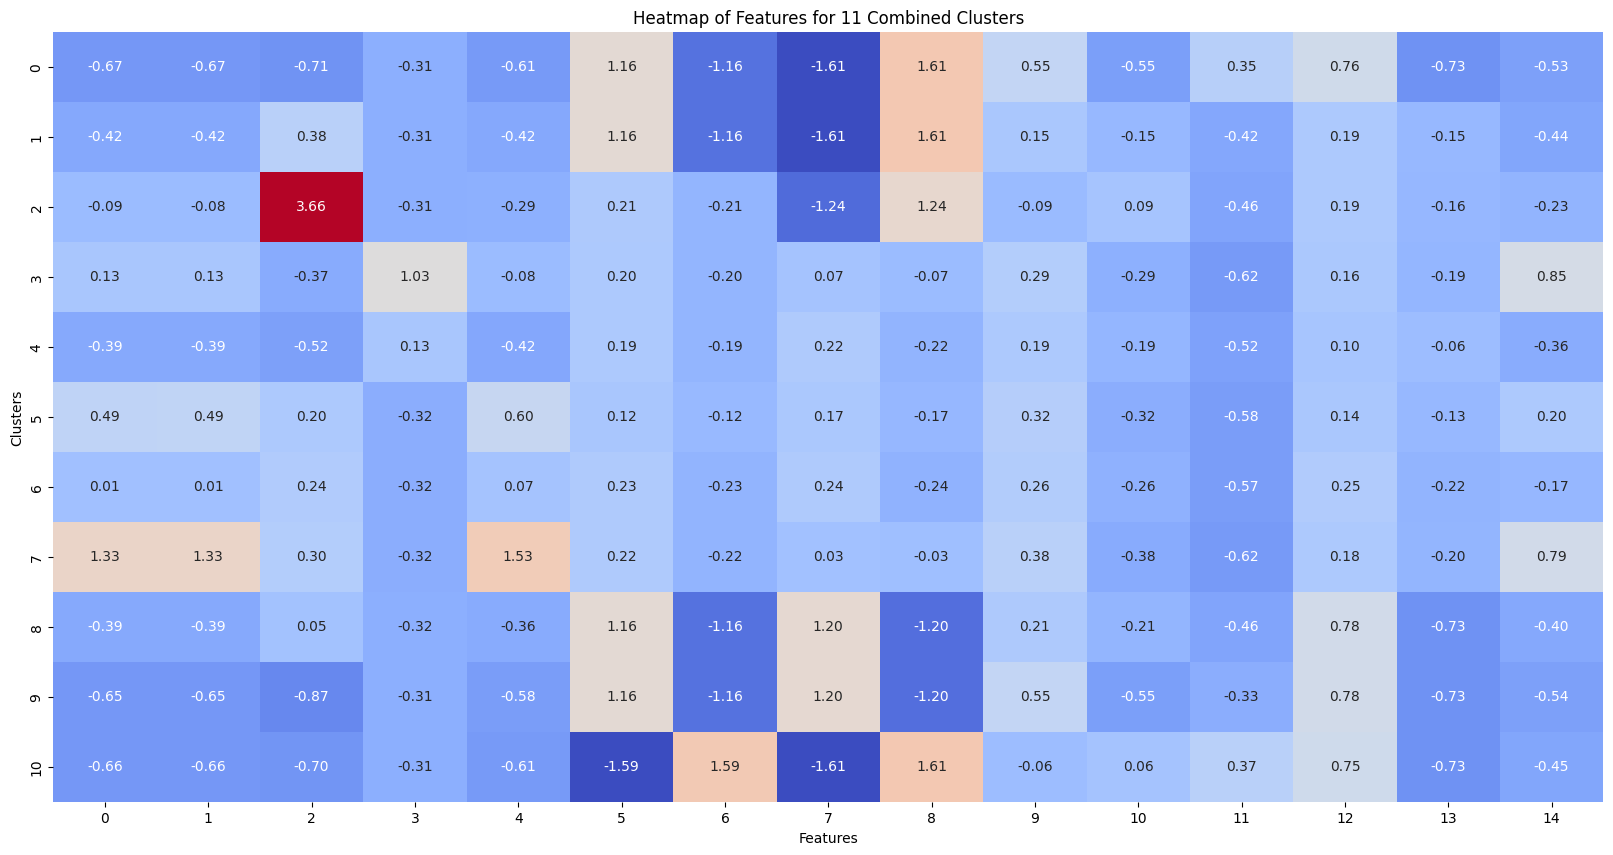

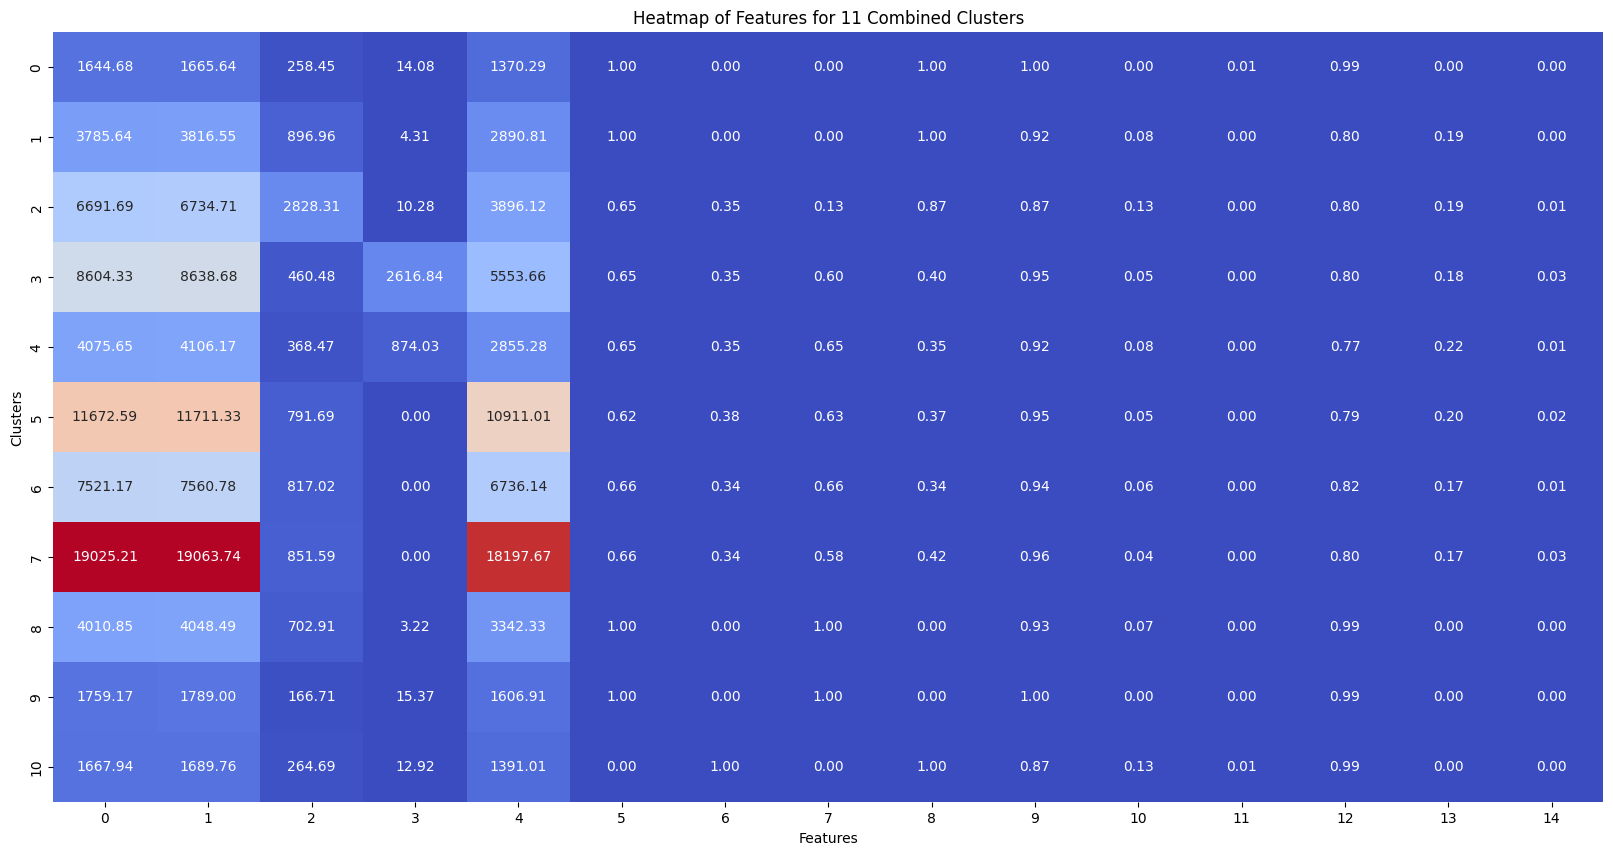

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10] and 2


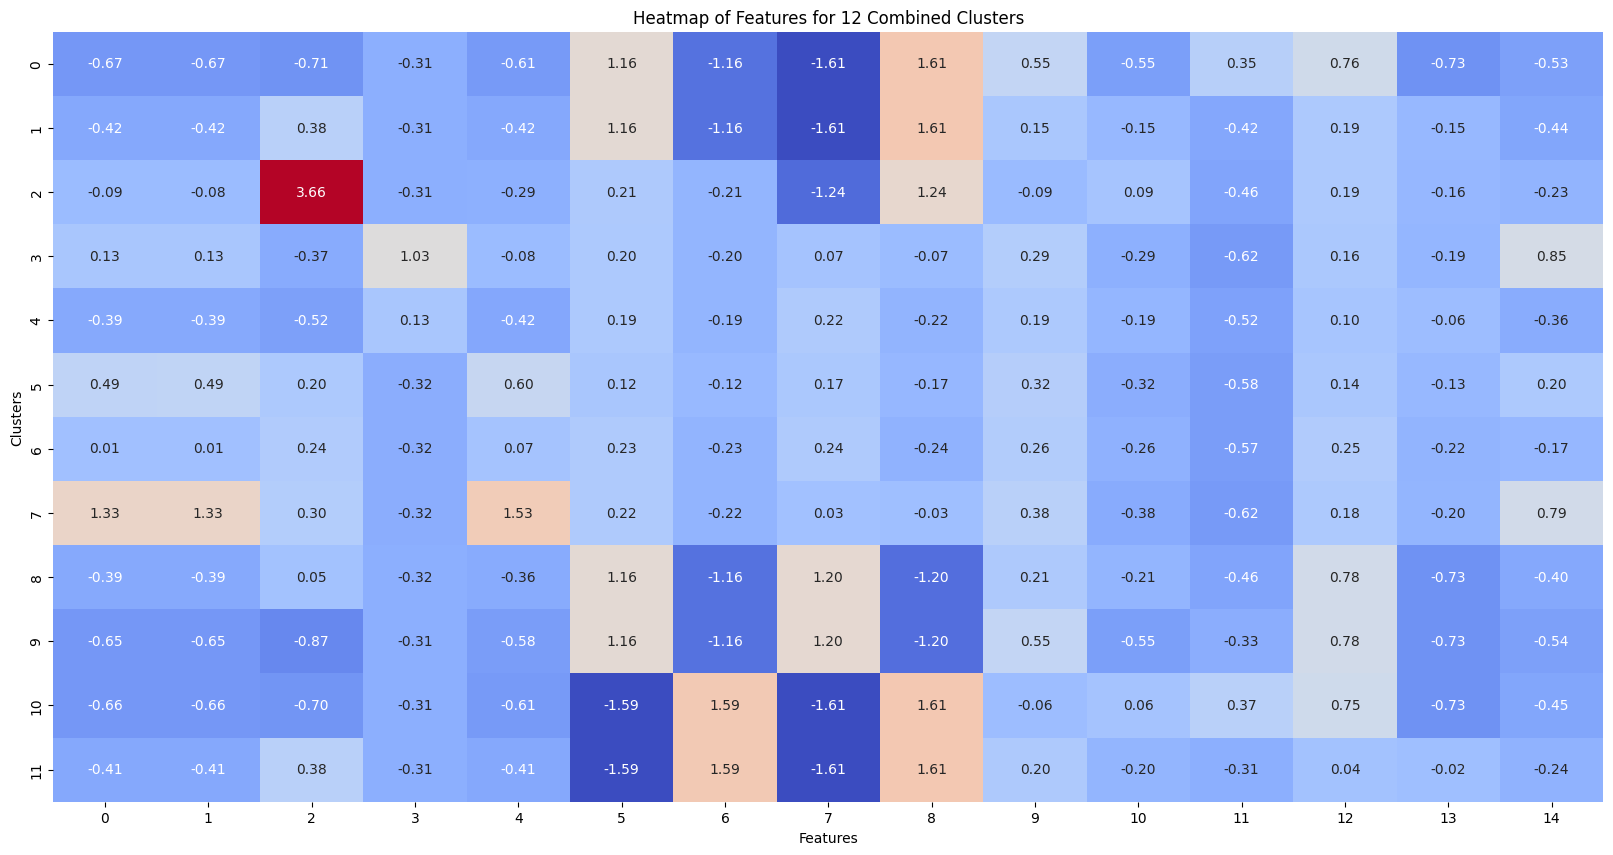

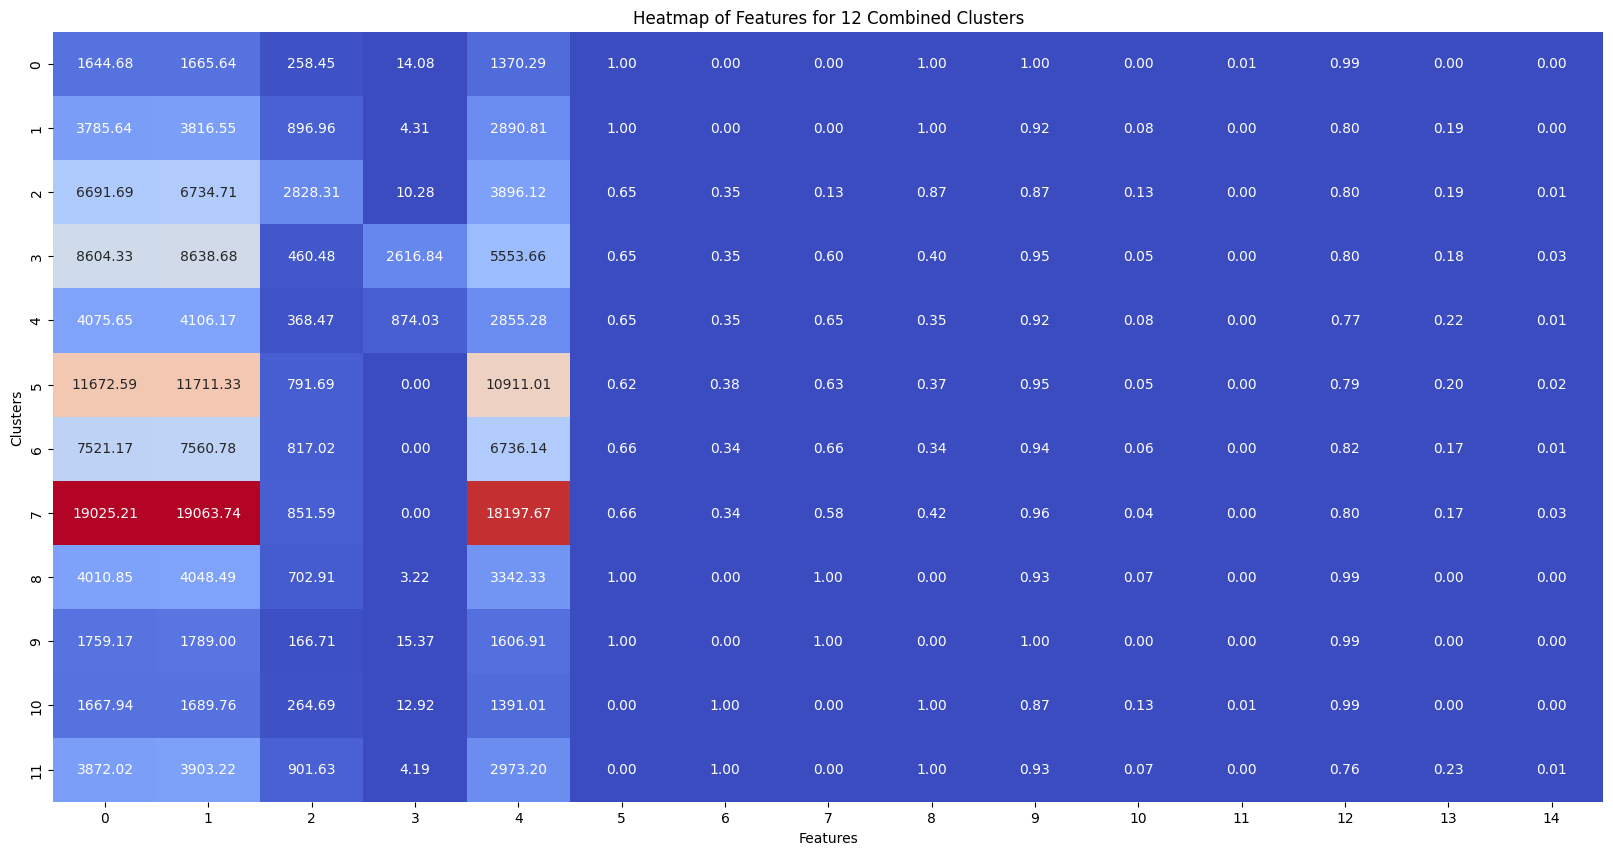

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2] and 15


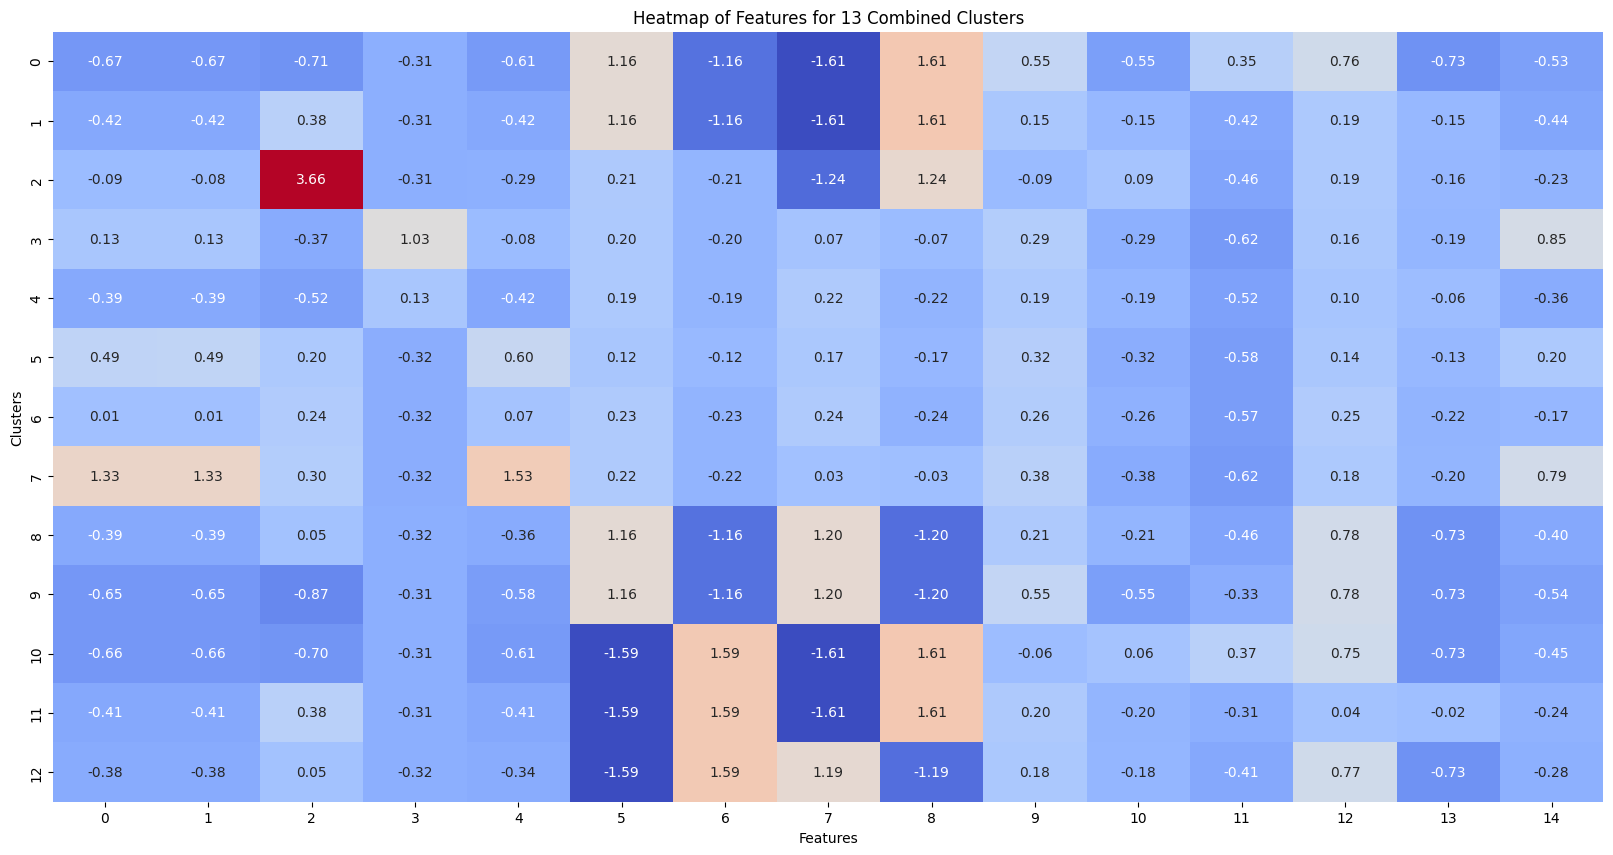

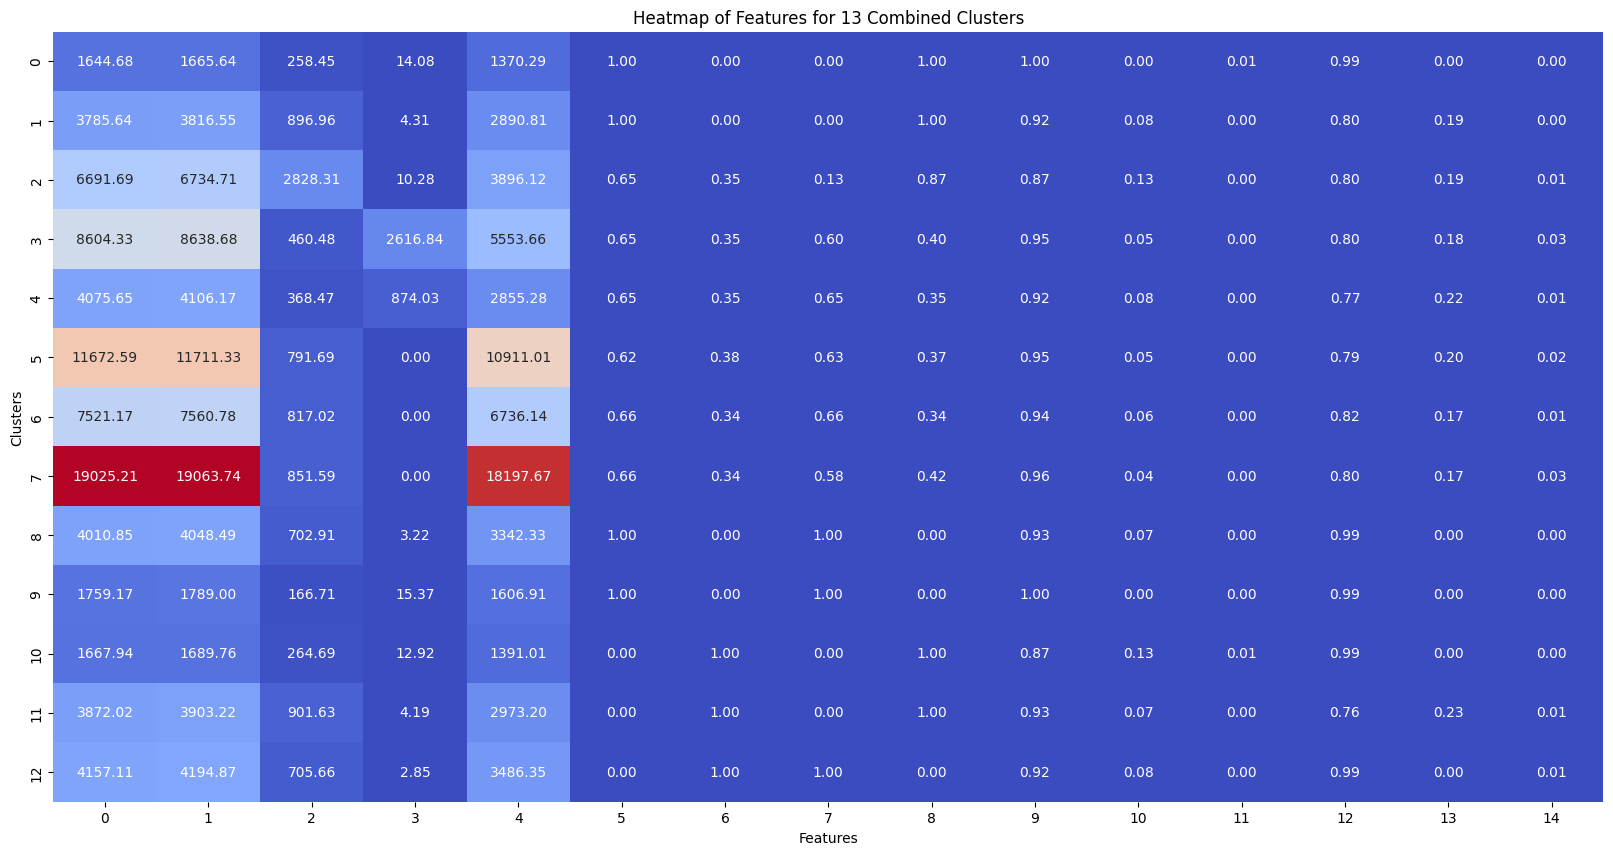

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2, 15] and 7


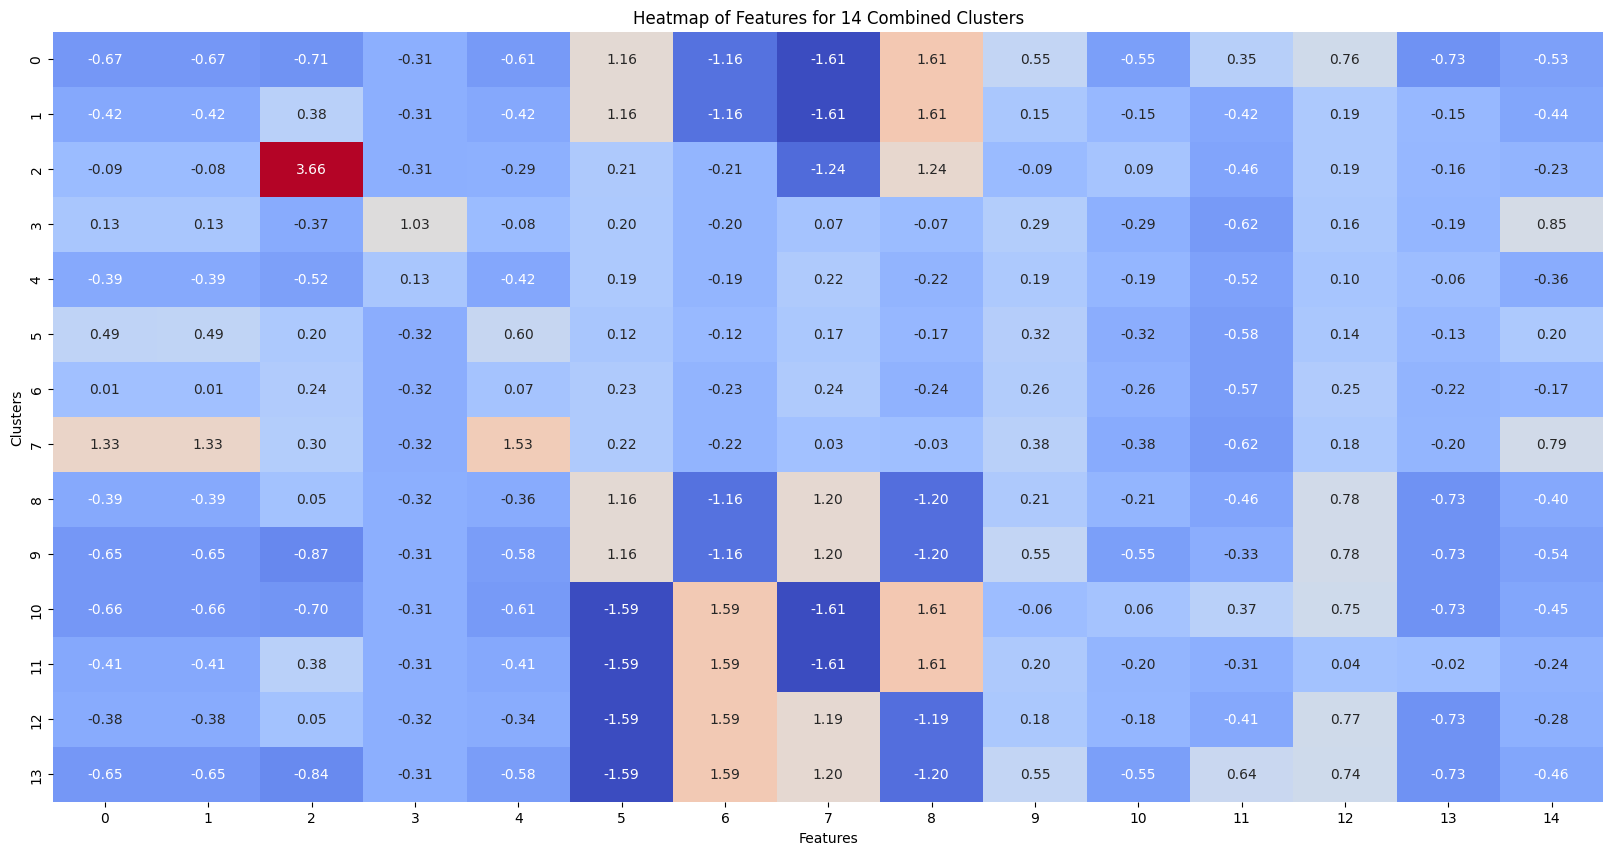

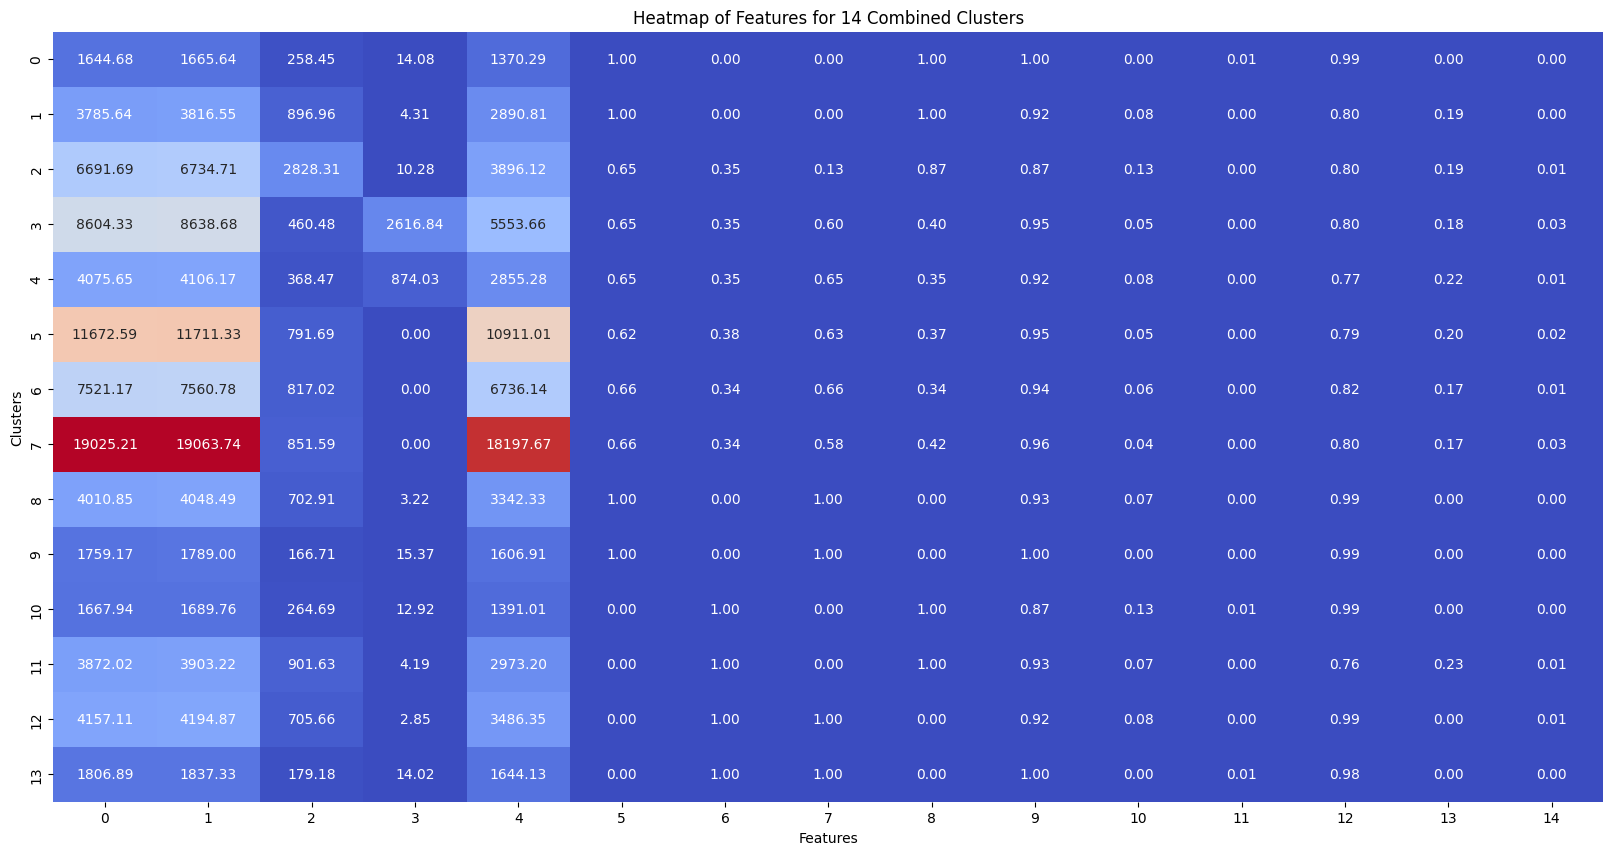

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2, 15, 7] and 17


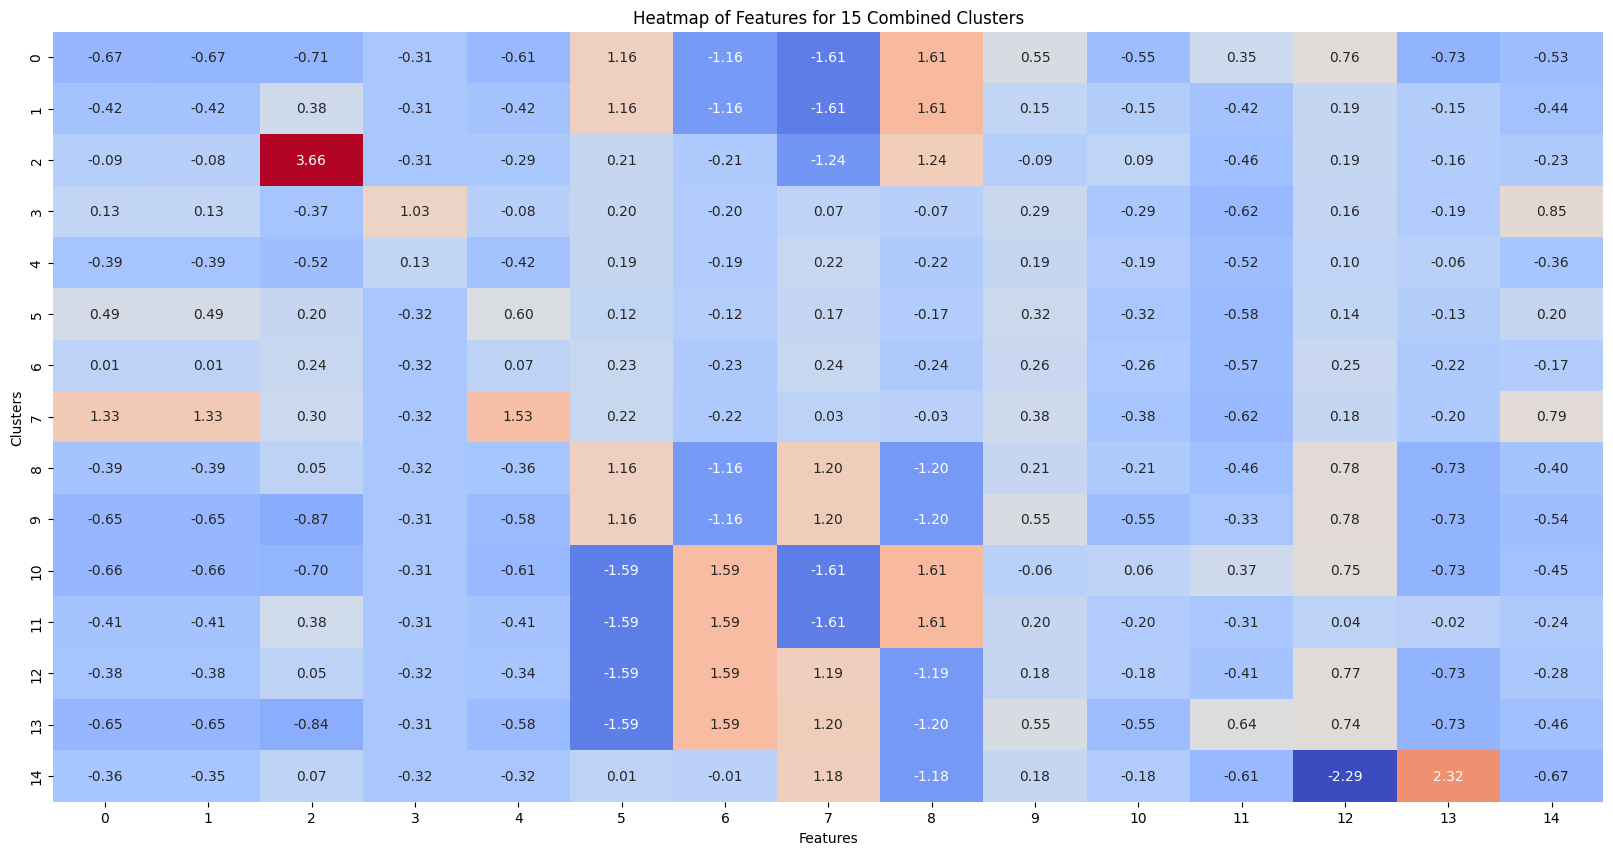

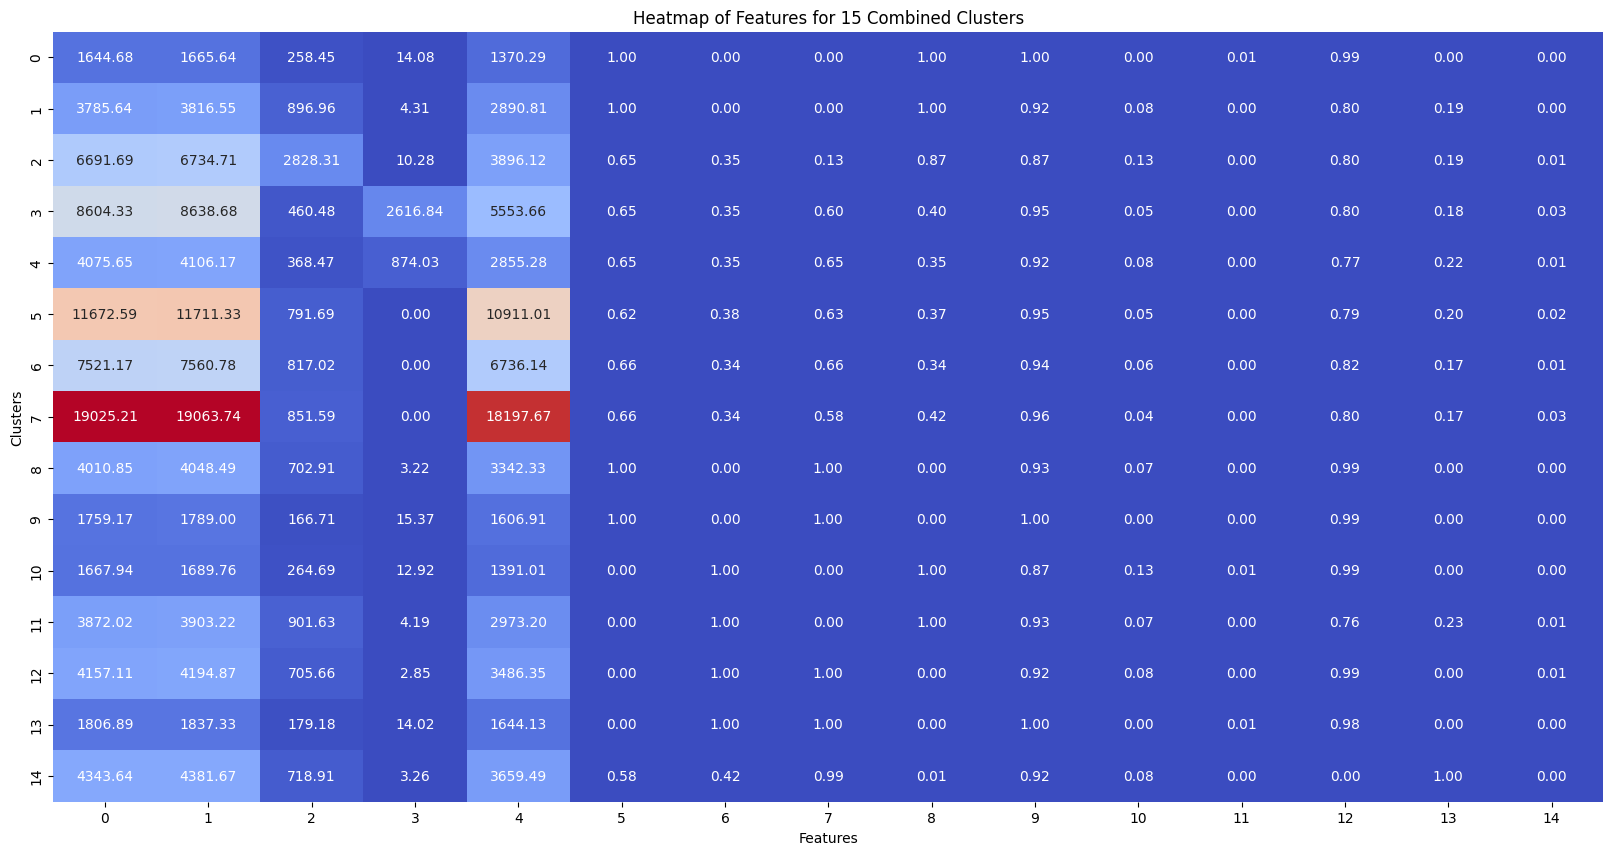

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2, 15, 7, 17] and 6


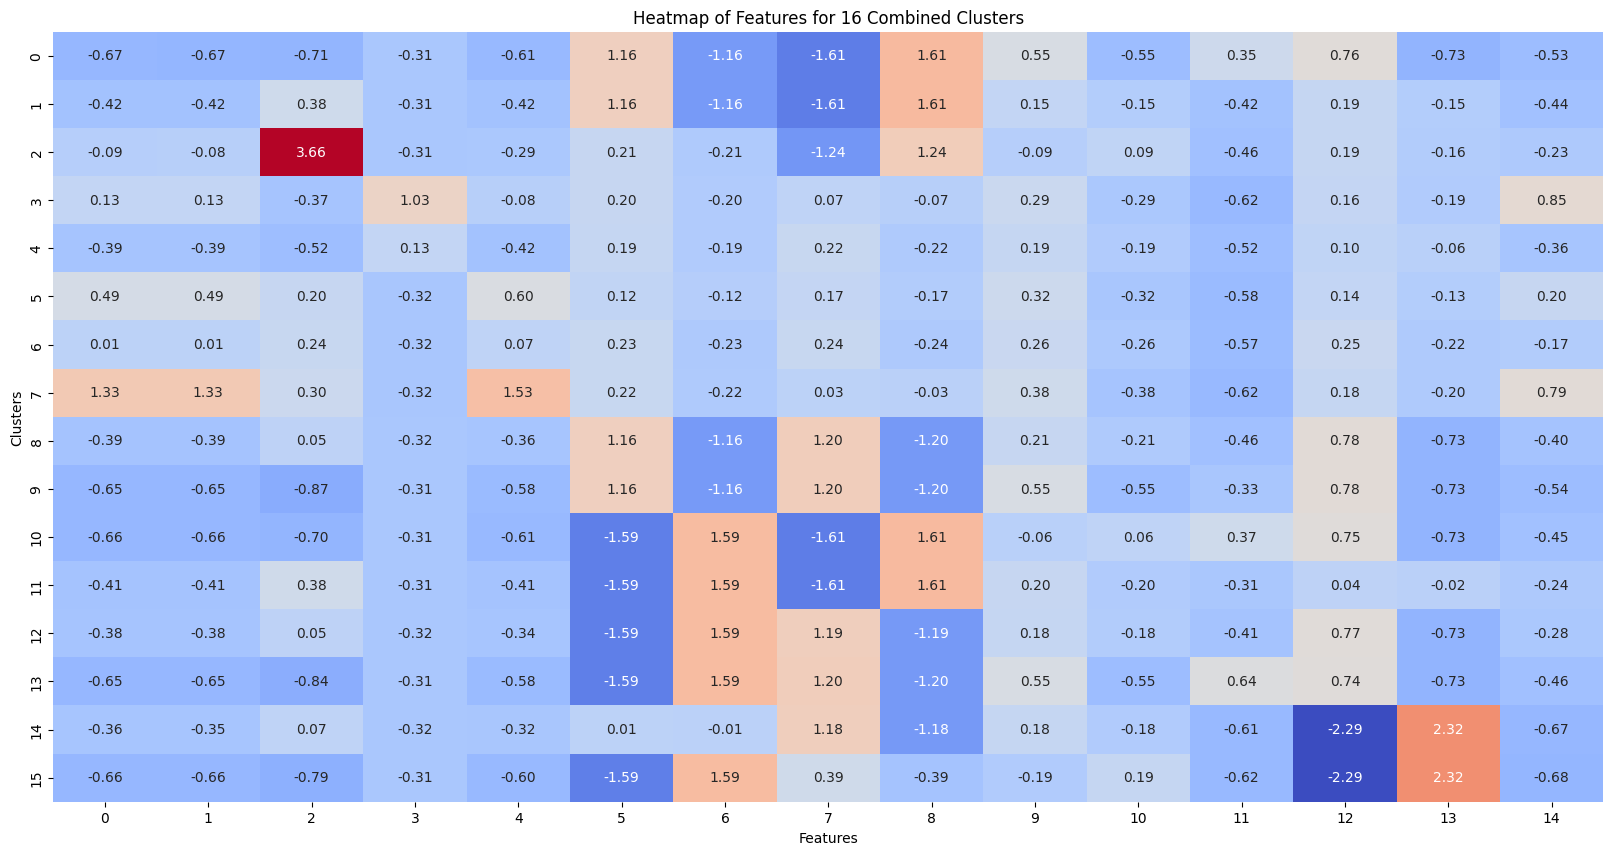

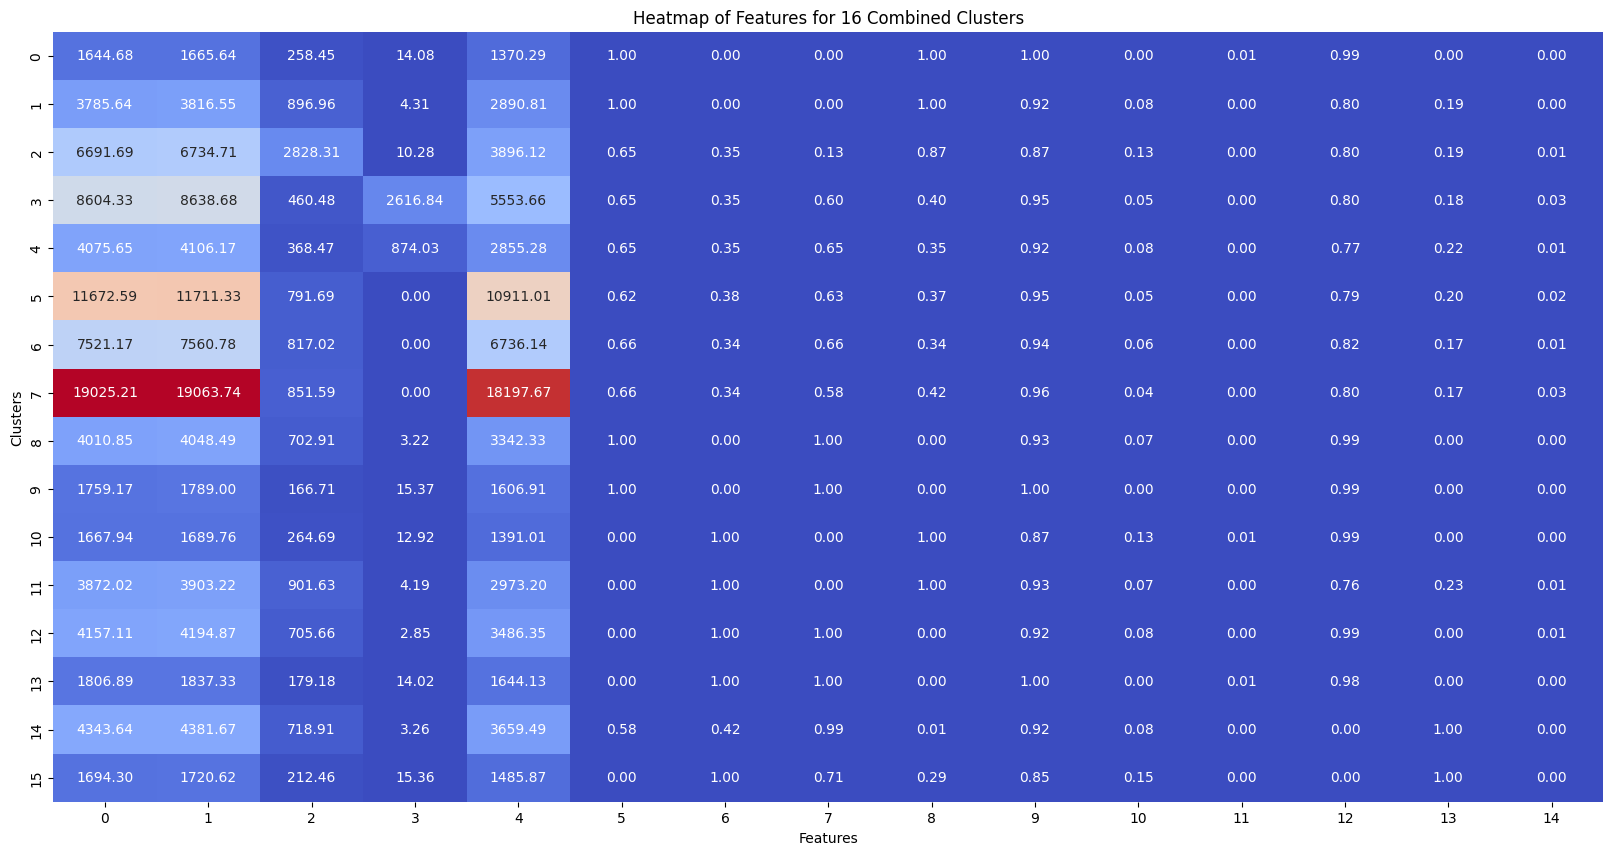

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2, 15, 7, 17, 6] and 8


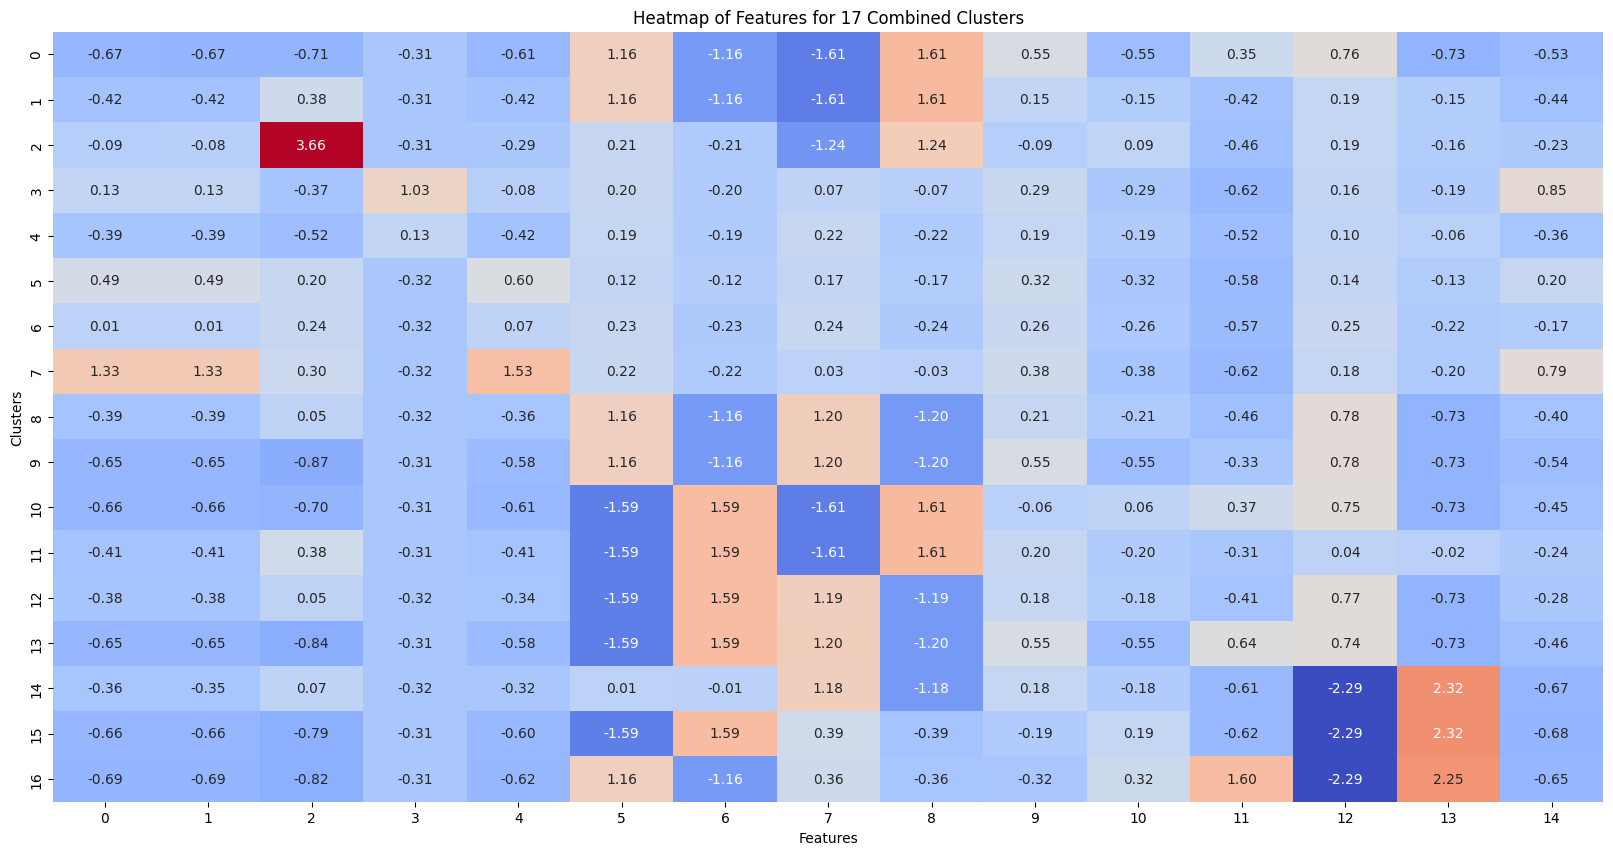

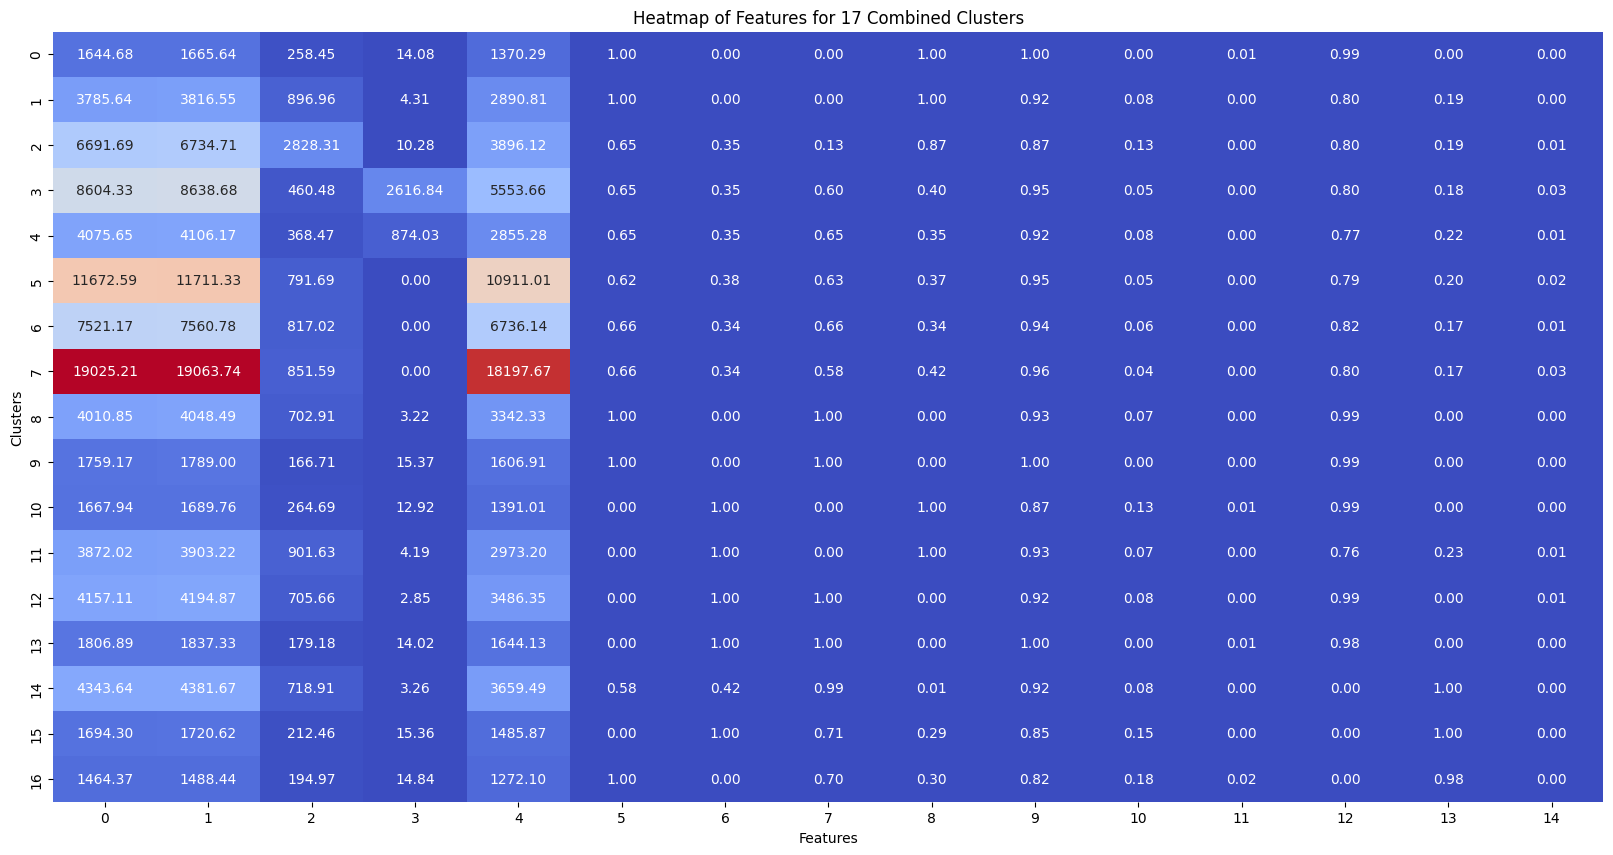

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2, 15, 7, 17, 6, 8] and 13


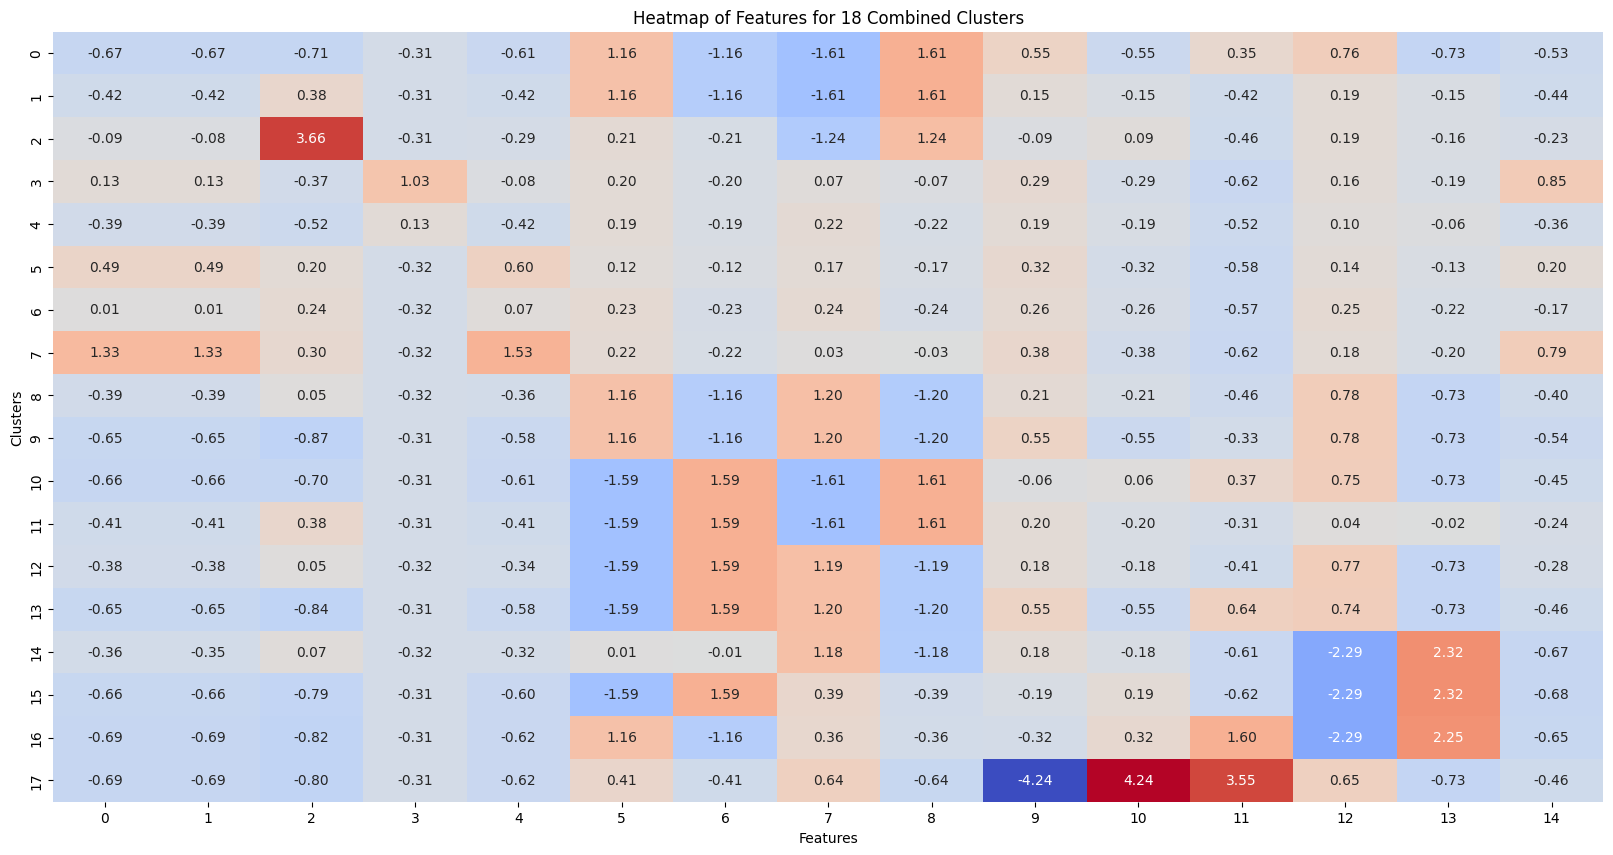

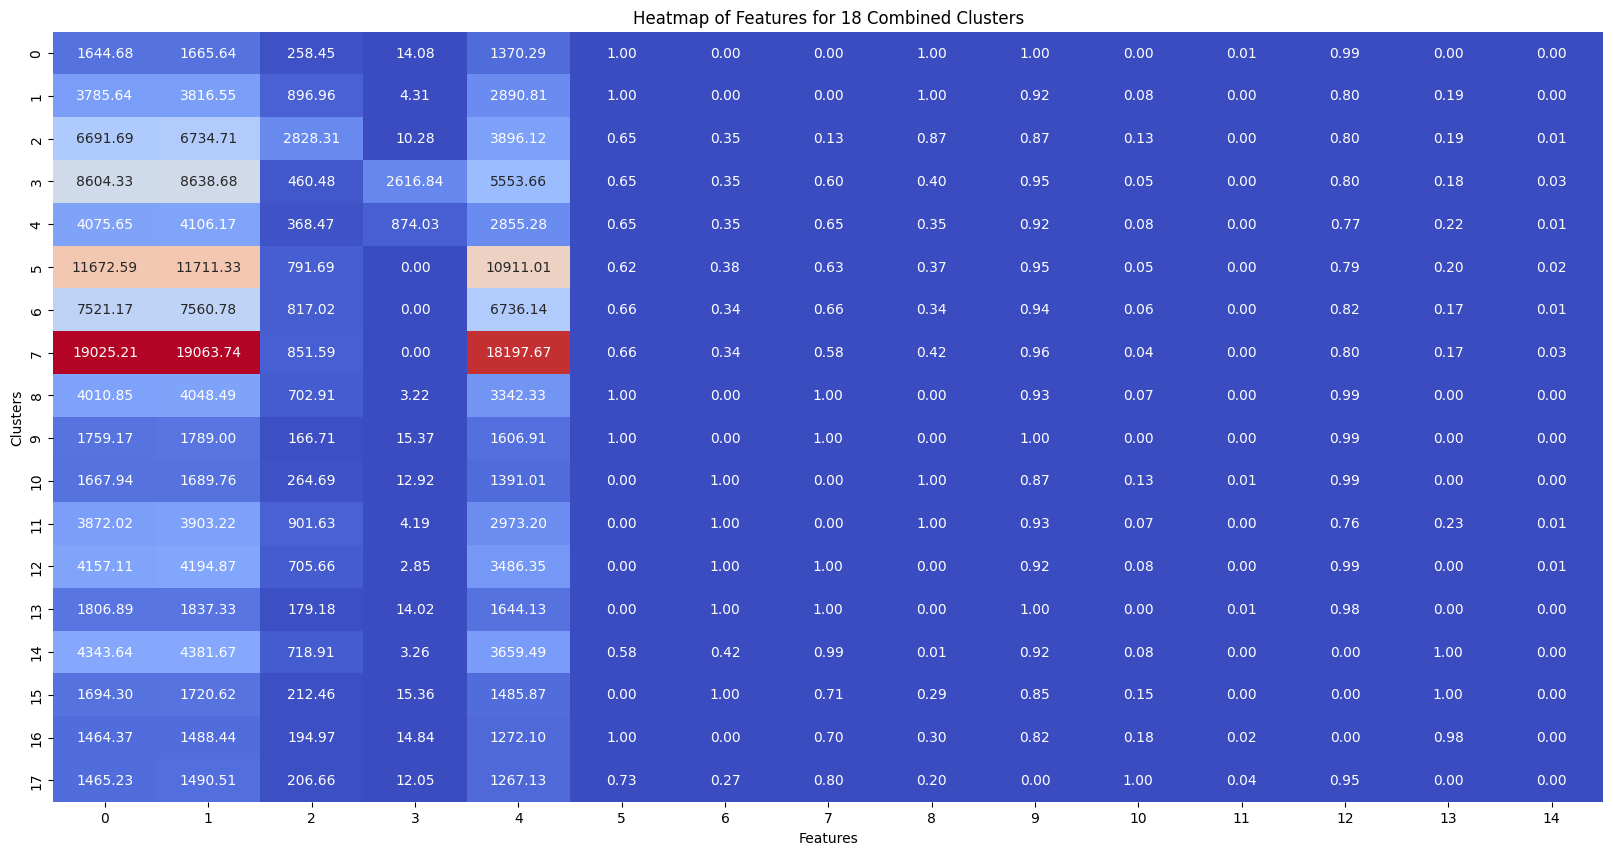

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2, 15, 7, 17, 6, 8, 13] and 14


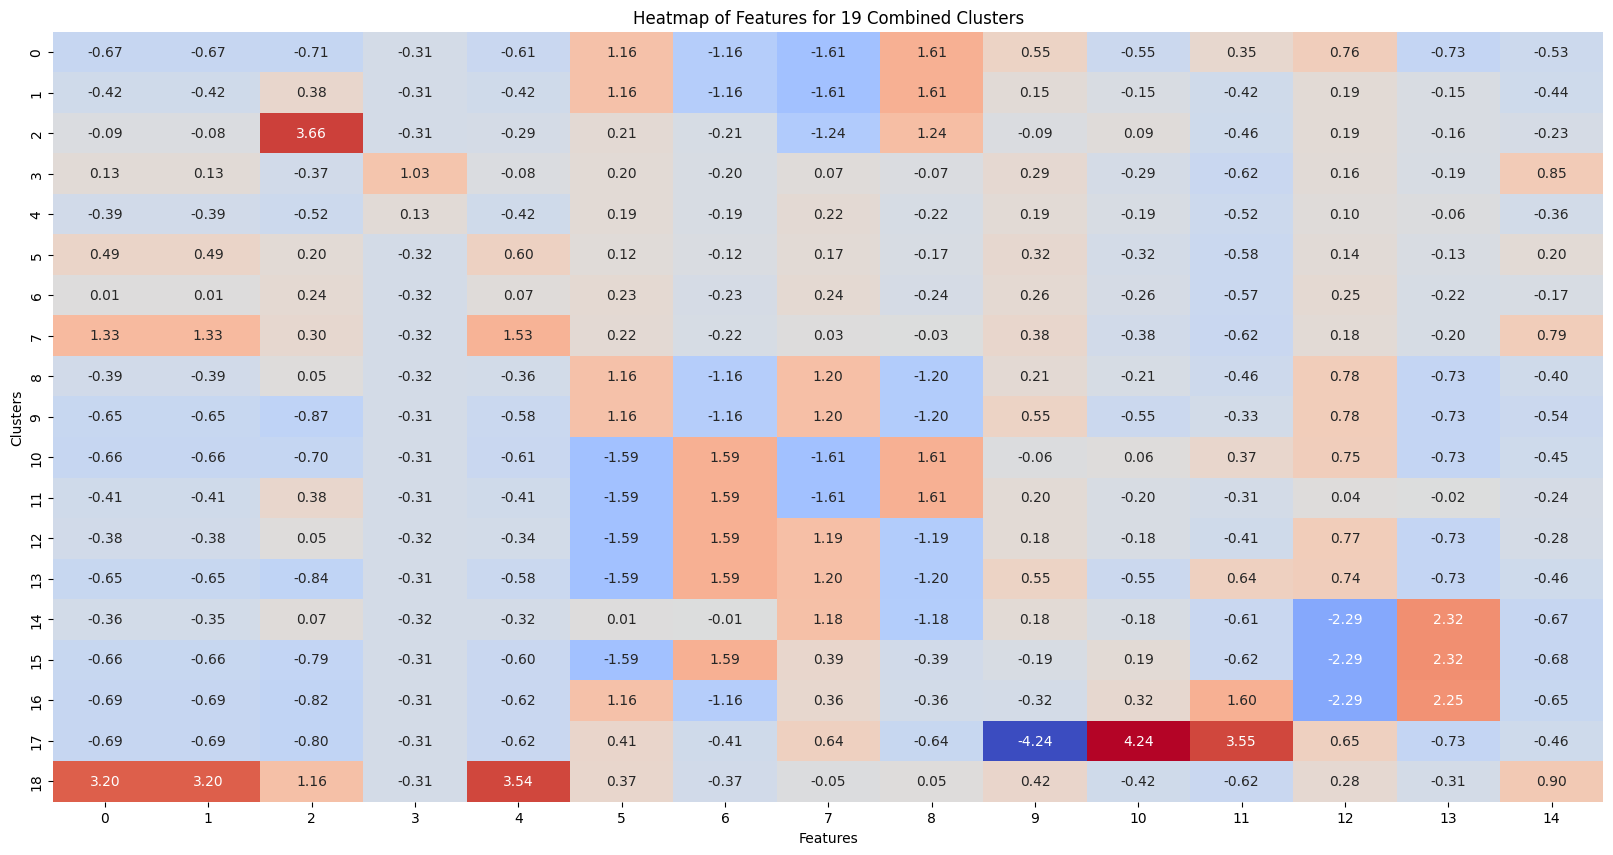

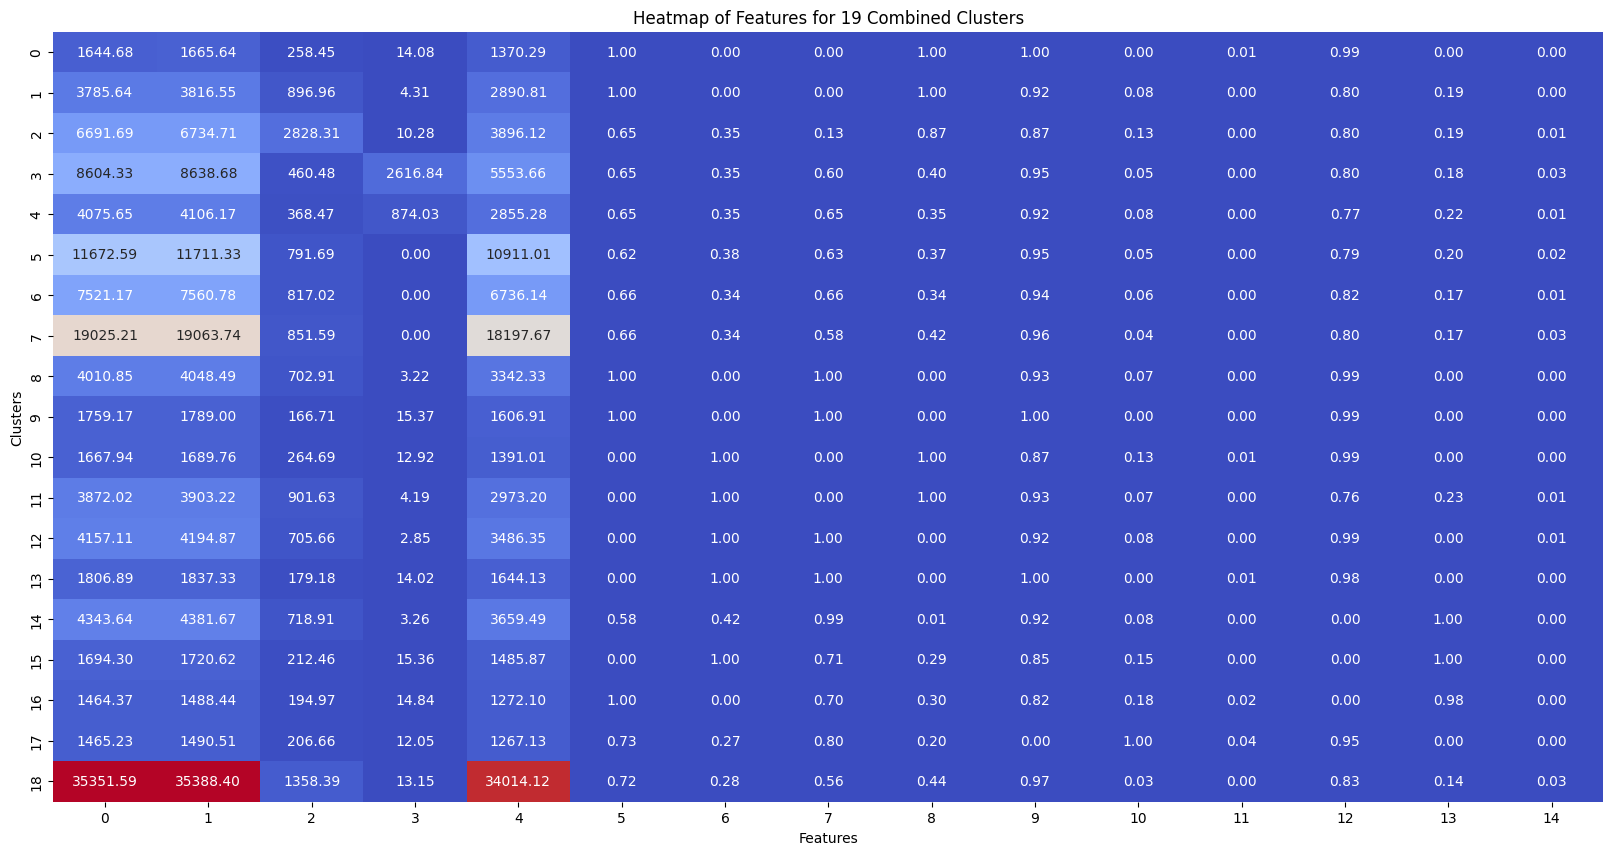

Merging Clusters: [12, 3, 16, 18, 5, 19, 1, 4, 11, 0, 10, 2, 15, 7, 17, 6, 8, 13, 14] and 9


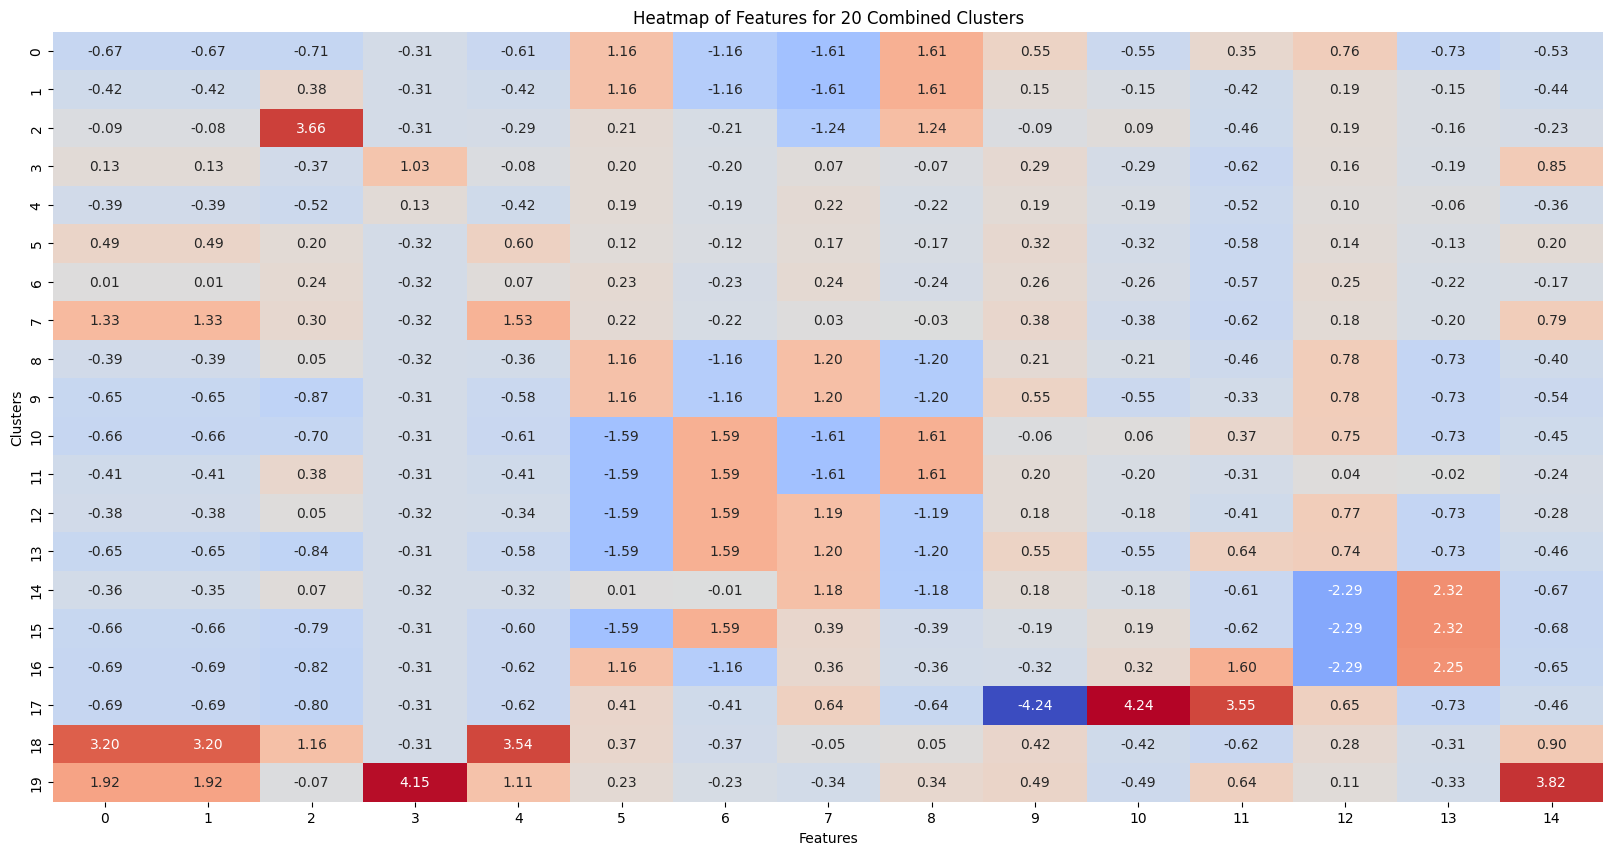

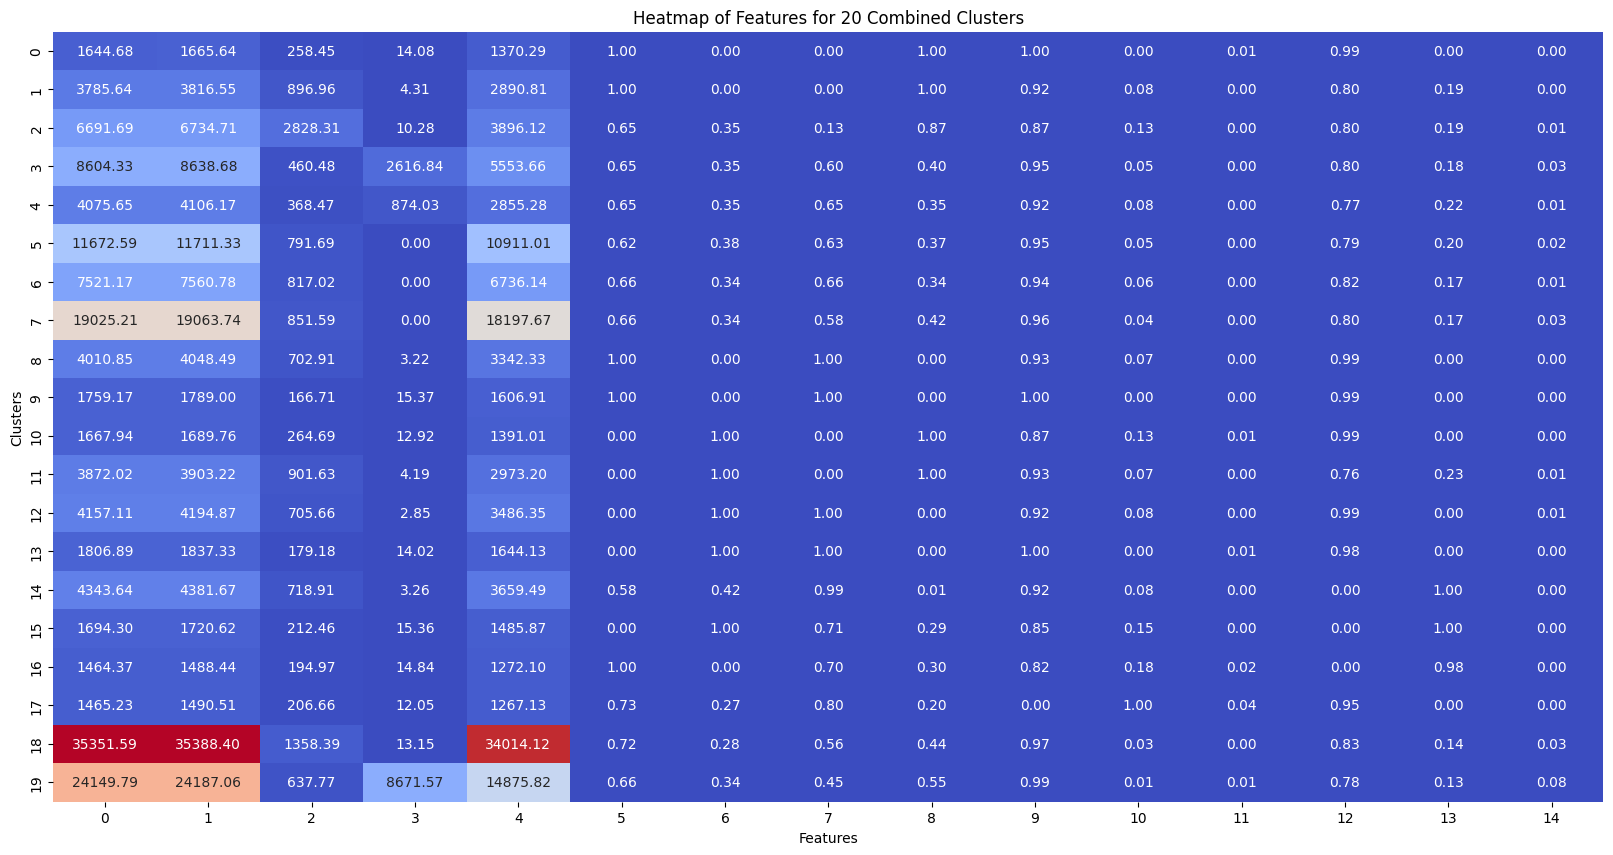

In [7]:
import seaborn as sns
# Hierarchical clustering
linkage_matrix = linkage(cluster_means_scaled.drop('cluster', axis=1), method='ward')

# Print merging clusters at each step
merge_order = dendrogram(linkage_matrix, no_plot=True)['leaves'][::-1]  # Reverse the merge_order array
# previous_clusters = []
# for i in range(n_clusters - 1):
#     combined_clusters = merge_order[:i + 2]
#     if len(combined_clusters) > 1:
#         merging_clusters = combined_clusters[-2:]
#         print(f'Merging Clusters: {previous_clusters + [merging_clusters[0]]} and {merging_clusters[1]}')
#         previous_clusters.append(merging_clusters[0])
#     else:
#         print(f'Starting Cluster: {combined_clusters[0]}')
#         previous_clusters.append(combined_clusters[0])

# Plot dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

previous_clusters = []
# Heatmaps of features for combined datapoints at each step
for i in range(n_clusters - 1):
    combined_clusters = merge_order[:i + 2]
    merged_cluster_means = cluster_means_scaled.iloc[combined_clusters]
    merged_cluster_means2 = cluster_means2.iloc[combined_clusters]

    if len(combined_clusters) > 1:
        merging_clusters = combined_clusters[-2:]
        print(f'Merging Clusters: {previous_clusters + [merging_clusters[0]]} and {merging_clusters[1]}')
        previous_clusters.append(merging_clusters[0])
    else:
        print(f'Starting Cluster: {combined_clusters[0]}')
        previous_clusters.append(combined_clusters[0])
    heatmap_data = merged_cluster_means.drop('cluster', axis=1).values
    plt.figure(figsize=(20, 10))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', cbar=False)
    plt.title(f'Heatmap of Features for {i + 2} Combined Clusters')
    plt.xlabel('Features')
    plt.ylabel('Clusters')
    plt.show()

    heatmap_data = merged_cluster_means2.drop('cluster', axis=1).values
    plt.figure(figsize=(20, 10))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', cbar=False)
    plt.title(f'Heatmap of Features for {i + 2} Combined Clusters')
    plt.xlabel('Features')
    plt.ylabel('Clusters')
    plt.show()

# One class Classification

Counter({0: 9990, 1: 10})


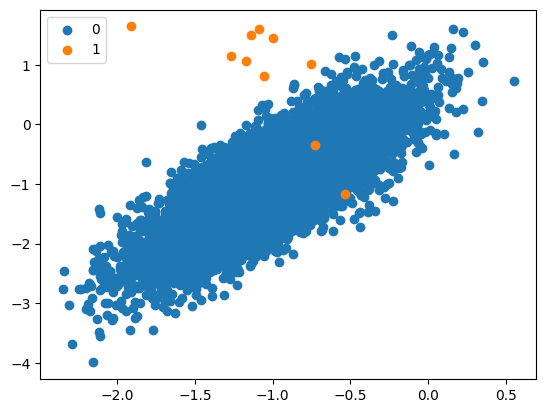

In [8]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# ONSVM

In [19]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset
X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.163


# Isolation Forest

In [22]:
# isolation forest for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = IsolationForest(contamination=0.1)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.015
